## Dataframe V1

In [1]:
import json
import pandas as pd

# Load the JSON data
with open(r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\iig_data\project_details.json', encoding='utf-8') as file:
    data = json.load(file)

# Extract relevant data into a list
project_list = []
for project_id, project in data.items():
    project_list.append({
        "Project ID": project.get("projectId"),
        "Title": project.get("title"),
        "Sector": project.get("sector"),
        "Subsector": project.get("subsector"),
        "State": project.get("details", {}).get("State", "Unknown"),
        "Project Start Date": project.get("details", {}).get("Project Start Date", "Unknown"),
        "Project Completion Date": project.get("details", {}).get("Project Completion Date", "Unknown"),
        "Total Project Cost (USD mn)": project.get("details", {}).get("Total Project Cost", "0")
    })

# Convert to DataFrame
df = pd.DataFrame(project_list)

# Convert 'Total Project Cost' to numeric, handling errors
df['Total Project Cost (USD mn)'] = df['Total Project Cost (USD mn)'].replace({'USD': '', 'mn': ''}, regex=True).astype(float, errors='ignore')

# Display DataFrame
df.head()


,Project ID,Title,Sector,Subsector,State,Project Start Date,Project Completion Date,Total Project Cost (USD mn)
0,704672,Gujarat Road Construction Project,roads-and-highways,106,Unknown,Unknown,Unknown,0.0
1,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Unknown,Unknown,Unknown,0.0
2,615156,Installation Of Crash Barrier At Narrow And Bl...,roads-and-highways,106,Unknown,Unknown,Unknown,0.0
3,709292,Landslide Mitigation Project At Ojari [Dabarkot],roads-and-highways,106,Unknown,Unknown,Unknown,0.0
4,90005304,,roads-and-highways,106,Unknown,Unknown,Unknown,0.0


In [2]:
df.shape

(12155, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   11734 non-null  object 
 1   Title                        11734 non-null  object 
 2   Sector                       11734 non-null  object 
 3   Subsector                    11734 non-null  object 
 4   State                        12155 non-null  object 
 5   Project Start Date           12155 non-null  object 
 6   Project Completion Date      12155 non-null  object 
 7   Total Project Cost (USD mn)  12155 non-null  float64
dtypes: float64(1), object(7)
memory usage: 759.8+ KB


In [4]:
df.State.unique()

array(['Unknown'], dtype=object)

## Dataframe V2 with project details

In [5]:
import json
import pandas as pd
import re

# Load the JSON file
file_path = r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\iig_data\project_details.json'
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Define regex patterns to extract missing fields
patterns = {
    "state": r"State\n([^\n]+)",
    "start_date": r"Project Start Date\n([^\n]+)",
    "completion_date": r"Project Completion Date\n([^\n]+)",
    "total_cost": r"Total Project Cost:\n([^\n]+)"
}

# Initialize an empty list to store processed data
processed_data = []

# Process each project
for project_id, project in data.items():
    raw_text = project.get("raw_text", "")
    
    # Extract missing details using regex
    extracted_values = {key: re.search(pattern, raw_text) for key, pattern in patterns.items()}
    extracted_values = {key: (match.group(1).strip() if match else "Unknown") for key, match in extracted_values.items()}

    # Convert Total Cost to numeric format (if applicable)
    total_cost = extracted_values["total_cost"].replace("USD", "").replace("mn", "").strip()
    try:
        extracted_values["total_cost"] = float(total_cost)
    except ValueError:
        extracted_values["total_cost"] = None

    # Append processed data
    processed_data.append({
        "Project ID": project_id,
        "Title": project.get("title", "Unknown"),
        "Sector": project.get("sector", "Unknown"),
        "Subsector": project.get("subsector", "Unknown"),
        "State": extracted_values["state"],
        "Start Date": extracted_values["start_date"],
        "Completion Date": extracted_values["completion_date"],
        "Total Project Cost (USD mn)": extracted_values["total_cost"],
        "Source URL": project.get("source_url", "Unknown")
    })

# Convert to DataFrame
df = pd.DataFrame(processed_data)

# Display DataFrame


In [6]:
df.head()

,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Source URL
0,704672,Gujarat Road Construction Project,roads-and-highways,106,Gujarat,21-Sep-2017,31-Mar-2020,47.15,https://indiainvestmentgrid.gov.in/opportuniti...
1,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Chhattisgarh | Maharashtra,15-Mar-2008,15-Sep-2010,17.40,https://indiainvestmentgrid.gov.in/opportuniti...
2,615156,Installation Of Crash Barrier At Narrow And Bl...,roads-and-highways,106,Uttarakhand,06-Dec-2022,05-Dec-2023,0.61,https://indiainvestmentgrid.gov.in/opportuniti...
3,709292,Landslide Mitigation Project At Ojari [Dabarkot],roads-and-highways,106,Uttarakhand,-,-,NaN,https://indiainvestmentgrid.gov.in/opportuniti...
4,90005304,,roads-and-highways,106,-,-,-,NaN,https://indiainvestmentgrid.gov.in/opportuniti...


In [7]:
df.shape

(12155, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   12155 non-null  object 
 1   Title                        12155 non-null  object 
 2   Sector                       12155 non-null  object 
 3   Subsector                    12155 non-null  object 
 4   State                        12155 non-null  object 
 5   Start Date                   12155 non-null  object 
 6   Completion Date              12155 non-null  object 
 7   Total Project Cost (USD mn)  10391 non-null  float64
 8   Source URL                   12155 non-null  object 
dtypes: float64(1), object(8)
memory usage: 854.8+ KB


In [9]:
df.State.unique()

array(['Gujarat', 'Chhattisgarh | Maharashtra', 'Uttarakhand', '-',
       'Karnataka', 'Andhra Pradesh', 'Maharashtra', 'Madhya Pradesh',
       'Nagaland', 'Goa', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'West Bengal', 'Uttarakhand | Uttar Pradesh', 'Tripura', 'Bihar',
       'Assam', 'Jammu and Kashmir', 'Mizoram', 'Chhattisgarh', 'Haryana',
       'Punjab', 'Manipur', 'Jharkhand', 'Odisha', 'Uttar Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Chandigarh',
       'Madhya Pradesh | Rajasthan', 'Meghalaya', 'Himachal Pradesh',
       'Bihar | Uttar Pradesh', 'Andaman & Nicobar',
       'Jharkhand | West Bengal', 'Gujarat | Rajasthan', 'Sikkim',
       'Ladakh', 'Dadra & Nagar Haveli and Daman & Diu',
       'Delhi | Uttar Pradesh', 'Madhya Pradesh | Maharashtra', 'Delhi',
       'Madhya Pradesh | Uttar Pradesh', 'Haryana | Punjab',
       'Haryana | Uttar Pradesh', 'Andhra Pradesh | Karnataka',
       'Rajasthan | Uttar Pradesh', 'Karnataka | Maharashtra',
       'Gujarat | M

C:\Users\GaganReddy\AppData\Local\Temp\ipykernel_57296\1549141314.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


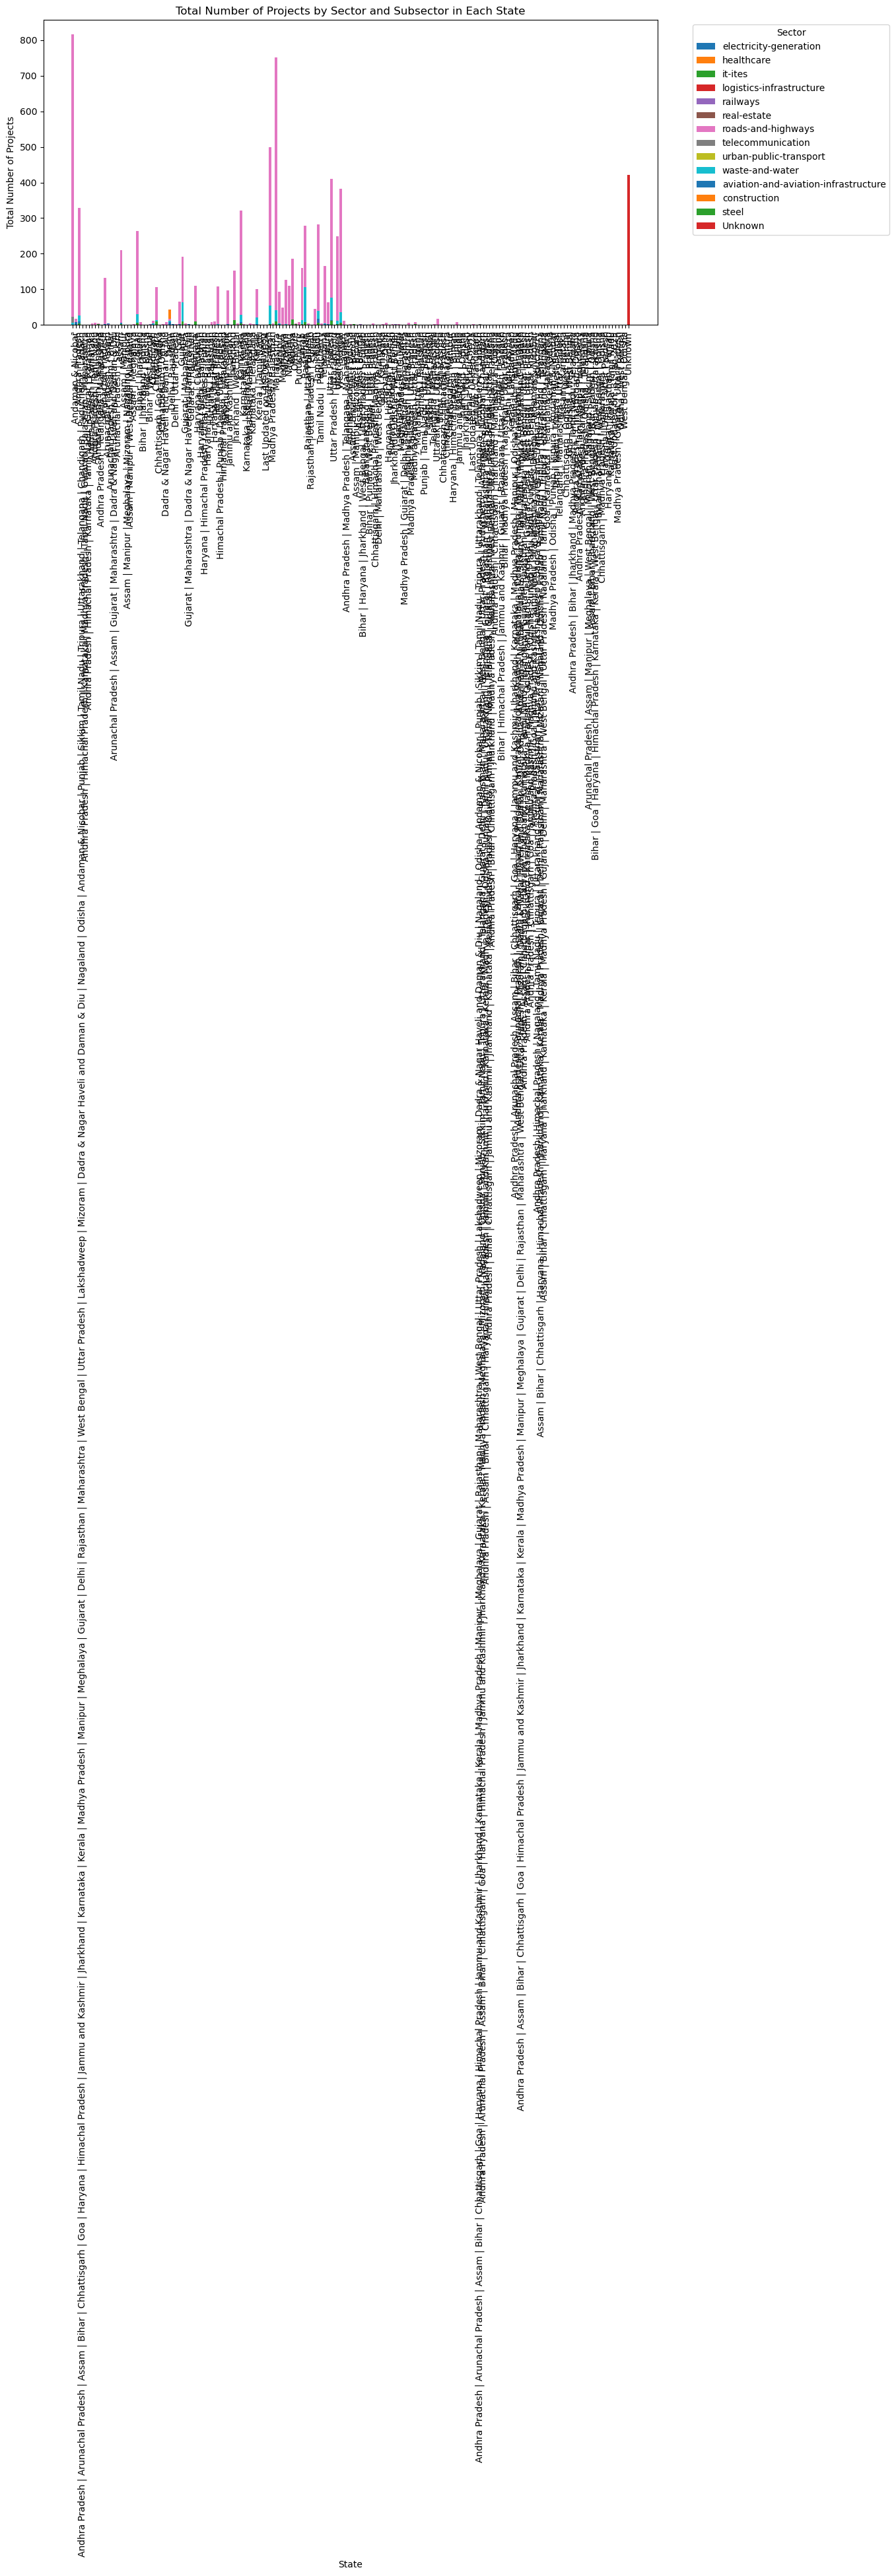

In [10]:
import matplotlib.pyplot as plt
# Count projects by State, Sector, and Subsector
project_counts = df.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title("Total Number of Projects by Sector and Subsector in Each State")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Total number of projects (without multi-state values)

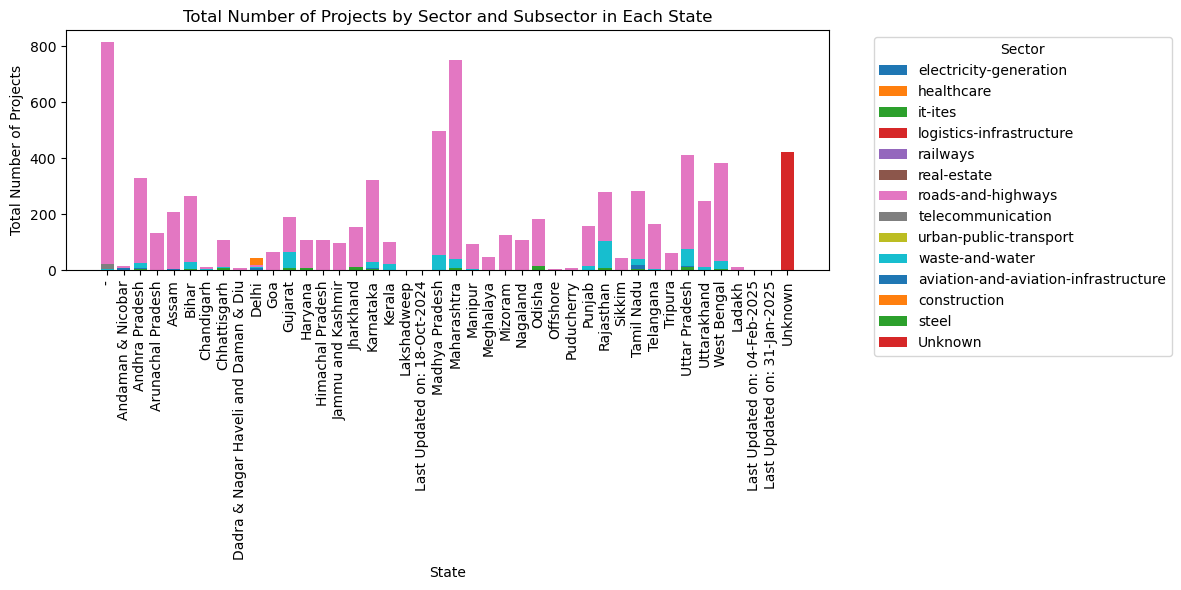

In [11]:

# Remove multi-state values (entries with "|")
df_withoutmultistate = df[~df["State"].str.contains("\|", na=False)]

# Count projects by State, Sector, and Subsector
project_counts = df_withoutmultistate.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title("Total Number of Projects by Sector and Subsector in Each State")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\GaganReddy\AppData\Local\Temp\ipykernel_57296\1956693238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_above1b["Total Project Cost (USD mn)"] = pd.to_numeric(df["Total Project Cost (USD mn)"], errors="coerce")


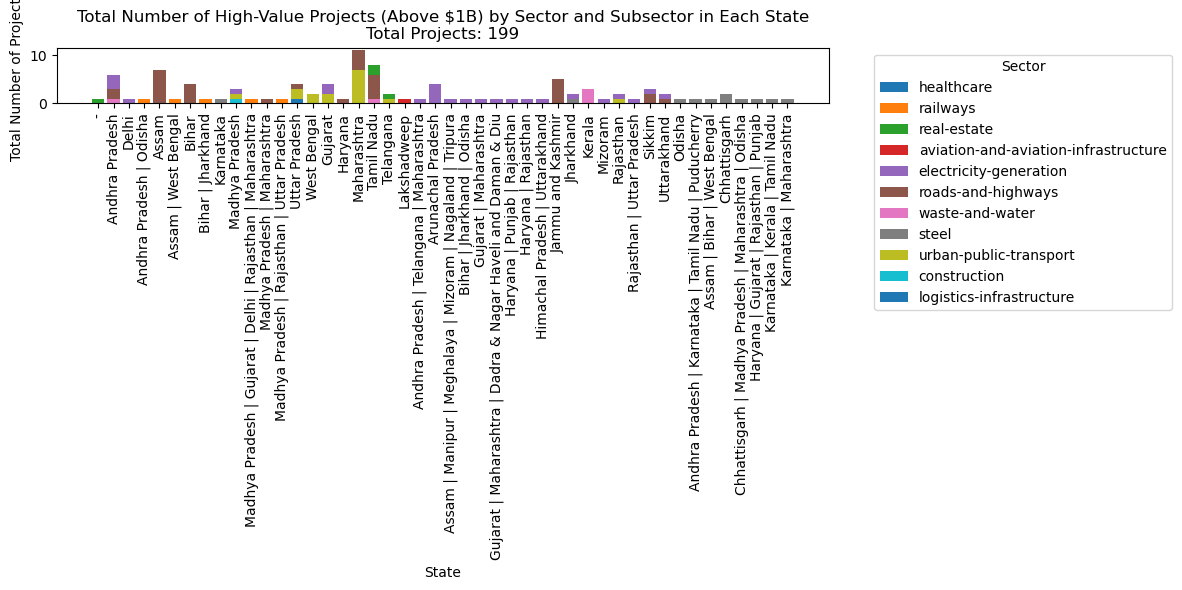

In [12]:
df_filtered_above1b = df[~df["State"].str.contains("\|", na=False)]

# Convert 'Total Project Cost (USD mn)' to numeric and filter projects above 1 billion USD (1000 million)
df_filtered_above1b["Total Project Cost (USD mn)"] = pd.to_numeric(df["Total Project Cost (USD mn)"], errors="coerce")
df_filtered_above1b = df[df["Total Project Cost (USD mn)"] > 500]

# Count projects by State, Sector, and Subsector
project_counts = df_filtered_above1b.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Calculate total number of projects
total_projects = project_counts["Project Count"].sum()

# Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title(f"Total Number of High-Value Projects (Above $1B) by Sector and Subsector in Each State\nTotal Projects: {total_projects}")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Total number of projects (above 500 million USD) without multi-state values

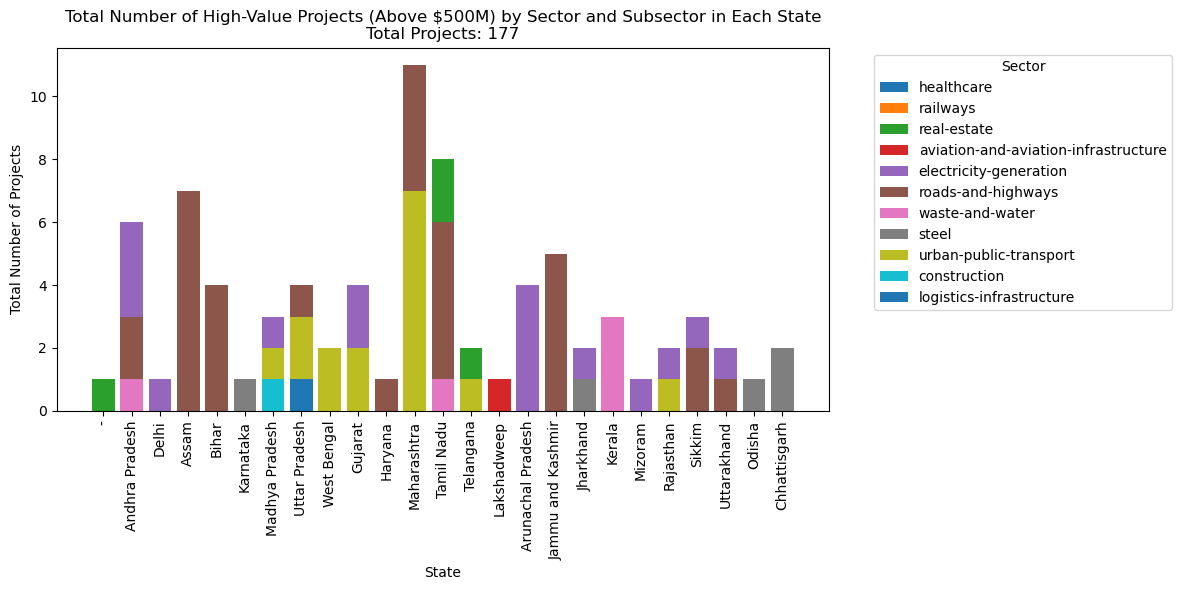

In [13]:

# Step 1: Remove multi-state values (entries with "|")
df_filtered_above500m = df[~df["State"].str.contains("\|", na=False)].copy()

# Step 2: Convert 'Total Project Cost (USD mn)' to numeric
df_filtered_above500m["Total Project Cost (USD mn)"] = pd.to_numeric(df_filtered_above500m["Total Project Cost (USD mn)"], errors="coerce")

# Step 3: Filter projects with a total cost greater than 500 million USD
df_filtered_above500m = df_filtered_above500m[df_filtered_above500m["Total Project Cost (USD mn)"] > 500]

# Step 4: Count projects by State, Sector, and Subsector
project_counts = df_filtered_above500m.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Step 5: Calculate total number of projects
total_projects = project_counts["Project Count"].sum()

# Step 6: Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title(f"Total Number of High-Value Projects (Above $500M) by Sector and Subsector in Each State\nTotal Projects: {total_projects}")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Electricity Generation Projects

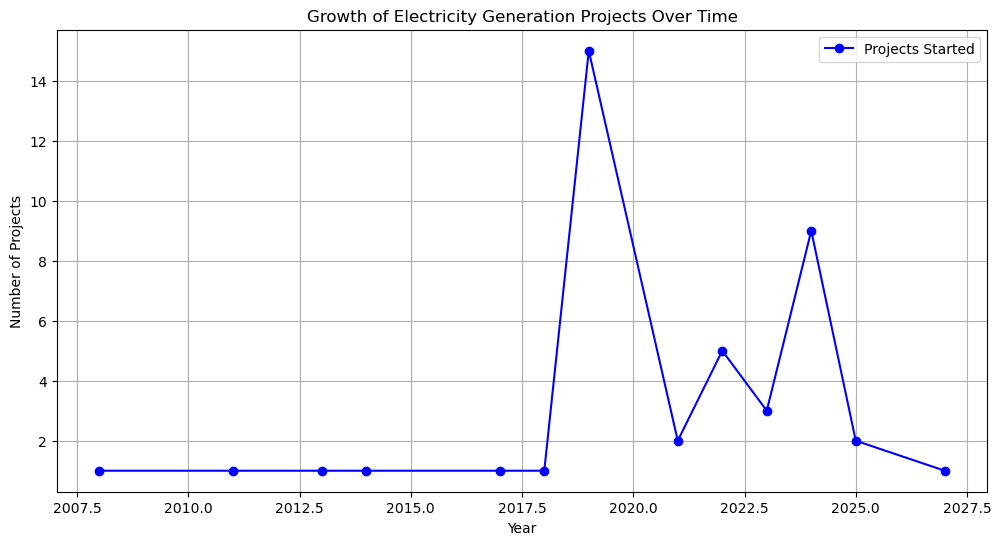

In [14]:

# Step 1: Filter projects related to Electricity Generation
df_electricity = df_filtered_above500m[df_filtered_above500m["Sector"].str.contains("electricity-generation", case=False, na=False)].copy()

# Step 2: Convert "Start Date" and "Completion Date" to datetime format
df_electricity["Start Date"] = pd.to_datetime(df_electricity["Start Date"], errors="coerce")
df_electricity["Completion Date"] = pd.to_datetime(df_electricity["Completion Date"], errors="coerce")

# Step 3: Count the number of projects by Start Year
df_electricity["Start Year"] = df_electricity["Start Date"].dt.year
df_project_growth = df_electricity.groupby("Start Year").size().reset_index(name="Project Count")

# Step 4: Plot the Growth of Electricity Generation Projects Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_project_growth["Start Year"], df_project_growth["Project Count"], marker="o", linestyle="-", color="b", label="Projects Started")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.title("Growth of Electricity Generation Projects Over Time")
plt.legend()
plt.grid()
plt.show()

## Dataframe V3 with project status

In [15]:
import json
import pandas as pd
import re

# Load the JSON file
file_path = r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\iig_data\project_details.json'
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Define regex patterns to extract missing fields
patterns = {
    "state": r"State\n([^\n]+)",
    "start_date": r"Project Start Date\n([^\n]+)",
    "completion_date": r"Project Completion Date\n([^\n]+)",
    "total_cost": r"Total Project Cost:\n([^\n]+)",
    "project_status": r"Project Status\n([^\n]+)"  # New regex for project status
}

# Initialize an empty list to store processed data
processed_data = []

# Process each project
for project_id, project in data.items():
    raw_text = project.get("raw_text", "")
    
    # Extract missing details using regex
    extracted_values = {key: re.search(pattern, raw_text) for key, pattern in patterns.items()}
    extracted_values = {key: (match.group(1).strip() if match else "Unknown") for key, match in extracted_values.items()}

    # Convert Total Cost to numeric format (if applicable)
    total_cost = extracted_values["total_cost"].replace("USD", "").replace("mn", "").strip()
    try:
        extracted_values["total_cost"] = float(total_cost)
    except ValueError:
        extracted_values["total_cost"] = None

    # Append processed data
    processed_data.append({
        "Project ID": project_id,
        "Title": project.get("title", "Unknown"),
        "Sector": project.get("sector", "Unknown"),
        "Subsector": project.get("subsector", "Unknown"),
        "State": extracted_values["state"],
        "Start Date": extracted_values["start_date"],
        "Completion Date": extracted_values["completion_date"],
        "Total Project Cost (USD mn)": extracted_values["total_cost"],
        "Project Status": extracted_values["project_status"],  # Add extracted project status
        "Source URL": project.get("source_url", "Unknown")
    })

# Convert to DataFrame
df_v3 = pd.DataFrame(processed_data)



In [16]:
df_v3.head()

,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Project Status,Source URL
0,704672,Gujarat Road Construction Project,roads-and-highways,106,Gujarat,21-Sep-2017,31-Mar-2020,47.15,Notice to Proceed,https://indiainvestmentgrid.gov.in/opportuniti...
1,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Chhattisgarh | Maharashtra,15-Mar-2008,15-Sep-2010,17.40,COD,https://indiainvestmentgrid.gov.in/opportuniti...
2,615156,Installation Of Crash Barrier At Narrow And Bl...,roads-and-highways,106,Uttarakhand,06-Dec-2022,05-Dec-2023,0.61,Completion Certificate/COD,https://indiainvestmentgrid.gov.in/opportuniti...
3,709292,Landslide Mitigation Project At Ojari [Dabarkot],roads-and-highways,106,Uttarakhand,-,-,NaN,Not Applicable,https://indiainvestmentgrid.gov.in/opportuniti...
4,90005304,,roads-and-highways,106,-,-,-,NaN,-,https://indiainvestmentgrid.gov.in/opportuniti...


In [17]:
df_v3.shape


(12155, 10)

In [18]:
df_v3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   12155 non-null  object 
 1   Title                        12155 non-null  object 
 2   Sector                       12155 non-null  object 
 3   Subsector                    12155 non-null  object 
 4   State                        12155 non-null  object 
 5   Start Date                   12155 non-null  object 
 6   Completion Date              12155 non-null  object 
 7   Total Project Cost (USD mn)  10391 non-null  float64
 8   Project Status               12155 non-null  object 
 9   Source URL                   12155 non-null  object 
dtypes: float64(1), object(9)
memory usage: 949.7+ KB


In [19]:
df_v3['Project Status'].unique()


array(['Notice to Proceed', 'COD', 'Completion Certificate/COD',
       'Not Applicable', '-', 'Work in Progress',
       'Completion Certificate Issued', 'Concessionaire Appointment',
       'Idea Stage', 'Project Completed', 'Tender Award',
       'Work Start - Appointed Date', 'DPR/Feasibility Study',
       'DPR Approved', 'Financial Closure', 'COD Achieved',
       'Tender Publish', 'Consultant Appointment', 'Consultant Appointed',
       'Unknown'], dtype=object)

In [20]:
df_v3['Project Status'].groupby(df_v3['Project Status']).size().reset_index(name='Count')


,Project Status,Count
0,-,1509
1,COD,367
2,COD Achieved,2
3,Completion Certificate Issued,92
4,Completion Certificate/COD,2352
5,Concessionaire Appointment,280
6,Consultant Appointed,2
7,Consultant Appointment,25
8,DPR Approved,122
9,DPR/Feasibility Study,311


## Dataframe V4 with project status and multi row values added as one


In [21]:
# Expand rows where 'State' contains multiple values separated by '|'
df_expanded = df_v3.copy()

# Split the 'State' column where '|' exists and explode into multiple rows
df_expanded["State"] = df_expanded["State"].str.split(" | ")

# Explode to create separate rows for each state
df_expanded = df_expanded.explode("State").reset_index(drop=True)



In [22]:
df_expanded.head()
df_expanded.shape
df_expanded.info()
df_expanded.State.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18472 entries, 0 to 18471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   18472 non-null  object 
 1   Title                        18472 non-null  object 
 2   Sector                       18472 non-null  object 
 3   Subsector                    18472 non-null  object 
 4   State                        18472 non-null  object 
 5   Start Date                   18472 non-null  object 
 6   Completion Date              18472 non-null  object 
 7   Total Project Cost (USD mn)  16081 non-null  float64
 8   Project Status               18472 non-null  object 
 9   Source URL                   18472 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.4+ MB


array(['Gujarat', 'Chhattisgarh', '|', 'Maharashtra', 'Uttarakhand', '-',
       'Karnataka', 'Andhra', 'Pradesh', 'Madhya', 'Nagaland', 'Goa',
       'Rajasthan', 'Tamil', 'Nadu', 'Telangana', 'West', 'Bengal',
       'Uttar', 'Tripura', 'Bihar', 'Assam', 'Jammu', 'and', 'Kashmir',
       'Mizoram', 'Haryana', 'Punjab', 'Manipur', 'Jharkhand', 'Odisha',
       'Kerala', 'Arunachal', 'Chandigarh', 'Meghalaya', 'Himachal',
       'Andaman', '&', 'Nicobar', 'Sikkim', 'Ladakh', 'Dadra', 'Nagar',
       'Haveli', 'Daman', 'Diu', 'Delhi', 'Puducherry', 'Offshore',
       'Last', 'Updated', 'on:', '04-Feb-2025', 'Lakshadweep', 'Unknown',
       '18-Oct-2024', '31-Jan-2025'], dtype=object)

### remove incorrect states values

In [23]:
import pandas as pd

# Define mapping for incorrect state splits
state_corrections = {
    "Dadra": "Dadra Nagar Haveli",
    "Nagar": "Dadra Nagar Haveli",
    "Haveli": "Dadra Nagar Haveli",
    "and": None,  # Remove 'and' when found as a standalone state
    "Daman": "Daman and Diu",
    "Diu": "Daman and Diu"
}

# Define valid states to ensure correctness
valid_states = {
    "Andaman & Nicobar", "Dadra Nagar Haveli", "Daman and Diu",
    "Jammu and Kashmir", "Arunachal Pradesh", "Madhya Pradesh",
    "Himachal Pradesh", "Uttar Pradesh", "West Bengal", "Tamil Nadu",
    "Andhra Pradesh", "Chhattisgarh", "Maharashtra", "Uttarakhand",
    "Karnataka", "Nagaland", "Goa", "Rajasthan", "Telangana",
    "Tripura", "Bihar", "Assam", "Mizoram", "Haryana", "Punjab",
    "Manipur", "Jharkhand", "Odisha", "Kerala", "Chandigarh",
    "Meghalaya", "Sikkim", "Ladakh", "Delhi", "Puducherry",
    "Lakshadweep"
}

# Function to correct state names
def clean_state_names(state):
    words = state.split()
    corrected_states = []

    for word in words:
        corrected_state = state_corrections.get(word, word)
        if corrected_state:
            corrected_states.append(corrected_state)
    
    # Join words to reconstruct multi-word states
    clean_state = " ".join(corrected_states).strip()

    # Return only valid states
    return clean_state if clean_state in valid_states else None

# Apply function to clean state names
df_expanded["State"] = df_expanded["State"].apply(clean_state_names)

# Drop rows with invalid states
df_expanded = df_expanded.dropna(subset=["State"])



In [24]:
df_expanded.head()


,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Project Status,Source URL
1,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Chhattisgarh,15-Mar-2008,15-Sep-2010,17.40,COD,https://indiainvestmentgrid.gov.in/opportuniti...
3,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Maharashtra,15-Mar-2008,15-Sep-2010,17.40,COD,https://indiainvestmentgrid.gov.in/opportuniti...
4,615156,Installation Of Crash Barrier At Narrow And Bl...,roads-and-highways,106,Uttarakhand,06-Dec-2022,05-Dec-2023,0.61,Completion Certificate/COD,https://indiainvestmentgrid.gov.in/opportuniti...
5,709292,Landslide Mitigation Project At Ojari [Dabarkot],roads-and-highways,106,Uttarakhand,-,-,NaN,Not Applicable,https://indiainvestmentgrid.gov.in/opportuniti...
7,709013,Jalihal Cross To Pattadkallu [ Km 74.51 - Km 104],roads-and-highways,106,Karnataka,-,-,44.01,Not Applicable,https://indiainvestmentgrid.gov.in/opportuniti...


In [25]:
df_expanded.shape
df_expanded.info()
df_expanded.State.unique()






<class 'pandas.core.frame.DataFrame'>
Index: 6725 entries, 1 to 18469
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   6725 non-null   object 
 1   Title                        6725 non-null   object 
 2   Sector                       6725 non-null   object 
 3   Subsector                    6725 non-null   object 
 4   State                        6725 non-null   object 
 5   Start Date                   6725 non-null   object 
 6   Completion Date              6725 non-null   object 
 7   Total Project Cost (USD mn)  6368 non-null   float64
 8   Project Status               6725 non-null   object 
 9   Source URL                   6725 non-null   object 
dtypes: float64(1), object(9)
memory usage: 577.9+ KB


array(['Chhattisgarh', 'Maharashtra', 'Uttarakhand', 'Karnataka',
       'Nagaland', 'Goa', 'Rajasthan', 'Telangana', 'Tripura', 'Bihar',
       'Assam', 'Mizoram', 'Haryana', 'Punjab', 'Manipur', 'Jharkhand',
       'Odisha', 'Kerala', 'Chandigarh', 'Meghalaya', 'Sikkim', 'Ladakh',
       'Dadra Nagar Haveli', 'Daman and Diu', 'Delhi', 'Puducherry',
       'Lakshadweep'], dtype=object)

In [26]:
df_v4 = df_expanded

In [27]:
df_v4.head()

,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Project Status,Source URL
1,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Chhattisgarh,15-Mar-2008,15-Sep-2010,17.40,COD,https://indiainvestmentgrid.gov.in/opportuniti...
3,616553,Wainganga Bridge - MH/CG Border,roads-and-highways,106,Maharashtra,15-Mar-2008,15-Sep-2010,17.40,COD,https://indiainvestmentgrid.gov.in/opportuniti...
4,615156,Installation Of Crash Barrier At Narrow And Bl...,roads-and-highways,106,Uttarakhand,06-Dec-2022,05-Dec-2023,0.61,Completion Certificate/COD,https://indiainvestmentgrid.gov.in/opportuniti...
5,709292,Landslide Mitigation Project At Ojari [Dabarkot],roads-and-highways,106,Uttarakhand,-,-,NaN,Not Applicable,https://indiainvestmentgrid.gov.in/opportuniti...
7,709013,Jalihal Cross To Pattadkallu [ Km 74.51 - Km 104],roads-and-highways,106,Karnataka,-,-,44.01,Not Applicable,https://indiainvestmentgrid.gov.in/opportuniti...


### Total number of projects (above 500 million USD) without multi-state values V4

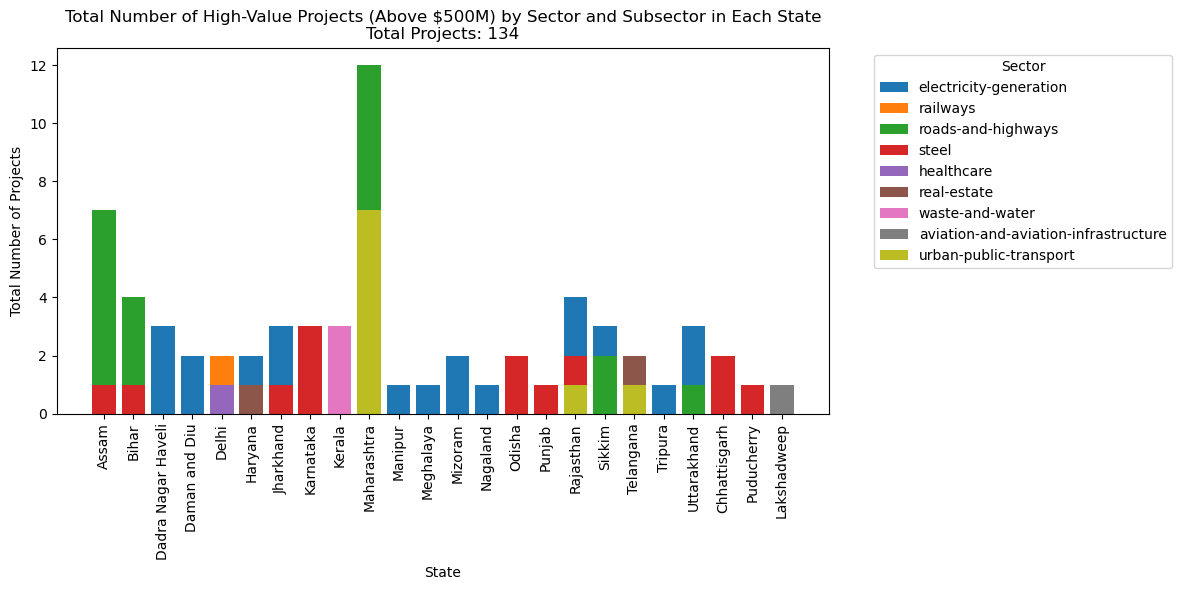

In [28]:

# Step 1: Remove multi-state values (entries with "|")
df_filtered_above500m = df_v4.copy()

# Step 2: Convert 'Total Project Cost (USD mn)' to numeric
df_filtered_above500m["Total Project Cost (USD mn)"] = pd.to_numeric(df_filtered_above500m["Total Project Cost (USD mn)"], errors="coerce")

# Step 3: Filter projects with a total cost greater than 500 million USD
df_filtered_above500m = df_filtered_above500m[df_filtered_above500m["Total Project Cost (USD mn)"] > 500]

# Step 4: Count projects by State, Sector, and Subsector
project_counts = df_filtered_above500m.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Step 5: Calculate total number of projects
total_projects = project_counts["Project Count"].sum()

# Step 6: Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title(f"Total Number of High-Value Projects (Above $500M) by Sector and Subsector in Each State\nTotal Projects: {total_projects}")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

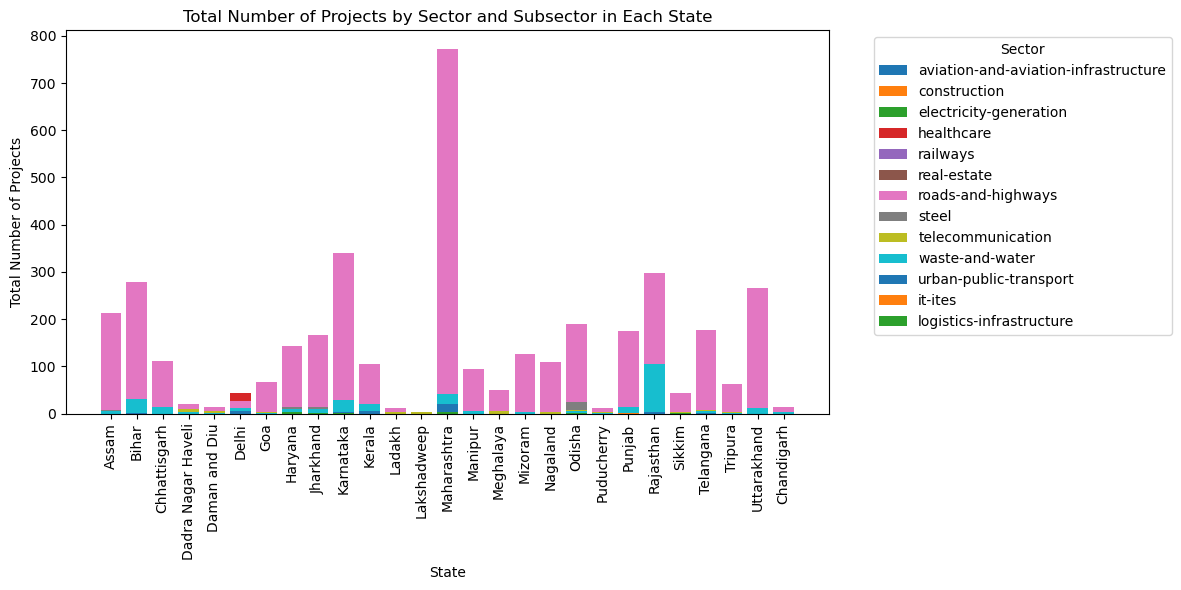

In [29]:

# Count projects by State, Sector, and Subsector
project_counts = df_v4.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

# Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title("Total Number of Projects by Sector and Subsector in Each State")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
df_v4.Sector.unique()


array(['roads-and-highways', 'healthcare', 'real-estate',
       'waste-and-water', 'railways', 'electricity-generation',
       'urban-public-transport', 'aviation-and-aviation-infrastructure',
       'it-ites', 'logistics-infrastructure', 'steel', 'construction',
       'telecommunication'], dtype=object)

## Dataframe V5 with subsector names

In [31]:
df_v4.Subsector.unique()


array(['106', '129', '135', '32', '90', '120', '121', '122', '107', '108',
       '109', '115', '117', '118', '236', '241', '112', '55', '114', '18',
       '138', '215', '127'], dtype=object)

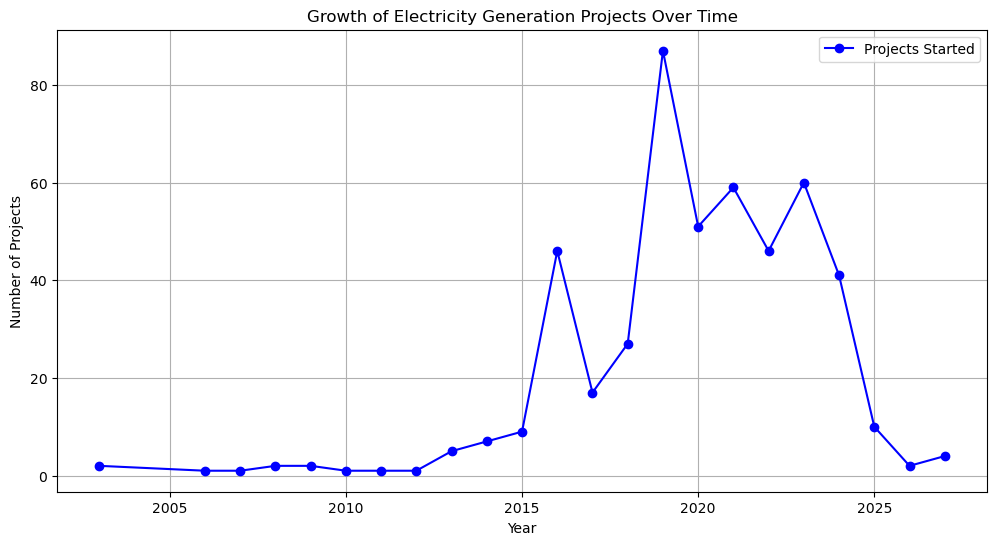

In [32]:
# Step 1: Filter projects related to Electricity Generation
df_electricity = df_v4[df_v4["Sector"].str.contains("electricity-generation", case=False, na=False)].copy()

# Step 2: Convert "Start Date" and "Completion Date" to datetime format
df_electricity["Start Date"] = pd.to_datetime(df_electricity["Start Date"], errors="coerce")
df_electricity["Completion Date"] = pd.to_datetime(df_electricity["Completion Date"], errors="coerce")

# Step 3: Count the number of projects by Start Year
df_electricity["Start Year"] = df_electricity["Start Date"].dt.year
df_project_growth = df_electricity.groupby("Start Year").size().reset_index(name="Project Count")

# Step 4: Plot the Growth of Electricity Generation Projects Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_project_growth["Start Year"], df_project_growth["Project Count"], marker="o", linestyle="-", color="b", label="Projects Started")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.title("Growth of Electricity Generation Projects Over Time")
plt.legend()
plt.grid()
plt.show()

In [33]:
df_electricity.head()

,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Project Status,Source URL,Start Year
15198,612076,1000 MW Pugal Solar Park Phase-I,electricity-generation,115,Rajasthan,2022-02-24,2026-03-31,74.30,Tender Award,https://indiainvestmentgrid.gov.in/opportuniti...,2022.0
15199,616967,"Jimba Maran Hydroelectric Project, Pithoragarh",electricity-generation,115,Uttarakhand,2024-01-01,2032-11-30,42.75,DPR Approved,https://indiainvestmentgrid.gov.in/opportuniti...,2024.0
15202,607082,Development Of 600 MW Grid Connected Solar PV ...,electricity-generation,115,Rajasthan,2021-12-31,2024-03-31,364.65,Idea Stage,https://indiainvestmentgrid.gov.in/opportuniti...,2021.0
15206,612081,1000 MW Pugal Solar Park Phase-II,electricity-generation,115,Rajasthan,2023-06-02,2025-06-30,73.96,Tender Award,https://indiainvestmentgrid.gov.in/opportuniti...,2023.0
15214,603145,20 MW Under 750 MW Grid Connected In Rajasthan...,electricity-generation,115,Rajasthan,2019-06-02,2021-05-04,NaN,-,https://indiainvestmentgrid.gov.in/opportuniti...,2019.0


In [34]:
df_electricity.shape
df_electricity.info()
df_electricity.State.unique()





<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 15198 to 16666
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Project ID                   514 non-null    object        
 1   Title                        514 non-null    object        
 2   Sector                       514 non-null    object        
 3   Subsector                    514 non-null    object        
 4   State                        514 non-null    object        
 5   Start Date                   482 non-null    datetime64[ns]
 6   Completion Date              484 non-null    datetime64[ns]
 7   Total Project Cost (USD mn)  410 non-null    float64       
 8   Project Status               514 non-null    object        
 9   Source URL                   514 non-null    object        
 10  Start Year                   482 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(7)


array(['Rajasthan', 'Uttarakhand', 'Karnataka', 'Assam', 'Nagaland',
       'Haryana', 'Punjab', 'Sikkim', 'Meghalaya', 'Maharashtra',
       'Mizoram', 'Kerala', 'Delhi', 'Bihar', 'Telangana', 'Chhattisgarh',
       'Manipur', 'Lakshadweep', 'Tripura', 'Odisha', 'Chandigarh',
       'Jharkhand', 'Dadra Nagar Haveli', 'Daman and Diu', 'Puducherry',
       'Goa', 'Ladakh'], dtype=object)

In [35]:
### Electricity Generation Projects (above 500 million USD)

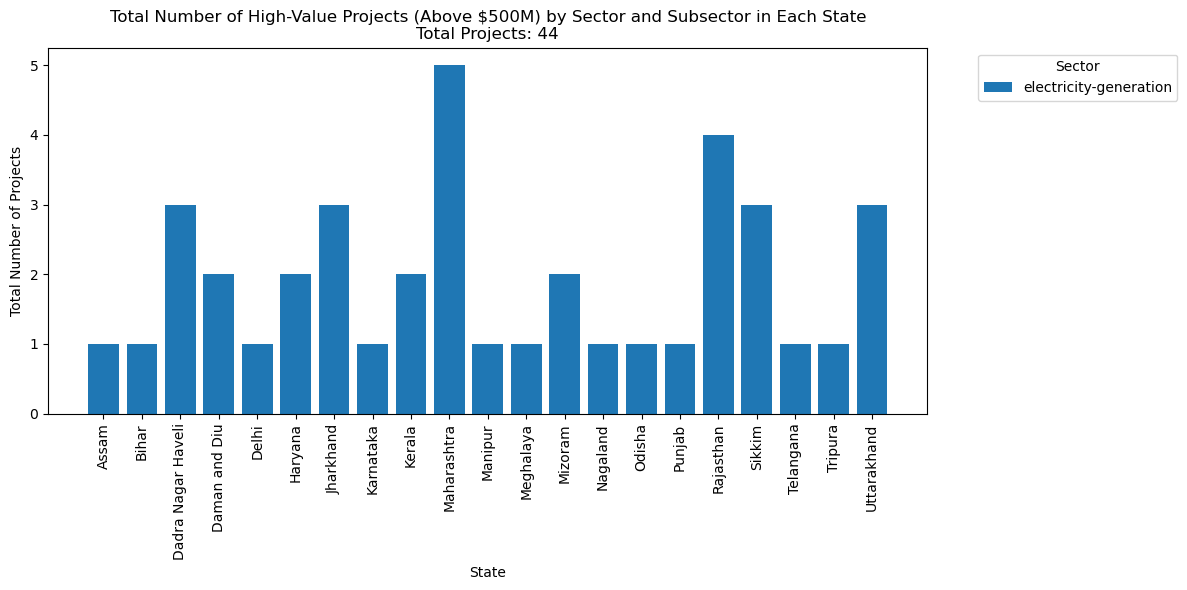

In [36]:
#Remove multi-state values (entries with "|")
df_filtered_above500m = df_electricity.copy()

#Convert 'Total Project Cost (USD mn)' to numeric
df_filtered_above500m["Total Project Cost (USD mn)"] = pd.to_numeric(df_filtered_above500m["Total Project Cost (USD mn)"], errors="coerce")

#Filter projects with a total cost greater than 500 million USD
df_filtered_above500m = df_filtered_above500m[df_filtered_above500m["Total Project Cost (USD mn)"] > 500]

#Count projects by State, Sector, and Subsector
project_counts = df_filtered_above500m.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

#Calculate total number of projects
total_projects = project_counts["Project Count"].sum()

#Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title(f"Total Number of High-Value Projects (Above $500M) by Sector and Subsector in Each State\nTotal Projects: {total_projects}")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

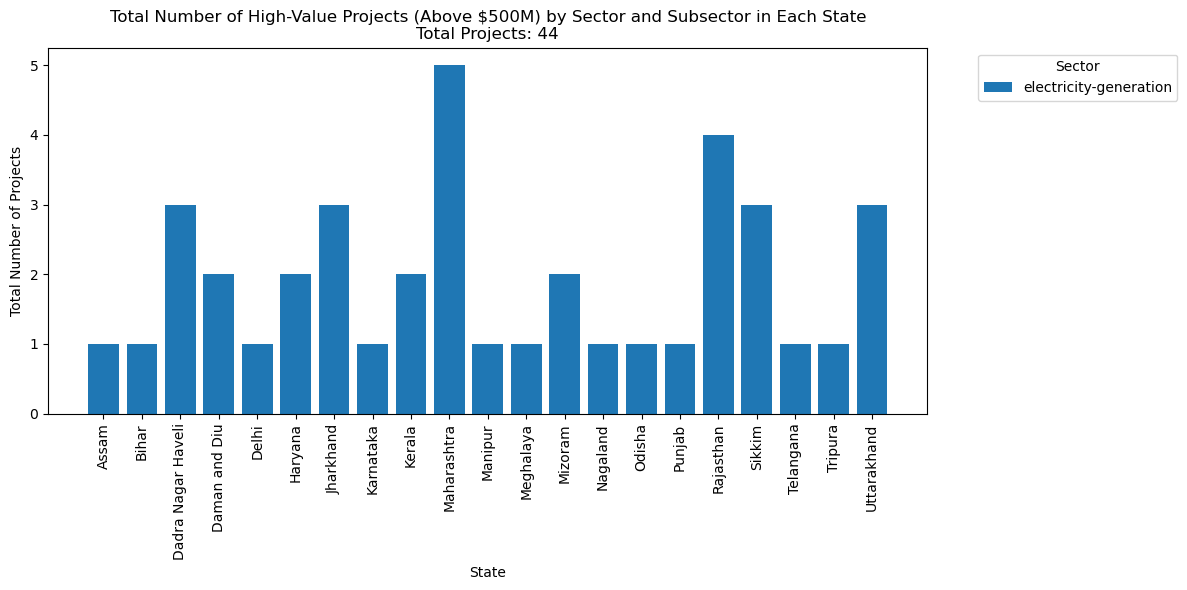

In [37]:
#Remove multi-state values (entries with "|")
df_filtered_above500m = df_electricity.copy()

#Convert 'Total Project Cost (USD mn)' to numeric
df_filtered_above500m["Total Project Cost (USD mn)"] = pd.to_numeric(df_filtered_above500m["Total Project Cost (USD mn)"], errors="coerce")

#Filter projects with a total cost greater than 500 million USD
df_filtered_above500m = df_filtered_above500m[df_filtered_above500m["Total Project Cost (USD mn)"] > 500]

#Count projects by State, Sector, and Subsector
project_counts = df_filtered_above500m.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Count")

#Count projects by State, Sector, and Subsector
project_costs = df_filtered_above500m.groupby(["State", "Sector", "Subsector"]).size().reset_index(name="Project Cost")

#Calculate total number of projects
total_projects = project_counts["Project Count"].sum()

#Plot
plt.figure(figsize=(12, 6))
for sector in project_counts["Sector"].unique():
    subset = project_counts[project_counts["Sector"] == sector]
    plt.bar(subset["State"], subset["Project Count"], label=sector)

plt.xlabel("State")
plt.ylabel("Total Number of Projects")
plt.title(f"Total Number of High-Value Projects (Above $500M) by Sector and Subsector in Each State\nTotal Projects: {total_projects}")
plt.xticks(rotation=90)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [38]:
df_filtered_above500m.head(16)


,Project ID,Title,Sector,Subsector,State,Start Date,Completion Date,Total Project Cost (USD mn),Project Status,Source URL,Start Year
15287,400068,"Teesta-IV [520 MW], Sikkim",electricity-generation,115,Sikkim,2024-03-31,2030-05-30,768.68,Consultant Appointment,https://indiainvestmentgrid.gov.in/opportuniti...,2024.0
15291,602534,Teesta-IV H E Project,electricity-generation,115,Sikkim,2019-01-31,2029-02-28,711.80,DPR/Feasibility Study,https://indiainvestmentgrid.gov.in/opportuniti...,2019.0
15296,709748,BIKANER SOLAR POWER PROJECT,electricity-generation,115,Rajasthan,2022-04-05,2025-03-31,690.55,-,https://indiainvestmentgrid.gov.in/opportuniti...,2022.0
15345,602181,"TEESTA-VI HE PROJECT, SIKKIM [500 MW], Execute...",electricity-generation,115,Sikkim,2019-03-08,2027-12-31,722.76,Notice to Proceed,https://indiainvestmentgrid.gov.in/opportuniti...,2019.0
15357,611601,NOKH SOLAR 735MW,electricity-generation,115,Rajasthan,2021-10-04,2025-03-31,550.51,Notice to Proceed,https://indiainvestmentgrid.gov.in/opportuniti...,2021.0
15548,602195,Vishnugad Pipalkoti Hydro Electric Project [44...,electricity-generation,115,Uttarakhand,2014-01-17,2026-12-31,635.87,Notice to Proceed,https://indiainvestmentgrid.gov.in/opportuniti...,2014.0
15618,606440,Sharavathy PSP,electricity-generation,115,Karnataka,2022-05-01,2027-05-01,677.93,Consultant Appointment,https://indiainvestmentgrid.gov.in/opportuniti...,2022.0
15648,602193,Tehri Pumped Storage Plant Project [4x250 MW],electricity-generation,115,Uttarakhand,2011-06-27,2025-06-30,748.68,Notice to Proceed,https://indiainvestmentgrid.gov.in/opportuniti...,2011.0
15737,400326,Kishau 660 HEP,electricity-generation,115,Uttarakhand,NaT,NaT,904.45,Consultant Appointment,https://indiainvestmentgrid.gov.in/opportuniti...,NaN
15806,701604,New Delhi Power Transmission Project,electricity-generation,117,Delhi,2019-04-01,2025-03-31,540.68,Work Start - Appointed Date,https://indiainvestmentgrid.gov.in/opportuniti...,2019.0


In [42]:
df_v4.to_csv('iig_data/iig_cleaned_dataset.csv', index=False) 

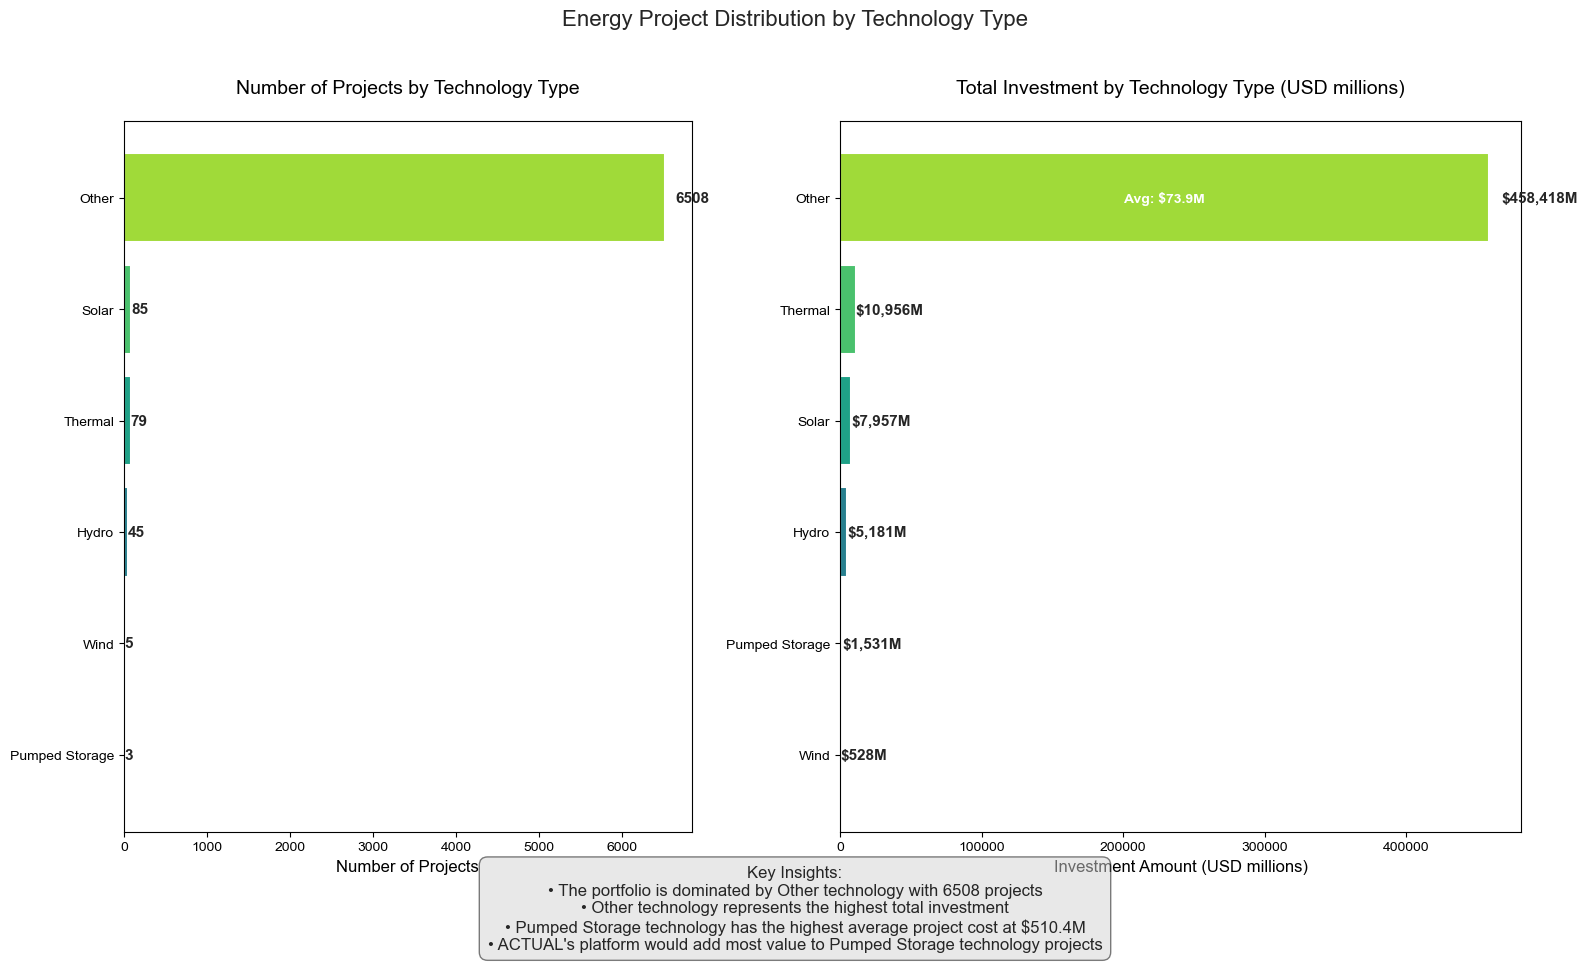

       Technology  Project_Count  Total_Investment    Avg_Cost  Min_Cost  \
1           Other           6508         458417.57   73.890646      0.12   
3           Solar             85           7957.10  142.091071      2.74   
4         Thermal             79          10956.33  185.700508      1.88   
0           Hydro             45           5181.19  123.361667      0.84   
5            Wind              5            527.93  131.982500     14.41   
2  Pumped Storage              3           1531.23  510.410000    104.62   

   Max_Cost  
1    986.34  
3    690.55  
4    929.47  
0    904.45  
5    262.04  
2    748.68  


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def improved_technology_analysis(df):
    """
    Create an improved visualization of energy project distribution by technology type
    with better scaling and clearer insights.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    fig: The matplotlib figure object
    """
    # Identify technology type based on project title
    def identify_technology(title):
        title_lower = str(title).lower()
        if 'solar' in title_lower:
            return 'Solar'
        elif 'psp' in title_lower or 'pumped storage' in title_lower:
            return 'Pumped Storage'
        elif any(term in title_lower for term in ['hydel', 'hep', 'hydro', 'he project']):
            return 'Hydro'
        elif 'wind' in title_lower:
            return 'Wind'
        else:
            # Check for specific words that might indicate technology type
            if any(term in title_lower for term in ['thermal', 'coal', 'gas']):
                return 'Thermal'
            else:
                return 'Other'
    
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Add technology column
    df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert cost to numeric if it's not already
    if df_analysis['Total Project Cost (USD mn)'].dtype == 'object':
        df_analysis['Total Project Cost (USD mn)'] = pd.to_numeric(
            df_analysis['Total Project Cost (USD mn)'], errors='coerce')
    
    # Group data by technology
    tech_data = df_analysis.groupby('Technology').agg({
        'Project ID': 'count',
        'Total Project Cost (USD mn)': ['sum', 'mean', 'min', 'max']
    })
    
    # Flatten the multi-index columns
    tech_data.columns = ['Project_Count', 'Total_Investment', 'Avg_Cost', 'Min_Cost', 'Max_Cost']
    tech_data = tech_data.reset_index()
    
    # Sort by project count for consistent ordering
    tech_data = tech_data.sort_values('Project_Count', ascending=False)
    
    # Check if the investment values are extremely large (might indicate a unit error)
    if tech_data['Total_Investment'].max() > 100000:  # Likely in thousands or millions already
        print("WARNING: Investment values appear to be very large. Verify units.")
        # For now, we'll work with the values as they are
    
    # Create a figure with a single row and two columns of subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 10), gridspec_kw={'width_ratios': [1, 1.2]})
    
    # Improve visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set a clean color palette with distinct colors
    colors = sns.color_palette("viridis", len(tech_data))
    
    # Left plot: Project Count by Technology (horizontal bar chart)
    tech_data = tech_data.sort_values('Project_Count', ascending=True)  # Reverse order for horizontal bars
    
    # Plot the bars
    bars1 = axes[0].barh(tech_data['Technology'], tech_data['Project_Count'], 
                       color=colors, edgecolor='white', linewidth=1.5)
    
    # Customize the left plot
    axes[0].set_title('Number of Projects by Technology Type', fontsize=14, pad=20)
    axes[0].set_xlabel('Number of Projects', fontsize=12)
    axes[0].set_ylabel('')
    
    # Add data labels
    for bar in bars1:
        width = bar.get_width()
        axes[0].text(width * 1.02, bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', va='center', fontsize=11, fontweight='bold')
    
    # Right plot: Investment by Technology (horizontal bar chart)
    tech_data = tech_data.sort_values('Total_Investment', ascending=True)  # Sort by investment
    
    # Plot the bars
    bars2 = axes[1].barh(tech_data['Technology'], tech_data['Total_Investment'], 
                       color=colors, edgecolor='white', linewidth=1.5)
    
    # Customize the right plot
    axes[1].set_title('Total Investment by Technology Type (USD millions)', fontsize=14, pad=20)
    axes[1].set_xlabel('Investment Amount (USD millions)', fontsize=12)
    axes[1].set_ylabel('')
    
    # Format investment labels properly
    for bar in bars2:
        width = bar.get_width()
        # Format with commas for thousands separator and no decimal places
        formatted_value = f"${width:,.0f}M"
        axes[1].text(width * 1.02, bar.get_y() + bar.get_height()/2, 
                  formatted_value, va='center', fontsize=11, fontweight='bold')
    
    # Add average cost as text annotation inside the bars
    for i, (_, row) in enumerate(tech_data.iterrows()):
        avg_cost = row['Avg_Cost']
        # Only add if the bar is wide enough
        if row['Total_Investment'] > axes[1].get_xlim()[1] * 0.1:
            axes[1].text(row['Total_Investment'] * 0.5, i, 
                      f"Avg: ${avg_cost:,.1f}M", 
                      ha='center', va='center', color='white', 
                      fontweight='bold', fontsize=10)
    
    # Add overall title
    plt.suptitle('Energy Project Distribution by Technology Type', fontsize=16, y=0.95)
    
    # Add insights section
    insight_text = (
        "Key Insights:\n"
        "• The portfolio is dominated by [X] technology with [Y] projects\n"
        "• [Z] technology represents the highest total investment\n"
        "• [W] technology has the highest average project cost at $[V]M\n"
        "• ACTUAL's platform would add most value to [U] technology projects"
    )
    
    # Calculate actual insights to replace placeholders
    dominant_tech_by_count = tech_data.iloc[-1]['Technology']  # Last row after sorting
    count_of_dominant = int(tech_data.iloc[-1]['Project_Count'])
    
    highest_investment_tech = tech_data.iloc[-1]['Technology']  # Last row after sorting
    highest_investment_value = tech_data.iloc[-1]['Total_Investment']
    
    highest_avg_cost_idx = tech_data['Avg_Cost'].idxmax()
    highest_avg_cost_tech = tech_data.loc[highest_avg_cost_idx, 'Technology']
    highest_avg_cost_value = tech_data.loc[highest_avg_cost_idx, 'Avg_Cost']
    
    # Determine where ACTUAL would add most value (assuming larger, more complex projects)
    if highest_avg_cost_tech == dominant_tech_by_count:
        most_value_tech = highest_avg_cost_tech
    else:
        most_value_tech = highest_avg_cost_tech
    
    # Replace placeholders with actual values
    insight_text = insight_text.replace('[X]', dominant_tech_by_count)
    insight_text = insight_text.replace('[Y]', str(count_of_dominant))
    insight_text = insight_text.replace('[Z]', highest_investment_tech)
    insight_text = insight_text.replace('[W]', highest_avg_cost_tech)
    insight_text = insight_text.replace('[V]', f"{highest_avg_cost_value:,.1f}")
    insight_text = insight_text.replace('[U]', most_value_tech)
    
    # Add the insights text box
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.93])
    
    # Create a table with detailed statistics
    stats_table = tech_data[['Technology', 'Project_Count', 'Total_Investment', 'Avg_Cost', 'Min_Cost', 'Max_Cost']]
    stats_table = stats_table.sort_values('Project_Count', ascending=False)
    
    return fig, stats_table

# Example usage:
fig, stats_table = improved_technology_analysis(df_v4)
plt.savefig('improved_technology_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(stats_table)

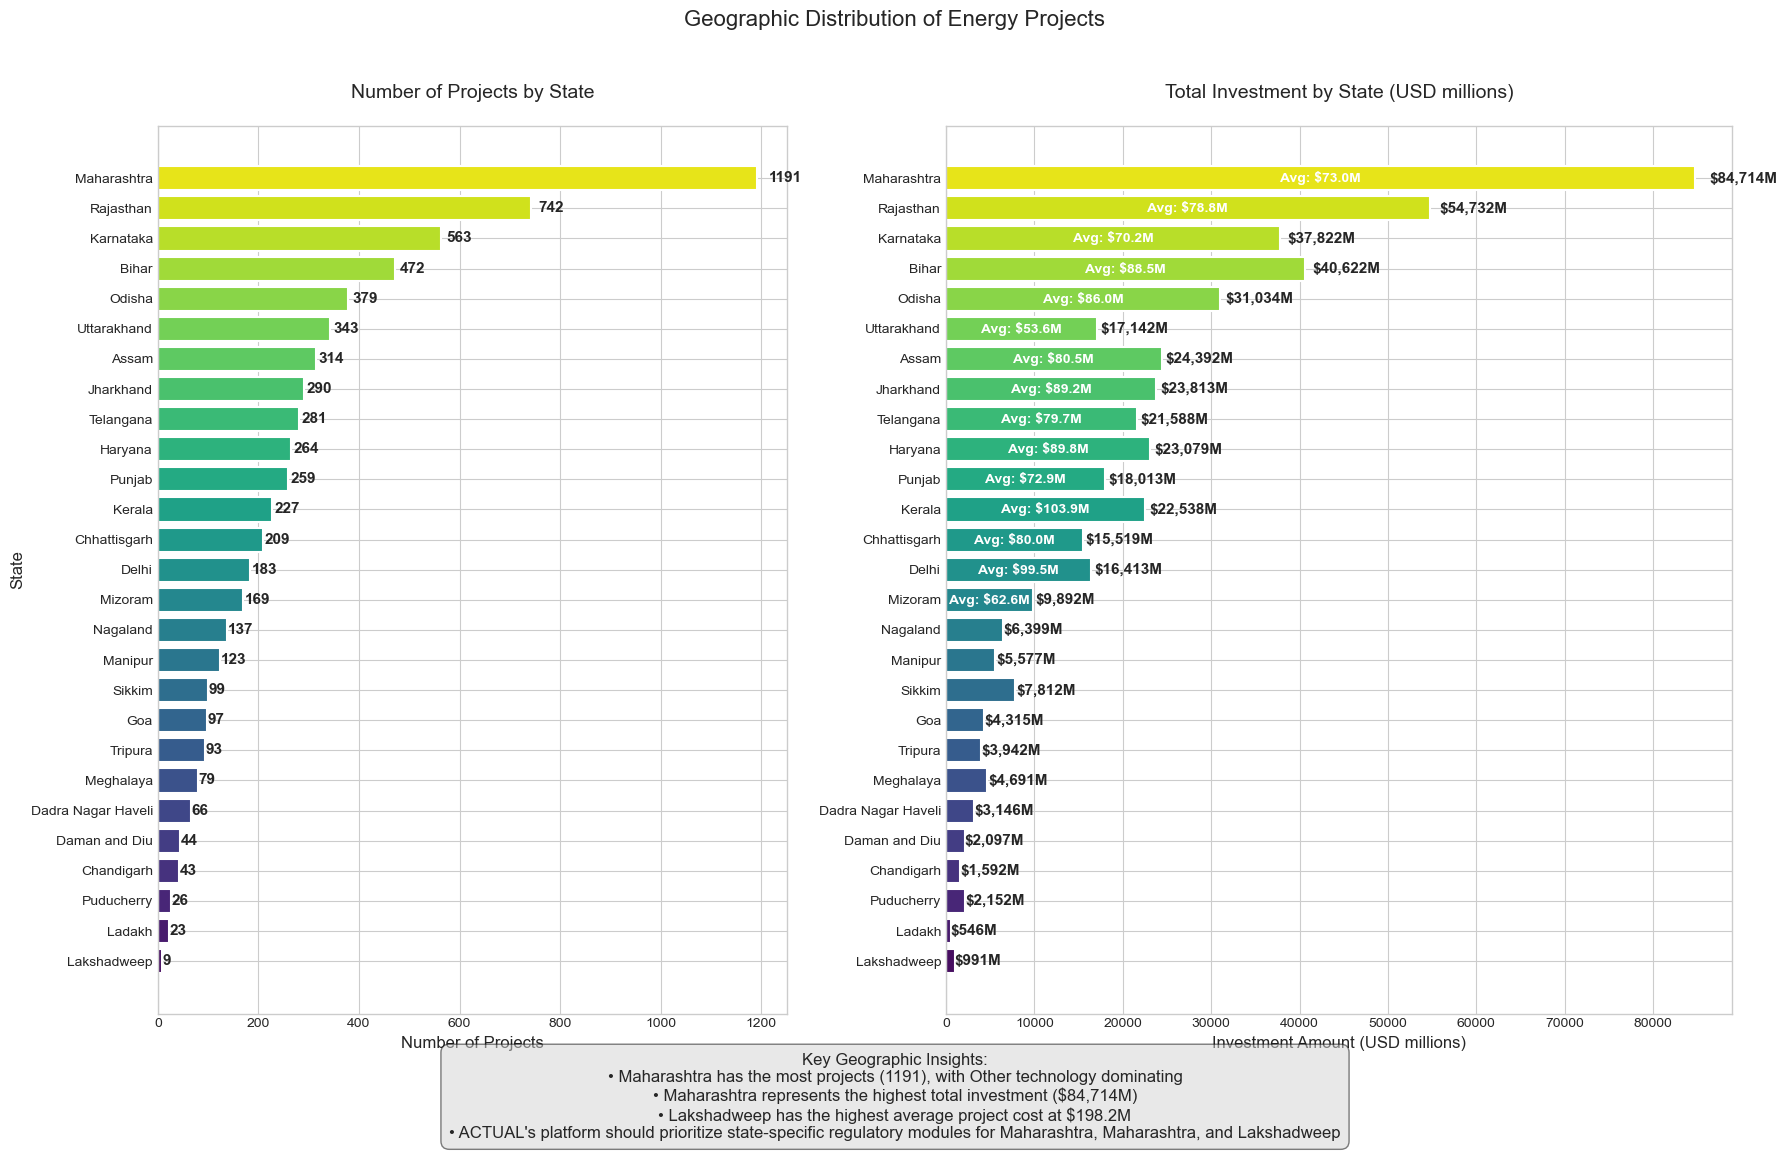

                 State  Project_Count  Total_Investment  Avg_Investment
14         Maharashtra           1191          84713.98       72.966391
22           Rajasthan            742          54732.06       78.751165
10           Karnataka            563          37821.62       70.169981
1                Bihar            472          40622.41       88.501983
19              Odisha            379          31033.55       85.965512
26         Uttarakhand            343          17141.65       53.567656
0                Assam            314          24391.94       80.501452
9            Jharkhand            290          23813.33       89.188502
24           Telangana            281          21587.83       79.659889
8              Haryana            264          23079.16       89.802179
21              Punjab            259          18013.31       72.928381
11              Kerala            227          22538.05      103.861982
3         Chhattisgarh            209          15519.27       79

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_geographic_distribution(df):
    """
    Create a visualization showing the distribution of energy projects by state,
    with project counts, investment amounts, and technology breakdown.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    fig: The matplotlib figure object
    """
    # Identify technology type based on project title (same as previous function)
    def identify_technology(title):
        title_lower = str(title).lower()
        if 'solar' in title_lower:
            return 'Solar'
        elif 'psp' in title_lower or 'pumped storage' in title_lower:
            return 'Pumped Storage'
        elif any(term in title_lower for term in ['hydel', 'hep', 'hydro', 'he project']):
            return 'Hydro'
        elif 'wind' in title_lower:
            return 'Wind'
        else:
            # Check for specific words that might indicate technology type
            if any(term in title_lower for term in ['thermal', 'coal', 'gas']):
                return 'Thermal'
            else:
                return 'Other'
    
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Add technology column if not already present
    if 'Technology' not in df_analysis.columns:
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert cost to numeric if it's not already
    if df_analysis['Total Project Cost (USD mn)'].dtype == 'object':
        df_analysis['Total Project Cost (USD mn)'] = pd.to_numeric(
            df_analysis['Total Project Cost (USD mn)'], errors='coerce')
    
    # Group data by state
    state_data = df_analysis.groupby('State').agg({
        'Project ID': 'count',
        'Total Project Cost (USD mn)': ['sum', 'mean']
    })
    
    # Flatten the multi-index columns
    state_data.columns = ['Project_Count', 'Total_Investment', 'Avg_Investment']
    state_data = state_data.reset_index()
    
    # Sort by project count for the visualization
    state_data = state_data.sort_values('Project_Count', ascending=True)
    
    # Create a figure with a single row and three columns of subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 12), gridspec_kw={'width_ratios': [1.2, 1.5]})
    
    # Improve visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set a clean color palette with distinct colors for states
    state_colors = sns.color_palette("viridis", len(state_data))
    
    # Left plot: Project Count by State (horizontal bar chart)
    bars1 = axes[0].barh(state_data['State'], state_data['Project_Count'], 
                       color=state_colors, edgecolor='white', linewidth=1.5)
    
    # Customize the left plot
    axes[0].set_title('Number of Projects by State', fontsize=14, pad=20)
    axes[0].set_xlabel('Number of Projects', fontsize=12)
    axes[0].set_ylabel('State', fontsize=12)
    
    # Add data labels
    for bar in bars1:
        width = bar.get_width()
        axes[0].text(width * 1.02, bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', va='center', fontsize=11, fontweight='bold')
    
    # Right plot: Investment by State (horizontal bar chart)
    bars2 = axes[1].barh(state_data['State'], state_data['Total_Investment'], 
                       color=state_colors, edgecolor='white', linewidth=1.5)
    
    # Customize the right plot
    axes[1].set_title('Total Investment by State (USD millions)', fontsize=14, pad=20)
    axes[1].set_xlabel('Investment Amount (USD millions)', fontsize=12)
    axes[1].set_ylabel('')
    
    # Format investment labels properly
    for bar in bars2:
        width = bar.get_width()
        # Format with commas for thousands separator and no decimal places
        formatted_value = f"${width:,.0f}M"
        axes[1].text(width * 1.02, bar.get_y() + bar.get_height()/2, 
                  formatted_value, va='center', fontsize=11, fontweight='bold')
    
    # Add average investment as text annotation inside the bars
    for i, (_, row) in enumerate(state_data.iterrows()):
        avg_investment = row['Avg_Investment']
        # Only add if the bar is wide enough
        if row['Total_Investment'] > axes[1].get_xlim()[1] * 0.1:
            axes[1].text(row['Total_Investment'] * 0.5, i, 
                      f"Avg: ${avg_investment:,.1f}M", 
                      ha='center', va='center', color='white', 
                      fontweight='bold', fontsize=10)
    
    # Add overall title
    plt.suptitle('Geographic Distribution of Energy Projects', fontsize=16, y=0.95)
    
    # Create technology breakdown data by state
    tech_by_state = pd.crosstab(df_analysis['State'], df_analysis['Technology'])
    
    # Add insights section
    top_state_by_count = state_data.iloc[-1]['State']  # Last row after sorting
    count_in_top_state = int(state_data.iloc[-1]['Project_Count'])
    
    top_state_by_investment = state_data.sort_values('Total_Investment', ascending=False).iloc[0]['State']
    investment_in_top_state = state_data.sort_values('Total_Investment', ascending=False).iloc[0]['Total_Investment']
    
    highest_avg_idx = state_data['Avg_Investment'].idxmax()
    highest_avg_state = state_data.loc[highest_avg_idx, 'State']
    highest_avg_value = state_data.loc[highest_avg_idx, 'Avg_Investment']
    
    # Determine dominant technology in top state by count
    if top_state_by_count in tech_by_state.index:
        dominant_tech_in_top_state = tech_by_state.loc[top_state_by_count].idxmax()
        tech_count_in_top_state = tech_by_state.loc[top_state_by_count, dominant_tech_in_top_state]
    else:
        dominant_tech_in_top_state = "Unknown"
        tech_count_in_top_state = 0
    
    insight_text = (
        f"Key Geographic Insights:\n"
        f"• {top_state_by_count} has the most projects ({count_in_top_state}), with {dominant_tech_in_top_state} technology dominating\n"
        f"• {top_state_by_investment} represents the highest total investment (${investment_in_top_state:,.0f}M)\n"
        f"• {highest_avg_state} has the highest average project cost at ${highest_avg_value:,.1f}M\n"
        f"• ACTUAL's platform should prioritize state-specific regulatory modules for {top_state_by_count}, {top_state_by_investment}, and {highest_avg_state}"
    )
    
    # Add the insights text box
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Additional visualization: Technology distribution by state
    # This is a stacked bar representation of technology types in each state
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.93])
    
    # Create a table with detailed statistics
    state_tech_summary = state_data[['State', 'Project_Count', 'Total_Investment', 'Avg_Investment']]
    state_tech_summary = state_tech_summary.sort_values('Project_Count', ascending=False)
    
    return fig, state_tech_summary, tech_by_state

# Example usage:
fig, state_summary, tech_by_state = analyze_geographic_distribution(df_v4)
plt.savefig('geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(state_summary)
print("\nTechnology breakdown by state:")
print(tech_by_state)

C:\Users\GaganReddy\AppData\Local\Temp\ipykernel_57296\1901143336.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeline['Start Year'] = df_timeline['Start Date'].dt.year


NameError: name 'tech_durations' is not defined

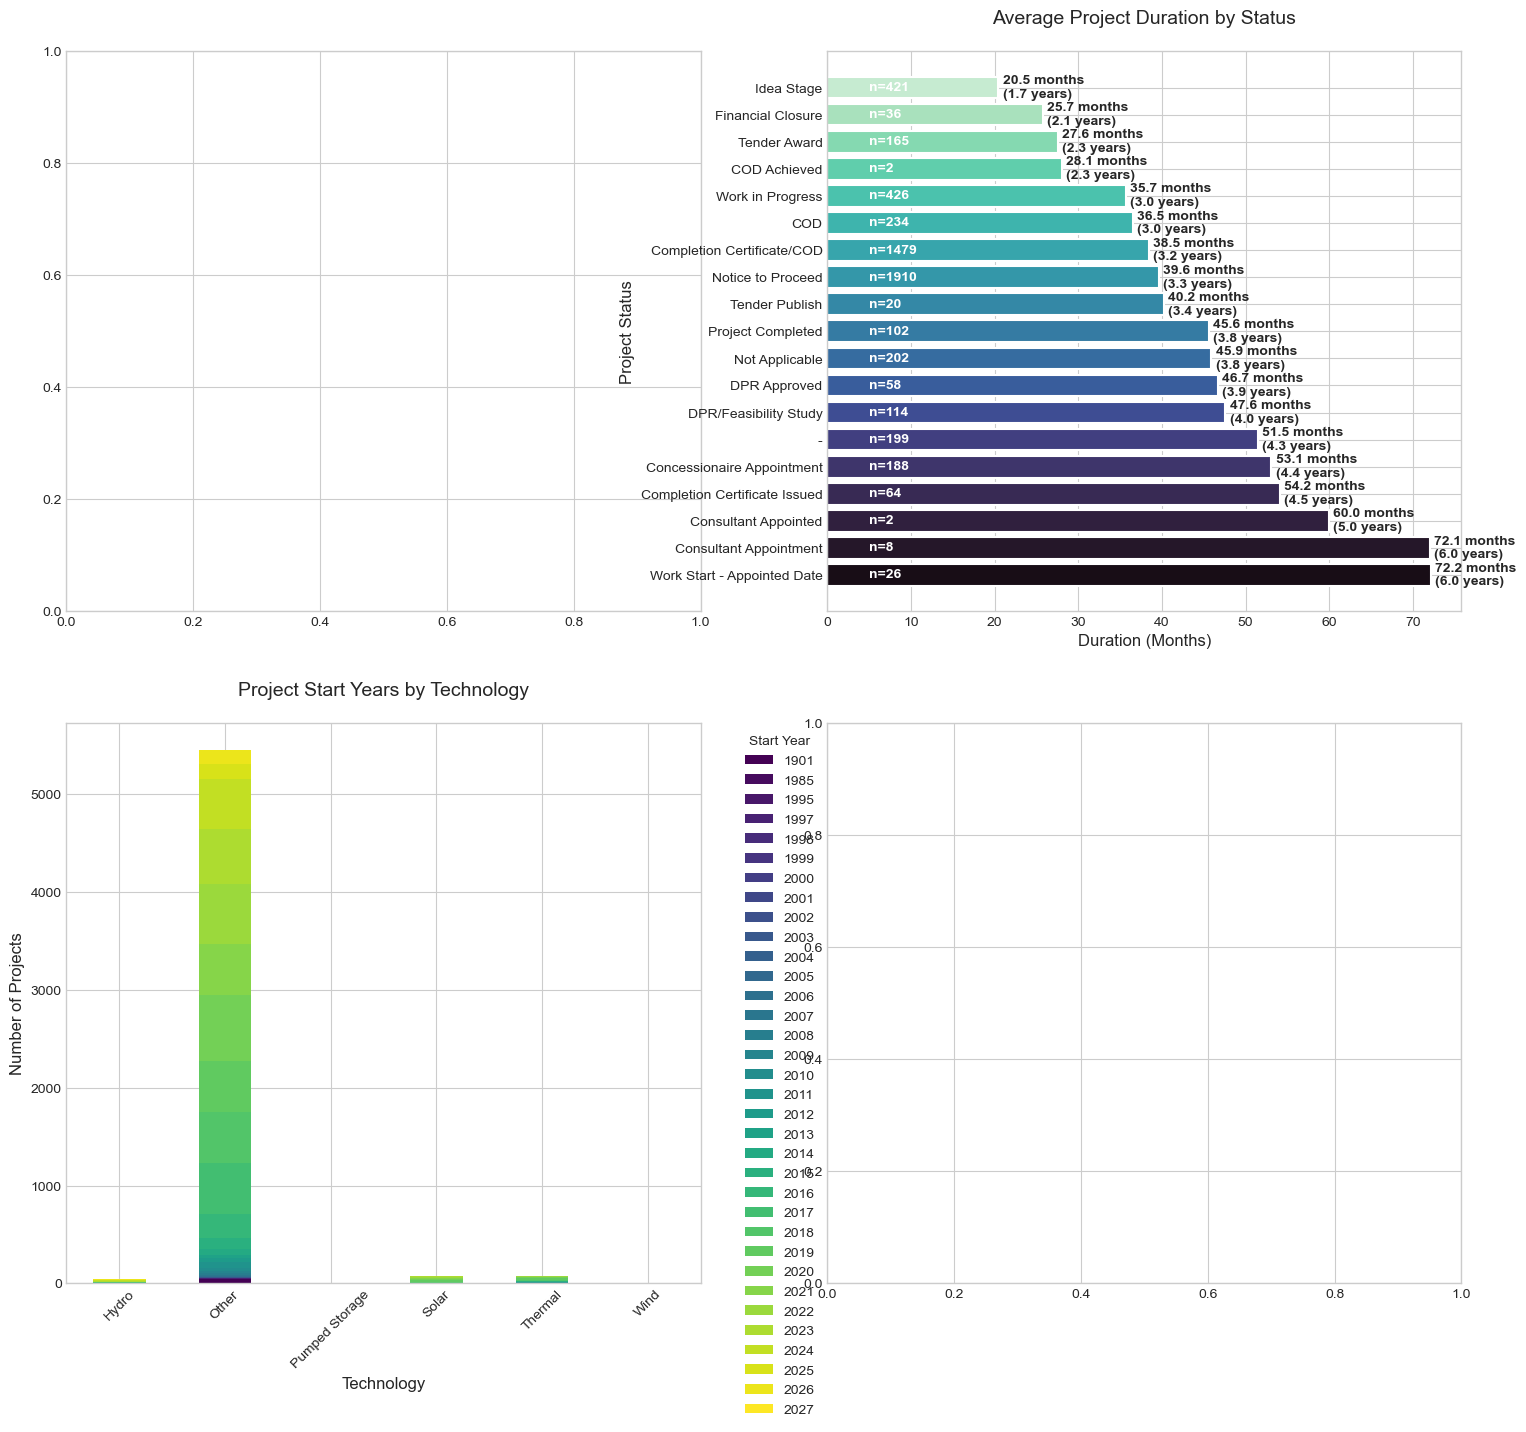

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

def analyze_project_timelines(df):
    """
    Create a visualization analyzing project timelines and durations by technology type
    and project status.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    fig: The matplotlib figure object
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            title_lower = str(title).lower()
            if 'solar' in title_lower:
                return 'Solar'
            elif 'psp' in title_lower or 'pumped storage' in title_lower:
                return 'Pumped Storage'
            elif any(term in title_lower for term in ['hydel', 'hep', 'hydro', 'he project']):
                return 'Hydro'
            elif 'wind' in title_lower:
                return 'Wind'
            else:
                # Check for specific words that might indicate technology type
                if any(term in title_lower for term in ['thermal', 'coal', 'gas']):
                    return 'Thermal'
                else:
                    return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert dates to datetime format if they're not already
    date_columns = ['Start Date', 'Completion Date']
    for col in date_columns:
        if col in df_analysis.columns:
            df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
    
    # Calculate project duration in months
    df_analysis['Duration (Months)'] = None
    
    mask = ~df_analysis['Start Date'].isna() & ~df_analysis['Completion Date'].isna()
    
    if mask.any():
        df_analysis.loc[mask, 'Duration (Months)'] = (
            (df_analysis.loc[mask, 'Completion Date'] - df_analysis.loc[mask, 'Start Date']).dt.days / 30.44
        ).round(1)
    
    # Filter out rows with missing duration data
    df_timeline = df_analysis.dropna(subset=['Duration (Months)'])
    
    # If we have too few projects with valid duration data, notify the user
    if len(df_timeline) < 3:
        raise ValueError("Not enough projects with valid start and completion dates for timeline analysis")
    
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    

    
    # Top-right subplot: Project duration by status
    status_durations = df_timeline.groupby('Project Status')['Duration (Months)'].agg(['mean', 'count']).reset_index()
    status_durations = status_durations.sort_values('mean', ascending=False)
    
    # Only show statuses with at least one project
    status_durations = status_durations[status_durations['count'] > 0]
    
    status_colors = sns.color_palette("mako", len(status_durations))
    
    bars2 = axes[0, 1].barh(status_durations['Project Status'], status_durations['mean'], 
                          color=status_colors, edgecolor='white', linewidth=1.5)
    
    axes[0, 1].set_title('Average Project Duration by Status', fontsize=14, pad=20)
    axes[0, 1].set_xlabel('Duration (Months)', fontsize=12)
    axes[0, 1].set_ylabel('Project Status', fontsize=12)
    
    # Add data labels
    for bar in bars2:
        width = bar.get_width()
        years = width / 12
        axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                     f'{width:.1f} months\n({years:.1f} years)', 
                     va='center', fontsize=10, fontweight='bold')
    
    # Add count labels
    for i, (_, row) in enumerate(status_durations.iterrows()):
        axes[0, 1].text(5, i, f"n={int(row['count'])}", 
                      ha='left', va='center', color='white', 
                      fontweight='bold', fontsize=10)
    
    # Bottom-left subplot: Project start years by technology
    df_timeline['Start Year'] = df_timeline['Start Date'].dt.year
    
    # Create a crosstab of technologies and start years
    tech_years = pd.crosstab(df_timeline['Technology'], df_timeline['Start Year'])
    
    # Plot as a stacked bar chart
    tech_years.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
    
    axes[1, 0].set_title('Project Start Years by Technology', fontsize=14, pad=20)
    axes[1, 0].set_xlabel('Technology', fontsize=12)
    axes[1, 0].set_ylabel('Number of Projects', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Add legend with better positioning
    axes[1, 0].legend(title='Start Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Bottom-right subplot: Scatter plot of project cost vs. duration
    scatter = axes[1, 1].scatter(
        df_timeline['Duration (Months)'], 
        df_timeline['Total Project Cost (USD mn)'],
        c=[colors[tech_durations['Technology'].tolist().index(t)] if t in tech_durations['Technology'].tolist() else 'gray' 
           for t in df_timeline['Technology']],
        s=100, alpha=0.7, edgecolors='white', linewidth=1
    )
    
    axes[1, 1].set_title('Project Cost vs. Duration', fontsize=14, pad=20)
    axes[1, 1].set_xlabel('Duration (Months)', fontsize=12)
    axes[1, 1].set_ylabel('Project Cost (USD millions)', fontsize=12)
    
    # Add a trend line
    if len(df_timeline) >= 3:  # Need at least 3 points for a meaningful trend line
        z = np.polyfit(df_timeline['Duration (Months)'], df_timeline['Total Project Cost (USD mn)'], 1)
        p = np.poly1d(z)
        axes[1, 1].plot(df_timeline['Duration (Months)'], p(df_timeline['Duration (Months)']), 
                      "r--", alpha=0.8, linewidth=2)
        
        # Add correlation coefficient
        corr = df_timeline['Duration (Months)'].corr(df_timeline['Total Project Cost (USD mn)'])
        axes[1, 1].text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=axes[1, 1].transAxes, 
                      fontsize=12, va='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Add technology labels to points
    for i, row in df_timeline.iterrows():
        axes[1, 1].annotate(
            row['Technology'],
            (row['Duration (Months)'], row['Total Project Cost (USD mn)']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.7
        )
    
    # Add overall title
    plt.suptitle('Energy Project Timeline Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    longest_tech = tech_durations.iloc[0]['Technology'] if len(tech_durations) > 0 else "N/A"
    longest_duration = tech_durations.iloc[0]['mean'] if len(tech_durations) > 0 else 0
    
    longest_status = status_durations.iloc[0]['Project Status'] if len(status_durations) > 0 else "N/A"
    longest_status_duration = status_durations.iloc[0]['mean'] if len(status_durations) > 0 else 0
    
    if len(tech_years) > 0:
        most_recent_year = tech_years.columns.max()
        dominant_tech_recent = tech_years[most_recent_year].idxmax() if most_recent_year in tech_years.columns else "N/A"
        recent_count = tech_years.loc[dominant_tech_recent, most_recent_year] if most_recent_year in tech_years.columns else 0
    else:
        most_recent_year = "N/A"
        dominant_tech_recent = "N/A"
        recent_count = 0
    
    # Add insights
    insight_text = (
        f"Timeline Insights:\n"
        f"• {longest_tech} projects have the longest average duration at {longest_duration:.1f} months ({longest_duration/12:.1f} years)\n"
        f"• Projects in {longest_status} status average {longest_status_duration:.1f} months duration\n"
        f"• {dominant_tech_recent} dominates recent projects ({recent_count} in {most_recent_year})\n"
        f"• ACTUAL's timeline optimization capabilities would be most valuable for {longest_tech} projects"
    )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, df_timeline

# Example usage:
fig, timeline_data = analyze_project_timelines(df_v4)
plt.savefig('project_timeline_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

def analyze_project_timelines(df, output_path=None):
    """
    Create a comprehensive visualization analyzing energy project timelines and durations
    by technology type and project status.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing energy project data with columns:
        - Title: Project title text
        - Start Date: Project start date
        - Completion Date: Project completion date
        - Project Status: Current status of the project
        - Total Project Cost (USD mn): Cost in USD millions
        
    output_path : str, optional
        If provided, saves the figure to this path
        
    Returns:
    --------
    tuple:
        - fig: The matplotlib figure object
        - df_timeline: The processed DataFrame with timeline analysis
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert dates to datetime format if they're not already
    date_columns = ['Start Date', 'Completion Date']
    for col in date_columns:
        if col in df_analysis.columns:
            df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
    
    # Calculate project duration in months
    df_analysis['Duration (Months)'] = None
    
    mask = ~df_analysis['Start Date'].isna() & ~df_analysis['Completion Date'].isna()
    
    if mask.any():
        df_analysis.loc[mask, 'Duration (Months)'] = (
            (df_analysis.loc[mask, 'Completion Date'] - df_analysis.loc[mask, 'Start Date']).dt.days / 30.44
        ).round(1)
    
    # Filter out rows with missing duration data
    df_timeline = df_analysis.dropna(subset=['Duration (Months)'])
    
    # If we have too few projects with valid duration data, notify the user
    if len(df_timeline) < 3:
        print("Warning: Not enough projects with valid start and completion dates for timeline analysis")
        return None, df_analysis
    
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Top-left subplot: Average duration by technology
    tech_durations = df_timeline.groupby('Technology')['Duration (Months)'].agg(['mean', 'count']).reset_index()
    tech_durations = tech_durations.sort_values('mean', ascending=False)
    
    # Only show technologies with at least one project
    tech_durations = tech_durations[tech_durations['count'] > 0]
    
    # Generate colors for technology types
    colors = sns.color_palette("viridis", len(tech_durations))
    
    bars1 = axes[0, 0].barh(tech_durations['Technology'], tech_durations['mean'], 
                          color=colors, edgecolor='white', linewidth=1.5)
    
    axes[0, 0].set_title('Average Project Duration by Technology', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Duration (Months)', fontsize=12)
    axes[0, 0].set_ylabel('Technology', fontsize=12)
    
    # Add data labels
    for bar in bars1:
        width = bar.get_width()
        years = width / 12
        axes[0, 0].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                     f'{width:.1f} months\n({years:.1f} years)', 
                     va='center', fontsize=10, fontweight='bold')
    
    # Add count labels
    for i, (_, row) in enumerate(tech_durations.iterrows()):
        axes[0, 0].text(5, i, f"n={int(row['count'])}", 
                      ha='left', va='center', color='white', 
                      fontweight='bold', fontsize=10)
    
    # Top-right subplot: Project duration by status
    status_durations = df_timeline.groupby('Project Status')['Duration (Months)'].agg(['mean', 'count']).reset_index()
    status_durations = status_durations.sort_values('mean', ascending=False)
    
    # Only show statuses with at least one project
    status_durations = status_durations[status_durations['count'] > 0]
    
    status_colors = sns.color_palette("mako", len(status_durations))
    
    bars2 = axes[0, 1].barh(status_durations['Project Status'], status_durations['mean'], 
                          color=status_colors, edgecolor='white', linewidth=1.5)
    
    axes[0, 1].set_title('Average Project Duration by Status', fontsize=14, pad=20)
    axes[0, 1].set_xlabel('Duration (Months)', fontsize=12)
    axes[0, 1].set_ylabel('Project Status', fontsize=12)
    
    # Add data labels
    for bar in bars2:
        width = bar.get_width()
        years = width / 12
        axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                     f'{width:.1f} months\n({years:.1f} years)', 
                     va='center', fontsize=10, fontweight='bold')
    
    # Add count labels
    for i, (_, row) in enumerate(status_durations.iterrows()):
        axes[0, 1].text(5, i, f"n={int(row['count'])}", 
                      ha='left', va='center', color='white', 
                      fontweight='bold', fontsize=10)
    
    # Bottom-left subplot: Project start years by technology
    if 'Start Date' in df_timeline.columns:
        df_timeline['Start Year'] = df_timeline['Start Date'].dt.year
        
        # Remove NaT values
        year_data = df_timeline.dropna(subset=['Start Year'])
        
        if not year_data.empty and len(year_data['Start Year'].unique()) > 0:
            # Create a crosstab of technologies and start years
            tech_years = pd.crosstab(year_data['Technology'], year_data['Start Year'])
            
            # Plot as a stacked bar chart
            tech_years.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
            
            axes[1, 0].set_title('Projects Started by Year and Technology', fontsize=14, pad=20)
            axes[1, 0].set_xlabel('Year', fontsize=12)
            axes[1, 0].set_ylabel('Number of Projects', fontsize=12)
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Add legend with better positioning
            axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axes[1, 0].text(0.5, 0.5, 'Insufficient data for year analysis', 
                          ha='center', va='center', fontsize=14)
    else:
        axes[1, 0].text(0.5, 0.5, 'No start date data available', 
                      ha='center', va='center', fontsize=14)
    
    # Bottom-right subplot: Scatter plot of project cost vs. duration
    if 'Total Project Cost (USD mn)' in df_timeline.columns:
        cost_data = df_timeline.dropna(subset=['Total Project Cost (USD mn)'])
        
        if not cost_data.empty:
            # Create a dictionary to map technologies to colors
            tech_color_dict = {tech: colors[i] for i, tech in enumerate(tech_durations['Technology'])}
            
            # Default color for technologies not in the color dictionary
            default_color = 'gray'
            
            # Get color for each point
            point_colors = [tech_color_dict.get(tech, default_color) for tech in cost_data['Technology']]
            
            scatter = axes[1, 1].scatter(
                cost_data['Duration (Months)'], 
                cost_data['Total Project Cost (USD mn)'],
                c=point_colors,
                s=100, alpha=0.7, edgecolors='white', linewidth=1
            )
            
            axes[1, 1].set_title('Project Cost vs. Duration', fontsize=14, pad=20)
            axes[1, 1].set_xlabel('Duration (Months)', fontsize=12)
            axes[1, 1].set_ylabel('Project Cost (USD millions)', fontsize=12)
            
            # Add a trend line
            if len(cost_data) >= 3:  # Need at least 3 points for a meaningful trend line
                z = np.polyfit(cost_data['Duration (Months)'], cost_data['Total Project Cost (USD mn)'], 1)
                p = np.poly1d(z)
                
                # Create x values for the trend line
                x_trend = np.linspace(cost_data['Duration (Months)'].min(), cost_data['Duration (Months)'].max(), 100)
                
                axes[1, 1].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
                
                # Add correlation coefficient
                corr = cost_data['Duration (Months)'].corr(cost_data['Total Project Cost (USD mn)'])
                axes[1, 1].text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=axes[1, 1].transAxes, 
                              fontsize=12, va='top', bbox=dict(facecolor='white', alpha=0.7))
            
            # Create a legend for technologies
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
                      for color in tech_color_dict.values()]
            labels = list(tech_color_dict.keys())
            
            # Place the legend
            if handles and labels:
                axes[1, 1].legend(handles, labels, title='Technology', 
                                loc='upper right', bbox_to_anchor=(1, 1))
        else:
            axes[1, 1].text(0.5, 0.5, 'Insufficient cost data for analysis', 
                          ha='center', va='center', fontsize=14)
    else:
        axes[1, 1].text(0.5, 0.5, 'No cost data available', 
                      ha='center', va='center', fontsize=14)
    
    # Add overall title
    plt.suptitle('Energy Project Timeline Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    insights = []
    
    # Add technology duration insights
    if len(tech_durations) > 0:
        longest_tech = tech_durations.iloc[0]['Technology']
        longest_duration = tech_durations.iloc[0]['mean']
        insights.append(f"• {longest_tech} projects have the longest average duration at {longest_duration:.1f} months ({longest_duration/12:.1f} years)")
    
    # Add status duration insights
    if len(status_durations) > 0:
        longest_status = status_durations.iloc[0]['Project Status']
        longest_status_duration = status_durations.iloc[0]['mean']
        insights.append(f"• Projects in '{longest_status}' status average {longest_status_duration:.1f} months duration")
    
    # Add project start year insights
    if 'Start Date' in df_timeline.columns and 'tech_years' in locals() and not tech_years.empty:
        most_recent_year = tech_years.columns.max()
        if most_recent_year in tech_years.columns:
            dominant_tech_recent = tech_years[most_recent_year].idxmax()
            recent_count = tech_years.loc[dominant_tech_recent, most_recent_year]
            insights.append(f"• {dominant_tech_recent} dominates recent projects ({recent_count} in {most_recent_year})")
    
    # Add ACTUAL's value proposition
    if len(tech_durations) > 0:
        insights.append(f"• ACTUAL's timeline optimization capabilities would be most valuable for {longest_tech} projects")
    
    # Add cost correlation insights
    if 'corr' in locals():
        correlation_strength = "strong positive" if corr > 0.7 else "moderate positive" if corr > 0.3 else "weak positive" if corr > 0 else "weak negative" if corr > -0.3 else "moderate negative" if corr > -0.7 else "strong negative"
        insights.append(f"• There is a {correlation_strength} correlation ({corr:.2f}) between project duration and cost")
    
    # Combine insights
    if insights:
        insight_text = "Timeline Insights:\n" + "\n".join(insights)
        plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
                  bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    # Save figure if output path is provided
    if output_path:
        try:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Figure saved to {output_path}")
        except Exception as e:
            print(f"Error saving figure: {e}")
    
    return fig, df_timeline


# Example usage:
# df = pd.read_csv('energy_projects.csv')
# fig, timeline_data = analyze_project_timelines(df, output_path='project_timeline_analysis.png')
# plt.show()

C:\Users\GaganReddy\AppData\Local\Temp\ipykernel_4024\2831190177.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_data = df_analysis.groupby('Project Status').agg({


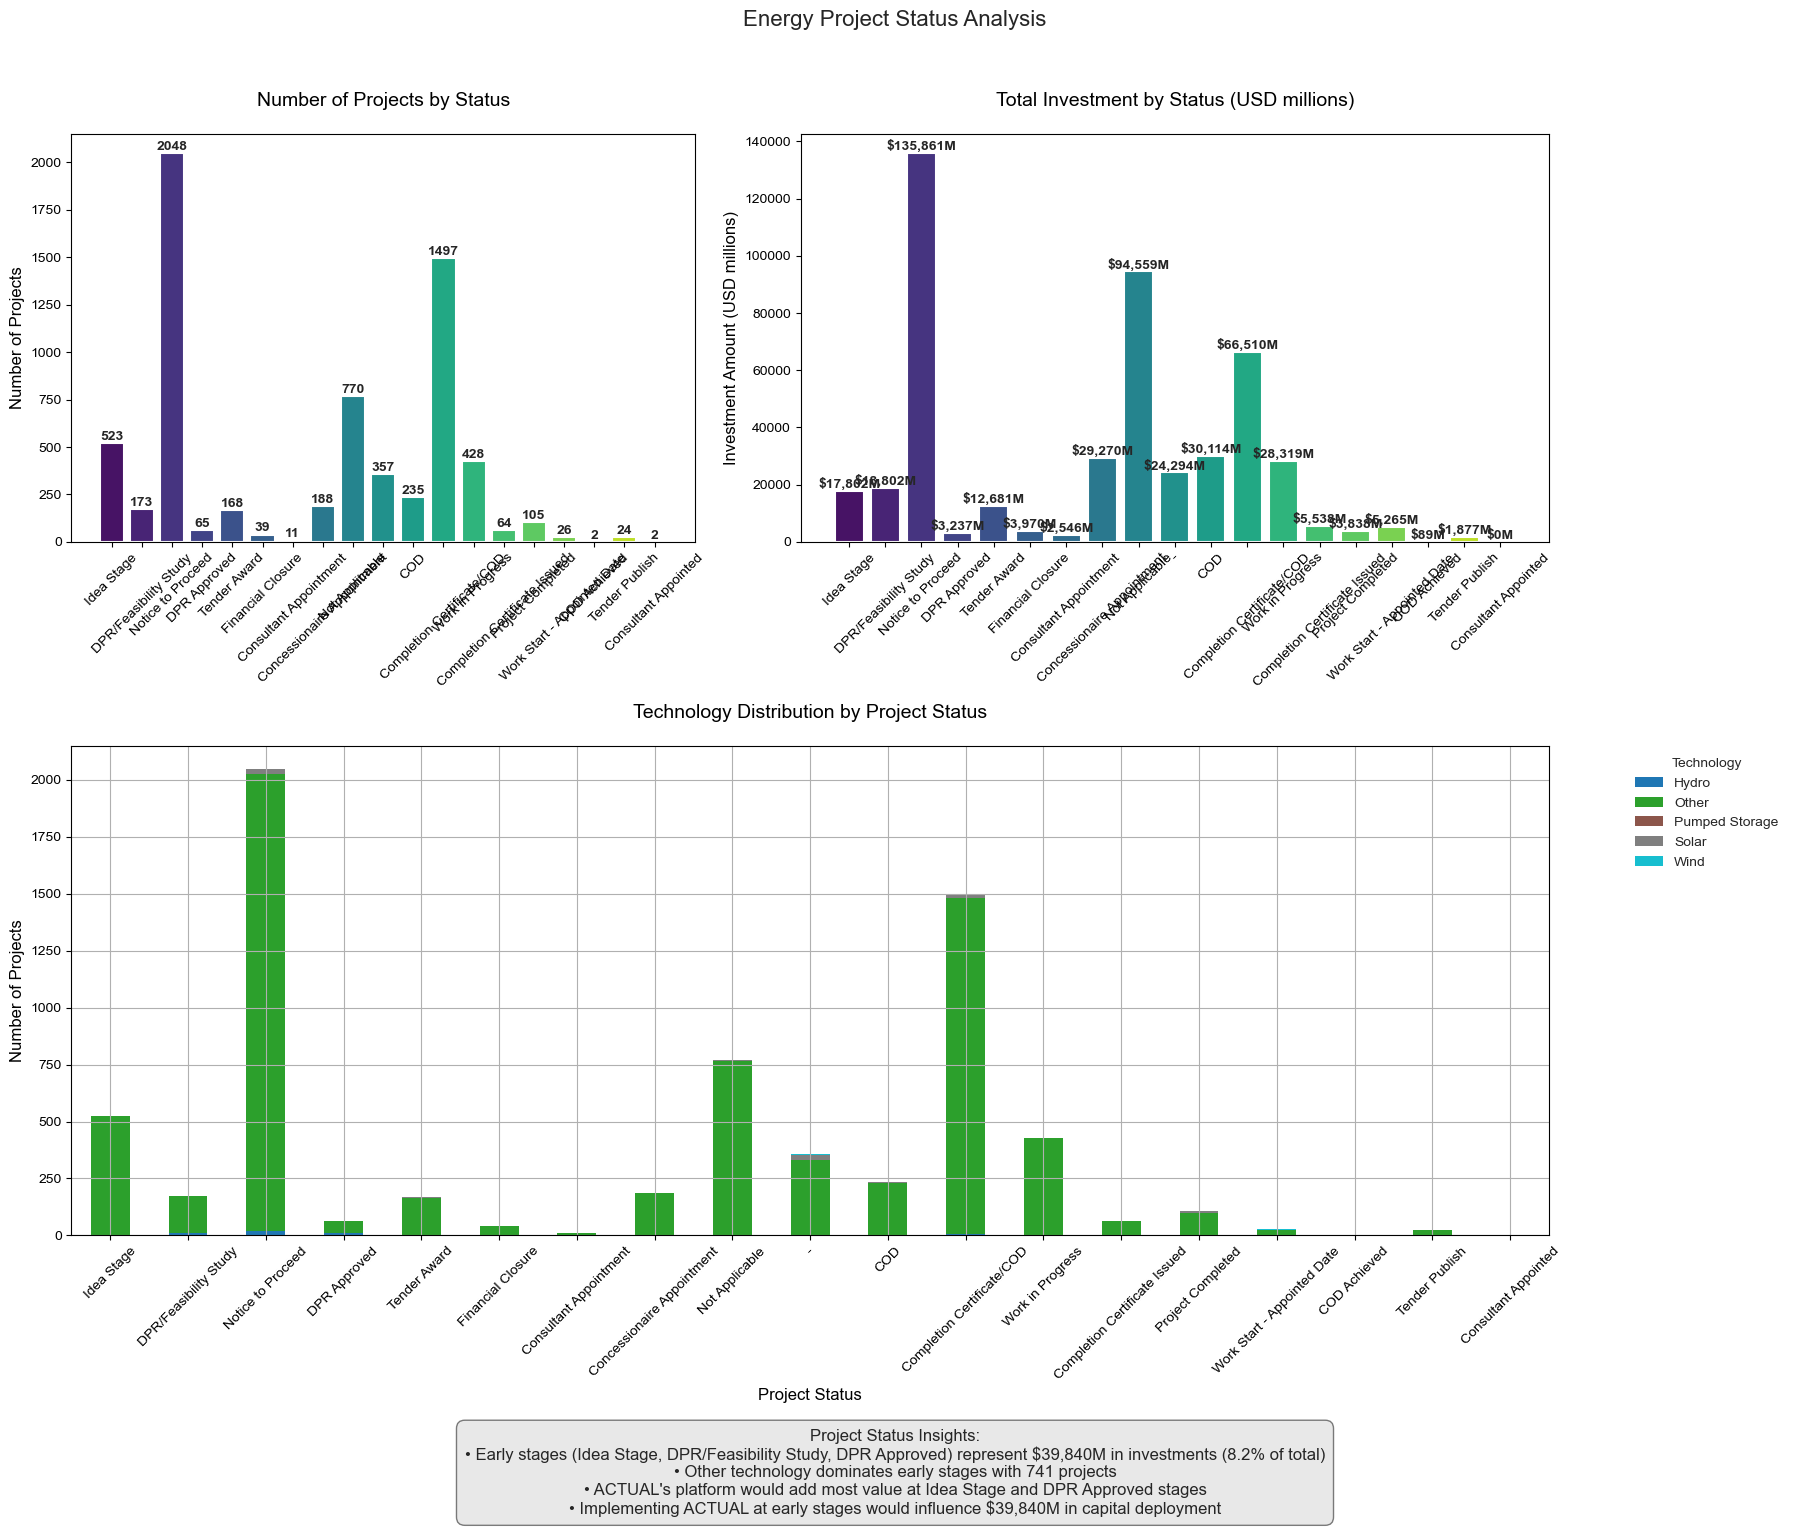

               Project Status  \
0                  Idea Stage   
1       DPR/Feasibility Study   
2           Notice to Proceed   
3                DPR Approved   
4                Tender Award   
5           Financial Closure   
6      Consultant Appointment   
7  Concessionaire Appointment   
8              Not Applicable   
9                           -   

                            ACTUAL Value Proposition  
0  Very High - Site selection, resource assessmen...  
1  Very High - Detailed financial modeling, risk ...  
2  High - Supplier selection, construction planni...  
3  High - Implementation planning, stakeholder ma...  
4  Medium - Contract management, timeline optimiz...  
5  High - Risk transparency, ESG metrics, sensiti...  
6  Medium - Expertise integration, design optimiz...  
7  Medium - Contract management, operational plan...  
8            Variable - Depends on project specifics  
9                                            Unknown  


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_project_status(df):
    """
    Create a visualization showing the distribution of projects by status,
    with investment analysis and ACTUAL platform implementation recommendations.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    fig: The matplotlib figure object
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            title_lower = str(title).lower()
            if 'solar' in title_lower:
                return 'Solar'
            elif 'psp' in title_lower or 'pumped storage' in title_lower:
                return 'Pumped Storage'
            elif any(term in title_lower for term in ['hydel', 'hep', 'hydro', 'he project']):
                return 'Hydro'
            elif 'wind' in title_lower:
                return 'Wind'
            else:
                return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Define a logical order for project statuses
    status_order = [
        'Idea Stage',
        'DPR/Feasibility Study', 
        'Notice to Proceed',
        'DPR Approved',
        'Tender Award',
        'Financial Closure',
        'Under Construction',
        'Consultant Appointment',
        'Concessionaire Appointment',
        'Operational',
        'Not Applicable',
        '-'  # For empty status
    ]
    
    # Map existing statuses to the ordered list
    existing_statuses = df_analysis['Project Status'].unique()
    ordered_statuses = [status for status in status_order if status in existing_statuses]
    
    # Add any statuses that weren't in our predefined order
    for status in existing_statuses:
        if status not in ordered_statuses and pd.notna(status):
            ordered_statuses.append(status)
    
    # Create a categorical type for proper ordering
    df_analysis['Project Status'] = pd.Categorical(
        df_analysis['Project Status'],
        categories=ordered_statuses,
        ordered=True
    )
    
    # Group data by project status
    status_data = df_analysis.groupby('Project Status').agg({
        'Project ID': 'count',
        'Total Project Cost (USD mn)': ['sum', 'mean', 'min', 'max']
    })
    
    # Flatten the multi-index columns
    status_data.columns = ['Project_Count', 'Total_Investment', 'Avg_Cost', 'Min_Cost', 'Max_Cost']
    status_data = status_data.reset_index()
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1.2])
    
    # Create the individual subplot axes
    ax1 = fig.add_subplot(gs[0, 0])  # Top-left: Project count by status
    ax2 = fig.add_subplot(gs[0, 1])  # Top-right: Total investment by status
    ax3 = fig.add_subplot(gs[1, :])  # Bottom: Technology breakdown by status
    
    # Improve visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set colors for status
    status_colors = sns.color_palette("viridis", len(status_data))
    
    # Top-left plot: Number of projects by status
    bars1 = ax1.bar(status_data['Project Status'], status_data['Project_Count'], 
                color=status_colors, edgecolor='white', linewidth=1.5)
    
    # Add data labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{int(height)}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
    # Customize top-left plot
    ax1.set_title('Number of Projects by Status', fontsize=14, pad=20)
    ax1.set_ylabel('Number of Projects', fontsize=12)
    ax1.set_xlabel('')
    ax1.tick_params(axis='x', rotation=45)
    
    # Top-right plot: Total investment by status
    bars2 = ax2.bar(status_data['Project Status'], status_data['Total_Investment'], 
                  color=status_colors, edgecolor='white', linewidth=1.5)
    
    # Add data labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'${height:,.0f}M', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
    # Customize top-right plot
    ax2.set_title('Total Investment by Status (USD millions)', fontsize=14, pad=20)
    ax2.set_ylabel('Investment Amount (USD millions)', fontsize=12)
    ax2.set_xlabel('')
    ax2.tick_params(axis='x', rotation=45)
    
    # Bottom plot: Technology breakdown by status (stacked bar)
    # Create a crosstab of status and technology
    tech_by_status = pd.crosstab(df_analysis['Project Status'], df_analysis['Technology'])
    
    # Plot stacked bars
    tech_by_status.plot(kind='bar', stacked=True, ax=ax3, colormap='tab10')
    
    # Customize bottom plot
    ax3.set_title('Technology Distribution by Project Status', fontsize=14, pad=20)
    ax3.set_ylabel('Number of Projects', fontsize=12)
    ax3.set_xlabel('Project Status', fontsize=12)
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add overall title
    plt.suptitle('Energy Project Status Analysis', fontsize=16, y=0.95)
    
    # Identify high-value implementation stages
    early_stages = ['Idea Stage', 'DPR/Feasibility Study', 'DPR Approved']
    present_early_stages = [s for s in early_stages if s in status_data['Project Status'].values]
    
    # Calculate total investment in early stages
    early_stage_investment = status_data[status_data['Project Status'].isin(present_early_stages)]['Total_Investment'].sum()
    total_investment = status_data['Total_Investment'].sum()
    early_pct = (early_stage_investment / total_investment * 100) if total_investment > 0 else 0
    
    # Find dominant technology in early stages
    if len(present_early_stages) > 0:
        early_techs = df_analysis[df_analysis['Project Status'].isin(present_early_stages)]['Technology'].value_counts()
        dominant_early_tech = early_techs.index[0] if len(early_techs) > 0 else "N/A"
        dominant_early_count = early_techs.iloc[0] if len(early_techs) > 0 else 0
    else:
        dominant_early_tech = "N/A"
        dominant_early_count = 0
    
    # Add insights
    if len(present_early_stages) > 0:
        early_stages_text = ", ".join(present_early_stages)
        insight_text = (
            f"Project Status Insights:\n"
            f"• Early stages ({early_stages_text}) represent ${early_stage_investment:,.0f}M in investments ({early_pct:.1f}% of total)\n"
            f"• {dominant_early_tech} technology dominates early stages with {dominant_early_count} projects\n"
            f"• ACTUAL's platform would add most value at {present_early_stages[0]} and {present_early_stages[-1]} stages\n"
            f"• Implementing ACTUAL at early stages would influence ${early_stage_investment:,.0f}M in capital deployment"
        )
    else:
        insight_text = (
            "Project Status Insights:\n"
            "• No early-stage projects (Idea Stage, DPR/Feasibility, DPR Approved) identified in the dataset\n"
            "• ACTUAL's platform would add most value at planning and feasibility stages\n"
            "• Consider focusing on pre-construction projects for maximum impact"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.93])
    
    # Create value proposition mapping
    value_proposition = {
        'Idea Stage': 'Very High - Site selection, resource assessment, initial capital planning',
        'DPR/Feasibility Study': 'Very High - Detailed financial modeling, risk assessment, resource optimization',
        'DPR Approved': 'High - Implementation planning, stakeholder management, financial closing',
        'Notice to Proceed': 'High - Supplier selection, construction planning, risk mitigation',
        'Tender Award': 'Medium - Contract management, timeline optimization',
        'Financial Closure': 'High - Risk transparency, ESG metrics, sensitivity analysis',
        'Under Construction': 'Medium - Progress tracking, cost monitoring, supply chain optimization',
        'Consultant Appointment': 'Medium - Expertise integration, design optimization',
        'Concessionaire Appointment': 'Medium - Contract management, operational planning',
        'Operational': 'Medium - Performance monitoring, maintenance optimization',
        'Not Applicable': 'Variable - Depends on project specifics',
        '-': 'Unknown'
    }
    
    # Create a value proposition table for existing statuses
    value_table = []
    for status in ordered_statuses:
        if status in value_proposition:
            value_table.append({
                'Project Status': status,
                'ACTUAL Value Proposition': value_proposition[status]
            })
    
    value_df = pd.DataFrame(value_table)
    
    return fig, status_data, tech_by_status, value_df

# Example usage:
fig, status_data, tech_by_status, value_df = analyze_project_status(df_v4)
plt.savefig('project_status_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(value_df)

C:\Users\GaganReddy\AppData\Local\Temp\ipykernel_4024\3534881495.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_data = df_analysis.groupby('Investment Category').agg({


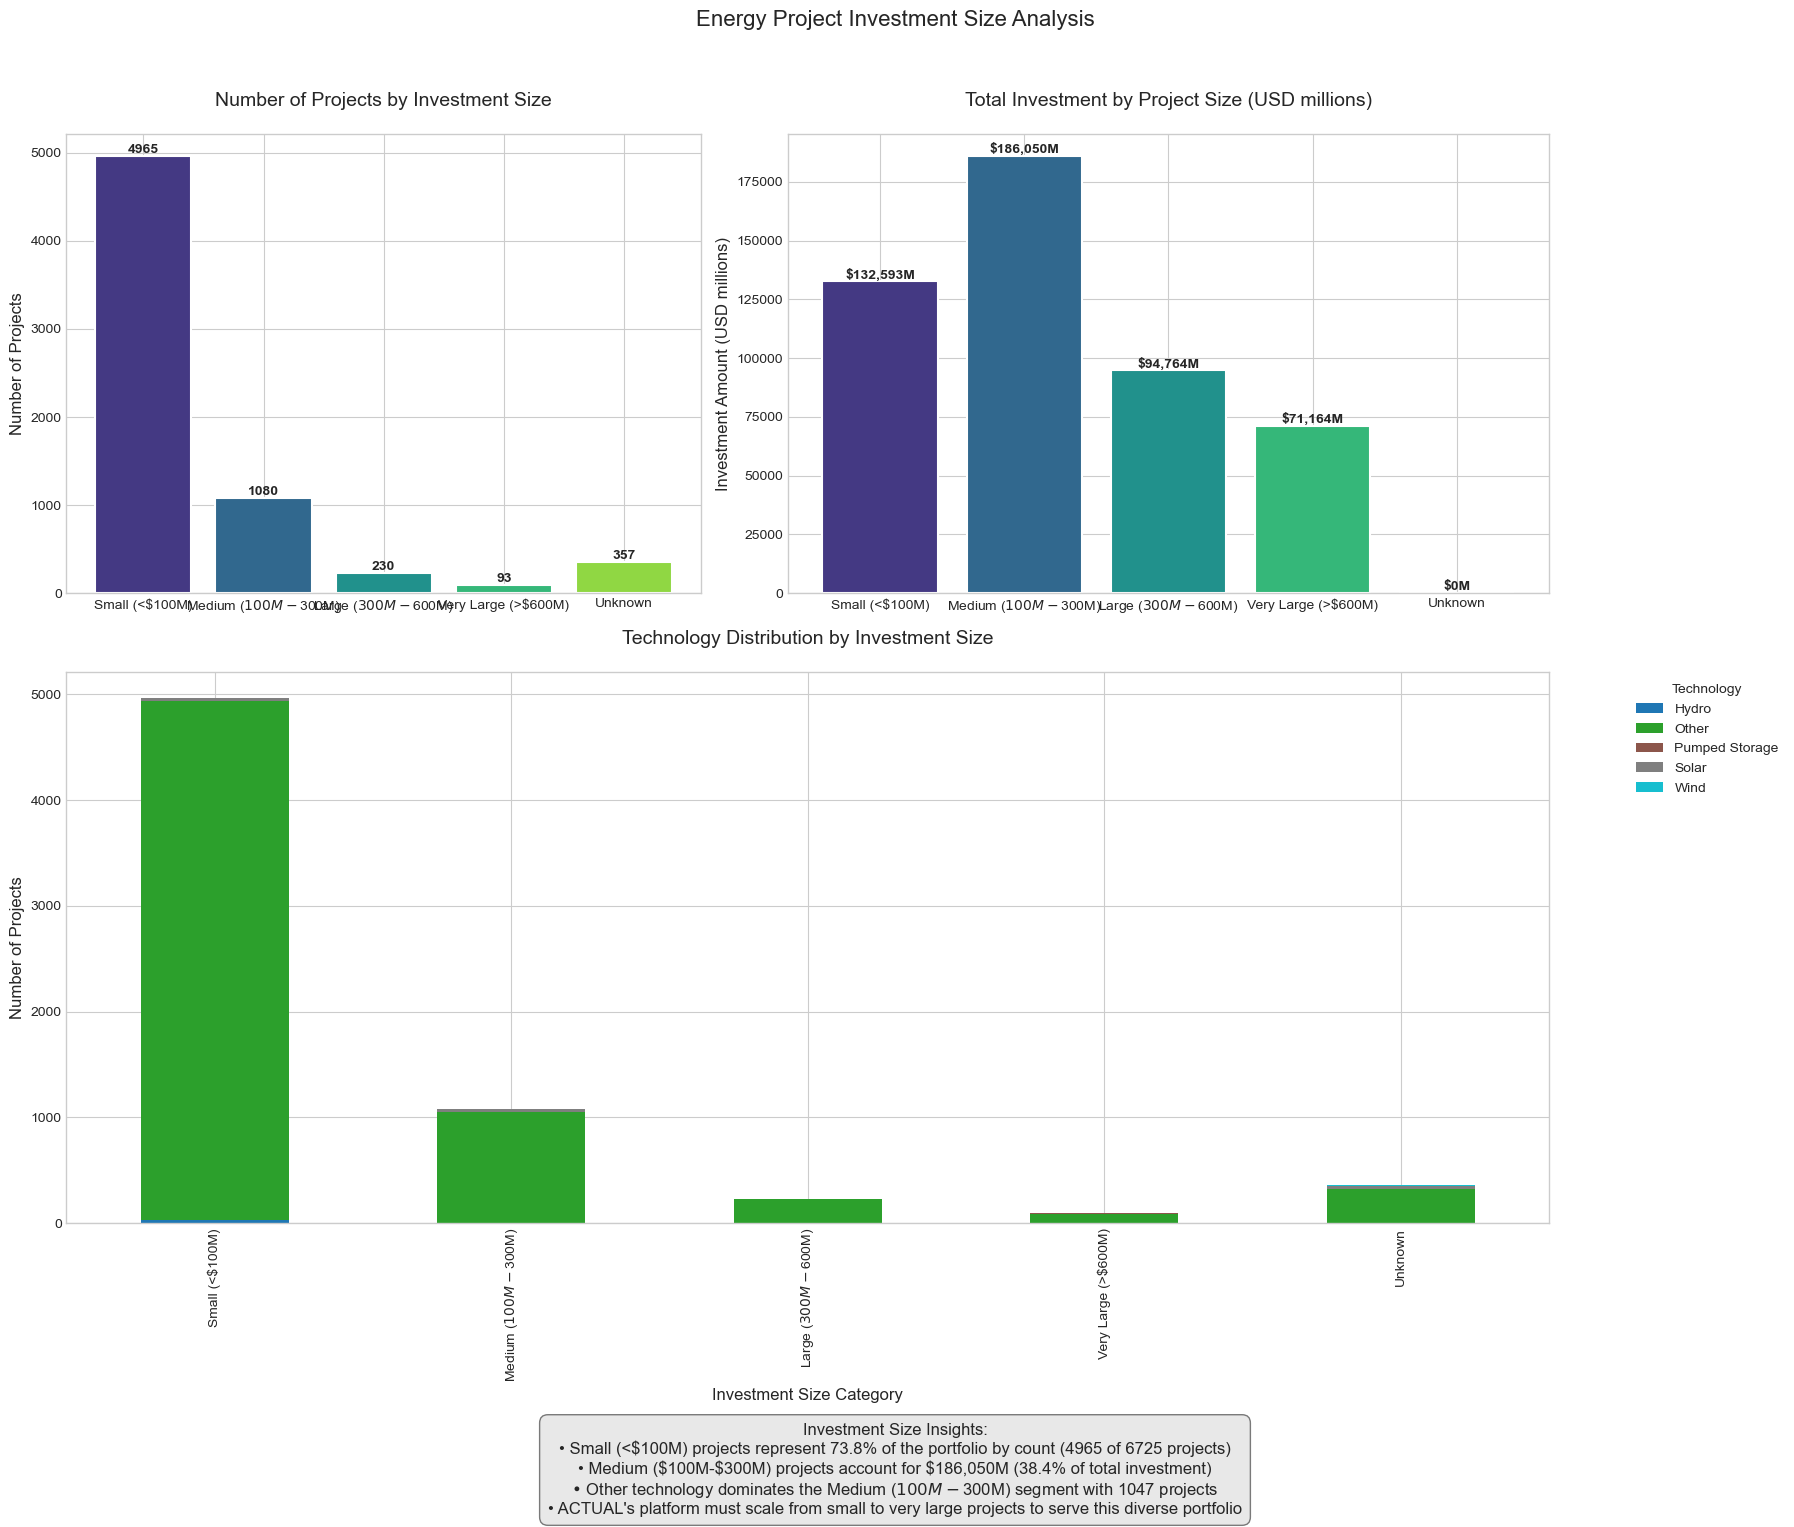

    Investment Category                                  Platform Features  \
0        Small (<$100M)  Standardized templates, simplified workflows, ...   
1  Medium ($100M-$300M)  Custom financial modeling, resource optimizati...   
2   Large ($300M-$600M)  Advanced scenario modeling, risk visualization...   
3   Very Large (>$600M)  Enterprise-scale modeling, AI-driven optimizat...   

                                        Key Benefits  \
0  Reduced overhead, streamlined approval process...   
1  Improved capital efficiency, risk mitigation, ...   
2  Complex project coordination, capital optimiza...   
3  Comprehensive capital planning, complex depend...   

                                       ROI Potential  
0  Medium - Smaller projects benefit from standar...  
1  High - Optimal balance of project complexity a...  
2  Very High - Significant potential for cost sav...  
3  Highest - Even small percentage improvements y...  


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_investment_size_distribution(df):
    """
    Create a visualization showing the distribution of projects by investment size,
    with technology breakdown and ACTUAL platform implementation recommendations.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    fig: The matplotlib figure object
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            title_lower = str(title).lower()
            if 'solar' in title_lower:
                return 'Solar'
            elif 'psp' in title_lower or 'pumped storage' in title_lower:
                return 'Pumped Storage'
            elif any(term in title_lower for term in ['hydel', 'hep', 'hydro', 'he project']):
                return 'Hydro'
            elif 'wind' in title_lower:
                return 'Wind'
            else:
                return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Create investment size categories
    def categorize_investment(cost):
        if pd.isna(cost):
            return 'Unknown'
        elif cost < 100:
            return 'Small (<$100M)'
        elif cost < 300:
            return 'Medium ($100M-$300M)'
        elif cost < 600:
            return 'Large ($300M-$600M)'
        else:
            return 'Very Large (>$600M)'
    
    df_analysis['Investment Category'] = df_analysis['Total Project Cost (USD mn)'].apply(categorize_investment)
    
    # Define category order
    category_order = ['Small (<$100M)', 'Medium ($100M-$300M)', 'Large ($300M-$600M)', 'Very Large (>$600M)', 'Unknown']
    
    # Create categorical type for proper ordering
    df_analysis['Investment Category'] = pd.Categorical(
        df_analysis['Investment Category'],
        categories=category_order,
        ordered=True
    )
    
    # Group data by investment category
    category_data = df_analysis.groupby('Investment Category').agg({
        'Project ID': 'count',
        'Total Project Cost (USD mn)': ['sum', 'mean', 'min', 'max']
    })
    
    # Flatten the multi-index columns
    category_data.columns = ['Project_Count', 'Total_Investment', 'Avg_Cost', 'Min_Cost', 'Max_Cost']
    category_data = category_data.reset_index()
    
    # Remove 'Unknown' category for plotting if present and no data
    if 'Unknown' in category_data['Investment Category'].values:
        unknown_row = category_data[category_data['Investment Category'] == 'Unknown']
        if unknown_row['Project_Count'].iloc[0] == 0:
            category_data = category_data[category_data['Investment Category'] != 'Unknown']
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1.2])
    
    # Create the individual subplot axes
    ax1 = fig.add_subplot(gs[0, 0])  # Top-left: Project count by category
    ax2 = fig.add_subplot(gs[0, 1])  # Top-right: Total investment by category
    ax3 = fig.add_subplot(gs[1, :])  # Bottom: Technology breakdown by category
    
    # Improve visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set colors for categories
    category_colors = sns.color_palette("viridis", len(category_data))
    
    # Top-left plot: Number of projects by investment category
    bars1 = ax1.bar(category_data['Investment Category'], category_data['Project_Count'], 
                color=category_colors, edgecolor='white', linewidth=1.5)
    
    # Add data labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{int(height)}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
    # Customize top-left plot
    ax1.set_title('Number of Projects by Investment Size', fontsize=14, pad=20)
    ax1.set_ylabel('Number of Projects', fontsize=12)
    ax1.set_xlabel('')
    
    # Top-right plot: Total investment by category
    bars2 = ax2.bar(category_data['Investment Category'], category_data['Total_Investment'], 
                  color=category_colors, edgecolor='white', linewidth=1.5)
    
    # Add data labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'${height:,.0f}M', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
    # Customize top-right plot
    ax2.set_title('Total Investment by Project Size (USD millions)', fontsize=14, pad=20)
    ax2.set_ylabel('Investment Amount (USD millions)', fontsize=12)
    ax2.set_xlabel('')
    
    # Bottom plot: Technology breakdown by investment category (stacked bar)
    # Create a crosstab of category and technology
    tech_by_category = pd.crosstab(df_analysis['Investment Category'], df_analysis['Technology'])
    
    # Plot stacked bars
    tech_by_category.plot(kind='bar', stacked=True, ax=ax3, colormap='tab10')
    
    # Customize bottom plot
    ax3.set_title('Technology Distribution by Investment Size', fontsize=14, pad=20)
    ax3.set_ylabel('Number of Projects', fontsize=12)
    ax3.set_xlabel('Investment Size Category', fontsize=12)
    ax3.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add overall title
    plt.suptitle('Energy Project Investment Size Analysis', fontsize=16, y=0.95)
    
    # Calculate key insights
    total_investment = category_data['Total_Investment'].sum()
    total_projects = category_data['Project_Count'].sum()
    
    # Find dominant categories
    dominant_category_by_count = category_data.loc[category_data['Project_Count'].idxmax(), 'Investment Category']
    dominant_count = category_data.loc[category_data['Project_Count'].idxmax(), 'Project_Count']
    count_pct = (dominant_count / total_projects * 100) if total_projects > 0 else 0
    
    dominant_category_by_investment = category_data.loc[category_data['Total_Investment'].idxmax(), 'Investment Category']
    dominant_investment = category_data.loc[category_data['Total_Investment'].idxmax(), 'Total_Investment']
    investment_pct = (dominant_investment / total_investment * 100) if total_investment > 0 else 0
    
    # Find dominant technology in the largest investment category
    largest_category = dominant_category_by_investment
    if largest_category in tech_by_category.index:
        dominant_tech_in_largest = tech_by_category.loc[largest_category].idxmax()
        tech_count_in_largest = tech_by_category.loc[largest_category, dominant_tech_in_largest]
    else:
        dominant_tech_in_largest = "N/A"
        tech_count_in_largest = 0
    
    # Add insights
    insight_text = (
        f"Investment Size Insights:\n"
        f"• {dominant_category_by_count} projects represent {count_pct:.1f}% of the portfolio by count ({dominant_count} of {total_projects} projects)\n"
        f"• {dominant_category_by_investment} projects account for ${dominant_investment:,.0f}M ({investment_pct:.1f}% of total investment)\n"
        f"• {dominant_tech_in_largest} technology dominates the {largest_category} segment with {tech_count_in_largest} projects\n"
        f"• ACTUAL's platform must scale from small to very large projects to serve this diverse portfolio"
    )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.93])
    
    # Create ACTUAL value proposition for each size category
    value_proposition = {
        'Small (<$100M)': {
            'Platform Features': 'Standardized templates, simplified workflows, cost-effective implementation',
            'Key Benefits': 'Reduced overhead, streamlined approval processes, template-based planning',
            'ROI Potential': 'Medium - Smaller projects benefit from standardization and efficiency gains'
        },
        'Medium ($100M-$300M)': {
            'Platform Features': 'Custom financial modeling, resource optimization, stakeholder dashboards',
            'Key Benefits': 'Improved capital efficiency, risk mitigation, enhanced stakeholder communication',
            'ROI Potential': 'High - Optimal balance of project complexity and implementation cost'
        },
        'Large ($300M-$600M)': {
            'Platform Features': 'Advanced scenario modeling, risk visualization, multi-stakeholder integration',
            'Key Benefits': 'Complex project coordination, capital optimization, regulatory compliance',
            'ROI Potential': 'Very High - Significant potential for cost savings on large capital deployments'
        },
        'Very Large (>$600M)': {
            'Platform Features': 'Enterprise-scale modeling, AI-driven optimization, integrated risk management',
            'Key Benefits': 'Comprehensive capital planning, complex dependency modeling, investor dashboards',
            'ROI Potential': 'Highest - Even small percentage improvements yield large absolute savings'
        }
    }
    
    # Create a value proposition table
    value_table = []
    for category in category_order:
        if category in value_proposition and category in category_data['Investment Category'].values:
            row = {'Investment Category': category}
            row.update(value_proposition[category])
            value_table.append(row)
    
    value_df = pd.DataFrame(value_table)
    
    return fig, category_data, tech_by_category, value_df

# Example usage:
fig, category_data, tech_by_category, value_df = analyze_investment_size_distribution(df_v4)
plt.savefig('investment_size_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(value_df)

In [43]:
df_analysis.head()

NameError: name 'df_analysis' is not defined

In [41]:
value_df.head()

,Investment Category,Platform Features,Key Benefits,ROI Potential
0,Small (<$100M),"Standardized templates, simplified workflows, ...","Reduced overhead, streamlined approval process...",Medium - Smaller projects benefit from standar...
1,Medium ($100M-$300M),"Custom financial modeling, resource optimizati...","Improved capital efficiency, risk mitigation, ...",High - Optimal balance of project complexity a...
2,Large ($300M-$600M),"Advanced scenario modeling, risk visualization...","Complex project coordination, capital optimiza...",Very High - Significant potential for cost sav...
3,Very Large (>$600M),"Enterprise-scale modeling, AI-driven optimizat...","Comprehensive capital planning, complex depend...",Highest - Even small percentage improvements y...


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Import all visualization functions
from improved_technology_analysis import improved_technology_analysis
from geographic_distribution_analysis import analyze_geographic_distribution
from project_timeline_analysis import analyze_project_timelines
from project_status_analysis import analyze_project_status
from investment_size_analysis import analyze_investment_size_distribution

def run_energy_project_analysis(df, output_dir="./output", step=None):
    """
    Run the complete energy project analysis, either all steps or a specific step.
    
    Parameters:
    df (DataFrame): The energy project dataframe
    output_dir (str): Directory to save output visualizations
    step (int, optional): Specific step to run (1-5), or None to run all steps
    
    Returns:
    dict: Dictionary containing results from each analysis
    """
    import os
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Initialize results dictionary
    results = {}
    
    # Define the analysis steps
    steps = {
        1: {
            "name": "Technology Distribution Analysis",
            "function": improved_technology_analysis,
            "filename": "technology_distribution.png",
            "description": "Analyzing project distribution by technology type and associated investments"
        },
        2: {
            "name": "Geographic Distribution Analysis",
            "function": analyze_geographic_distribution,
            "filename": "geographic_distribution.png",
            "description": "Mapping projects across different states with investment and technology breakdown"
        },
        3: {
            "name": "Project Timeline Analysis",
            "function": analyze_project_timelines,
            "filename": "project_timelines.png",
            "description": "Analyzing project durations and implementation timelines by technology and status"
        },
        4: {
            "name": "Project Status Analysis",
            "function": analyze_project_status,
            "filename": "project_status.png",
            "description": "Examining project distribution by development stage and identifying optimal entry points"
        },
        5: {
            "name": "Investment Size Analysis",
            "function": analyze_investment_size_distribution,
            "filename": "investment_size.png",
            "description": "Analyzing projects by investment size categories and technology distribution"
        }
    }
    
    # Determine which steps to run
    if step is not None:
        if step not in steps:
            raise ValueError(f"Invalid step number: {step}. Must be between 1 and 5.")
        steps_to_run = {step: steps[step]}
    else:
        steps_to_run = steps
    
    # Run each analysis step
    for step_num, step_info in steps_to_run.items():
        print(f"\n\n{'='*80}")
        print(f"Step {step_num}: {step_info['name']}")
        print(f"{'='*80}")
        print(f"Description: {step_info['description']}")
        print(f"{'='*80}\n")
        
        try:
            # Run the analysis function
            result = step_info["function"](df)
            
            # Save the figure
            fig = result[0]  # First return value is always the figure
            filepath = os.path.join(output_dir, step_info["filename"])
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"Visualization saved to: {filepath}")
            
            # Display the figure
            plt.show()
            
            # Store results
            results[step_num] = {
                "name": step_info["name"],
                "result": result,
                "filepath": filepath
            }
            
            # Process step-specific outputs
            if step_num == 1:  # Technology Distribution
                tech_stats = result[1]  # Second return is always the statistics table
                print("\nTechnology Statistics:")
                display(tech_stats)
                
            elif step_num == 2:  # Geographic Distribution
                state_summary = result[1]
                tech_by_state = result[2]
                print("\nState Summary:")
                display(state_summary)
                print("\nTechnology by State:")
                display(tech_by_state)
                
            elif step_num == 3:  # Project Timeline
                timeline_data = result[1]
                print("\nProject Timeline Data:")
                display(timeline_data[['Title', 'Technology', 'Start Date', 'Completion Date', 'Duration (Months)', 'Total Project Cost (USD mn)']])
                
            elif step_num == 4:  # Project Status
                status_data = result[1]
                tech_by_status = result[2]
                value_proposition = result[3]
                print("\nStatus Summary:")
                display(status_data)
                print("\nACTUAL Platform Value Proposition by Project Status:")
                display(value_proposition)
                
            elif step_num == 5:  # Investment Size
                category_data = result[1]
                tech_by_category = result[2]
                value_df = result[3]
                print("\nInvestment Category Summary:")
                display(category_data)
                print("\nACTUAL Value Proposition by Investment Size:")
                display(value_df)
            
            # Close the figure to free memory
            plt.close(fig)
            
        except Exception as e:
            print(f"Error in Step {step_num}: {e}")
            import traceback
            traceback.print_exc()
    
    # Final summary
    print("\n\n" + "="*80)
    print("Energy Project Analysis Summary")
    print("="*80)
    print(f"Total analyses completed: {len(results)}")
    for step_num, result_info in results.items():
        print(f"- Step {step_num}: {result_info['name']} - Saved to {result_info['filepath']}")
    
    return results

# Example usage:
results = run_energy_project_analysis(df_v4, output_dir="./visualizations")

# To run just one step:
 #results = run_energy_project_analysis(df_v4, output_dir="./visualizations", step=1)

ModuleNotFoundError: No module named 'improved_technology_analysis'

In [1]:
df_analysis.head()

NameError: name 'df_analysis' is not defined

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import os
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

#------------------------------------------------------------
# Technology Distribution Analysis
#------------------------------------------------------------
def improved_technology_analysis(df):
    """
    Create a comprehensive visualization of energy projects by technology type.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, tech_stats)
        - fig: The matplotlib figure object
        - tech_stats: DataFrame with technology statistics
    """
    # Create a copy to avoid modifying the original
    df_tech = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_tech.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_tech['Technology'] = df_tech['Title'].apply(identify_technology)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by technology
    tech_counts = df_tech['Technology'].value_counts().reset_index()
    tech_counts.columns = ['Technology', 'Count']
    
    # Calculate percentage
    total_projects = tech_counts['Count'].sum()
    tech_counts['Percentage'] = (tech_counts['Count'] / total_projects * 100).round(1)
    
    # Sort by count
    tech_counts = tech_counts.sort_values('Count', ascending=False)
    
    # Generate a color palette
    colors = sns.color_palette("viridis", len(tech_counts))
    
    # Plot 1: Project Count by Technology (Top-left)
    sns.barplot(x='Count', y='Technology', data=tech_counts, 
               palette=colors, ax=axes[0, 0])
    
    axes[0, 0].set_title('Number of Projects by Technology', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('Technology', fontsize=12)
    
    # Add count and percentage labels
    for i, row in enumerate(tech_counts.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, f"{row.Count} ({row.Percentage}%)", 
                      va='center', fontsize=10)
    
    # Plot 2: Investment by Technology (Top-right)
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        # Calculate total investment by technology
        tech_investment = df_tech.groupby('Technology')['Total Project Cost (USD mn)'].agg(['sum', 'count']).reset_index()
        tech_investment = tech_investment.sort_values('sum', ascending=False)
        
        sns.barplot(x='sum', y='Technology', data=tech_investment, 
                   palette=colors, ax=axes[0, 1])
        
        axes[0, 1].set_title('Total Investment by Technology (USD Millions)', fontsize=14, pad=20)
        axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
        axes[0, 1].set_ylabel('Technology', fontsize=12)
        
        # Add investment amount labels
        for i, row in enumerate(tech_investment.itertuples()):
            axes[0, 1].text(row.sum + 100, i, f"${row.sum:,.0f}M", 
                          va='center', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'Investment data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Plot 3: Average project size by technology (Bottom-left)
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        # Calculate average project size
        tech_avg = df_tech.groupby('Technology')['Total Project Cost (USD mn)'].mean().reset_index()
        tech_avg.columns = ['Technology', 'Average Cost']
        tech_avg = tech_avg.sort_values('Average Cost', ascending=False)
        
        sns.barplot(x='Average Cost', y='Technology', data=tech_avg, 
                   palette=colors, ax=axes[1, 0])
        
        axes[1, 0].set_title('Average Project Cost by Technology (USD Millions)', fontsize=14, pad=20)
        axes[1, 0].set_xlabel('Average Cost (USD Millions)', fontsize=12)
        axes[1, 0].set_ylabel('Technology', fontsize=12)
        
        # Add average cost labels
        for i, row in enumerate(tech_avg.itertuples()):
            axes[1, 0].text(row._2 + 20, i, f"${row._2:,.1f}M", 
                          va='center', fontsize=10)
    else:
        axes[1, 0].text(0.5, 0.5, 'Cost data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 0].transAxes)
    
    # Plot 4: Technology mix pie chart (Bottom-right)
    wedges, texts, autotexts = axes[1, 1].pie(
        tech_counts['Count'], 
        labels=tech_counts['Technology'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1}
    )
    
    # Style the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    axes[1, 1].set_title('Project Technology Mix', fontsize=14, pad=20)
    
    # Create a pandas DataFrame for statistics
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        tech_stats = df_tech.groupby('Technology').agg({
            'Project ID': 'count',
            'Total Project Cost (USD mn)': ['sum', 'mean', 'min', 'max']
        }).reset_index()
        
        # Flatten the multi-index columns
        tech_stats.columns = ['Technology', 'Count', 'Total Investment (USD mn)', 
                             'Average Cost (USD mn)', 'Min Cost (USD mn)', 'Max Cost (USD mn)']
    else:
        tech_stats = tech_counts.rename(columns={'Count': 'Number of Projects'})
    
    # Add percentage column
    tech_stats['Percentage of Projects'] = (tech_stats['Count'] / tech_stats['Count'].sum() * 100).round(1)
    
    # Sort by count descending
    tech_stats = tech_stats.sort_values('Count', ascending=False)
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Energy Project Technology Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    dominant_tech = tech_counts.iloc[0]['Technology']
    
    # Calculate diversity index (normalized Shannon entropy)
    total = tech_counts['Count'].sum()
    proportions = tech_counts['Count'] / total
    diversity = -sum(p * np.log(p) for p in proportions if p > 0) / np.log(len(proportions))
    diversity_level = "high" if diversity > 0.75 else "moderate" if diversity > 0.5 else "low"
    
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        highest_investment_tech = tech_investment.iloc[0]['Technology']
        highest_investment = tech_investment.iloc[0]['sum']
        highest_avg_cost_tech = tech_avg.iloc[0]['Technology']
        highest_avg_cost = tech_avg.iloc[0]['Average Cost']
        
        insight_text = (
            f"Technology Insights:\n"
            f"• {dominant_tech} has the most projects ({tech_counts.iloc[0]['Count']} projects, {tech_counts.iloc[0]['Percentage']}% of total)\n"
            f"• Technology diversity is {diversity_level} (diversity index: {diversity:.2f})\n"
            f"• {highest_investment_tech} has the highest total investment (${highest_investment:,.0f}M)\n"
            f"• {highest_avg_cost_tech} projects have the highest average cost (${highest_avg_cost:,.1f}M)\n"
            f"• ACTUAL's platform would deliver highest ROI for {highest_investment_tech} projects"
        )
    else:
        insight_text = (
            f"Technology Insights:\n"
            f"• {dominant_tech} has the most projects ({tech_counts.iloc[0]['Count']} projects, {tech_counts.iloc[0]['Percentage']}% of total)\n"
            f"• Technology diversity is {diversity_level} (diversity index: {diversity:.2f})\n"
            f"• ACTUAL's platform can optimize project planning for the dominant {dominant_tech} technology"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, tech_stats


#------------------------------------------------------------
# Geographic Distribution Analysis
#------------------------------------------------------------
def analyze_geographic_distribution(df):
    """
    Create a visualization of project distribution by geography.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, state_summary, tech_by_state)
        - fig: The matplotlib figure object
        - state_summary: DataFrame with state level statistics
        - tech_by_state: DataFrame with technology by state breakdown
    """
    # Create a copy to avoid modifying the original
    df_geo = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_geo.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_geo['Technology'] = df_geo['Title'].apply(identify_technology)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by state
    state_counts = df_geo['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Count']
    
    # Top 15 states by project count
    top_states = state_counts.head(15)
    
    # Generate a color palette
    state_colors = sns.color_palette("viridis", len(top_states))
    
    # Plot 1: Project Count by State (Top-left)
    sns.barplot(x='Count', y='State', data=top_states, 
               palette=state_colors, ax=axes[0, 0])
    
    axes[0, 0].set_title('Number of Projects by State (Top 15)', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('State', fontsize=12)
    
    # Add count labels
    for i, row in enumerate(top_states.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, str(row.Count), 
                      va='center', fontsize=10)
    
    # Plot 2: Investment by State (Top-right)
    if 'Total Project Cost (USD mn)' in df_geo.columns:
        # Calculate total investment by state
        state_investment = df_geo.groupby('State')['Total Project Cost (USD mn)'].sum().reset_index()
        state_investment = state_investment.sort_values('Total Project Cost (USD mn)', ascending=False).head(15)
        
        sns.barplot(x='Total Project Cost (USD mn)', y='State', data=state_investment, 
                   palette=state_colors, ax=axes[0, 1])
        
        axes[0, 1].set_title('Total Investment by State (USD Millions) - Top 15', fontsize=14, pad=20)
        axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
        axes[0, 1].set_ylabel('State', fontsize=12)
        
        # Add investment amount labels
        for i, row in enumerate(state_investment.itertuples()):
            axes[0, 1].text(row._2 + 50, i, f"${row._2:,.0f}M", 
                          va='center', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'Investment data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Plot 3: Technology mix by state (Bottom-left)
    # Get top 5 states by project count
    top5_states = state_counts.head(5)['State'].tolist()
    
    # Filter data for top 5 states
    top_states_df = df_geo[df_geo['State'].isin(top5_states)]
    
    if not top_states_df.empty:
        # Create cross-tabulation
        tech_by_state = pd.crosstab(top_states_df['State'], top_states_df['Technology'])
        
        # Calculate percentage for stacked bars
        tech_by_state_pct = tech_by_state.div(tech_by_state.sum(axis=1), axis=0) * 100
        
        # Plot stacked bar chart
        tech_by_state_pct.plot(kind='barh', stacked=True, ax=axes[1, 0], 
                             colormap='viridis', width=0.7)
        
        axes[1, 0].set_title('Technology Mix by State (Top 5 States)', fontsize=14, pad=20)
        axes[1, 0].set_xlabel('Percentage of Projects', fontsize=12)
        axes[1, 0].set_ylabel('State', fontsize=12)
        axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1, 0].text(0.5, 0.5, 'Insufficient data for technology mix analysis', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 0].transAxes)
    
    # Plot 4: Project Status by State (Bottom-right)
    if 'Project Status' in df_geo.columns:
        # Get top 5 states and filter data
        status_by_state = pd.crosstab(df_geo['State'], df_geo['Project Status'])
        
        # Calculate percentage
        status_by_state_pct = status_by_state.div(status_by_state.sum(axis=1), axis=0) * 100
        
        # Select top 5 states
        status_by_state_pct = status_by_state_pct.loc[top5_states]
        
        # Plot stacked bar chart
        status_by_state_pct.plot(kind='barh', stacked=True, ax=axes[1, 1], 
                               colormap='tab20', width=0.7)
        
        axes[1, 1].set_title('Project Status by State (Top 5 States)', fontsize=14, pad=20)
        axes[1, 1].set_xlabel('Percentage of Projects', fontsize=12)
        axes[1, 1].set_ylabel('State', fontsize=12)
        axes[1, 1].legend(title='Project Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1, 1].text(0.5, 0.5, 'Project status data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 1].transAxes)
    
    # Create a summary DataFrame
    state_summary = state_counts.rename(columns={'Count': 'Number of Projects'})
    
    if 'Total Project Cost (USD mn)' in df_geo.columns:
        # Calculate statistics by state
        investment_stats = df_geo.groupby('State').agg({
            'Total Project Cost (USD mn)': ['sum', 'mean']
        })
        
        # Flatten multi-index
        investment_stats.columns = ['Total Investment (USD mn)', 'Average Project Size (USD mn)']
        investment_stats = investment_stats.reset_index()
        
        # Merge with state summary
        state_summary = state_summary.merge(investment_stats, on='State', how='left')
    
    # Calculate technology breakdown by state
    tech_by_state = pd.crosstab(df_geo['State'], df_geo['Technology'])
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Geographic Distribution of Energy Projects', fontsize=16, y=0.95)
    
    # Extract key insights
    top_state = state_counts.iloc[0]['State']
    top_state_count = state_counts.iloc[0]['Count']
    
    # Calculate geographic concentration (Herfindahl-Hirschman Index)
    total_projects = state_counts['Count'].sum()
    hhi = sum((state_counts['Count'] / total_projects)**2) * 10000
    concentration = "high" if hhi > 2500 else "moderate" if hhi > 1500 else "low"
    
    if 'Total Project Cost (USD mn)' in df_geo.columns and not state_investment.empty:
        highest_investment_state = state_investment.iloc[0]['State']
        highest_investment = state_investment.iloc[0]['Total Project Cost (USD mn)']
        
        # Identify dominant technology by state
        if not top_states_df.empty:
            dominant_tech_by_state = {}
            for state in top5_states:
                state_tech = top_states_df[top_states_df['State'] == state]['Technology'].value_counts()
                if not state_tech.empty:
                    dominant_tech_by_state[state] = state_tech.index[0]
            
            dominant_tech_text = ", ".join([f"{state} ({tech})" for state, tech in list(dominant_tech_by_state.items())[:3]])
        else:
            dominant_tech_text = "Insufficient data"
        
        insight_text = (
            f"Geographic Insights:\n"
            f"• {top_state} has the most projects ({top_state_count} projects)\n"
            f"• Geographic concentration is {concentration} (HHI: {hhi:.0f})\n"
            f"• {highest_investment_state} has the highest total investment (${highest_investment:,.0f}M)\n"
            f"• Dominant technologies in top states: {dominant_tech_text}\n"
            f"• ACTUAL's platform would be most valuable for projects in {highest_investment_state}"
        )
    else:
        insight_text = (
            f"Geographic Insights:\n"
            f"• {top_state} has the most projects ({top_state_count} projects)\n"
            f"• Geographic concentration is {concentration} (HHI: {hhi:.0f})\n"
            f"• ACTUAL's platform can provide geographic optimization capabilities in high-project-density states"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, state_summary, tech_by_state


#------------------------------------------------------------
# Project Timeline Analysis
#------------------------------------------------------------
def analyze_project_timelines(df):
    """
    Create a comprehensive visualization analyzing energy project timelines and durations
    by technology type and project status.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing energy project data with columns:
        - Title: Project title text
        - Start Date: Project start date
        - Completion Date: Project completion date
        - Project Status: Current status of the project
        - Total Project Cost (USD mn): Cost in USD millions
        
    Returns:
    --------
    tuple:
        - fig: The matplotlib figure object
        - df_timeline: The processed DataFrame with timeline analysis
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert dates to datetime format if they're not already
    date_columns = ['Start Date', 'Completion Date']
    for col in date_columns:
        if col in df_analysis.columns:
            df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
    
    # Calculate project duration in months
    df_analysis['Duration (Months)'] = None
    
    mask = ~df_analysis['Start Date'].isna() & ~df_analysis['Completion Date'].isna()
    
    if mask.any():
        df_analysis.loc[mask, 'Duration (Months)'] = (
            (df_analysis.loc[mask, 'Completion Date'] - df_analysis.loc[mask, 'Start Date']).dt.days / 30.44
        ).round(1)
    
    # Filter out rows with missing duration data
    df_timeline = df_analysis.dropna(subset=['Duration (Months)'])
    
    # If we have too few projects with valid duration data, notify the user
    if len(df_timeline) < 3:
        print("Warning: Not enough projects with valid start and completion dates for timeline analysis")
        # Create a simple figure with a warning message
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, "Insufficient timeline data available", 
               ha='center', va='center', fontsize=14)
        plt.tight_layout()
        return fig, df_analysis
    
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Top-left subplot: Average duration by technology
    tech_durations = df_timeline.groupby('Technology')['Duration (Months)'].agg(['mean', 'count']).reset_index()
    tech_durations = tech_durations.sort_values('mean', ascending=False)
    
    # Only show technologies with at least one project
    tech_durations = tech_durations[tech_durations['count'] > 0]
    
    # Generate colors for technology types
    colors = sns.color_palette("viridis", len(tech_durations))
    
    if not tech_durations.empty:
        bars1 = axes[0, 0].barh(tech_durations['Technology'], tech_durations['mean'], 
                              color=colors, edgecolor='white', linewidth=1.5)
        
        axes[0, 0].set_title('Average Project Duration by Technology', fontsize=14, pad=20)
        axes[0, 0].set_xlabel('Duration (Months)', fontsize=12)
        axes[0, 0].set_ylabel('Technology', fontsize=12)
        
        # Add data labels
        for bar in bars1:
            width = bar.get_width()
            years = width / 12
            axes[0, 0].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                         f'{width:.1f} months\n({years:.1f} years)', 
                         va='center', fontsize=10, fontweight='bold')
        
        # Add count labels
        for i, (_, row) in enumerate(tech_durations.iterrows()):
            axes[0, 0].text(5, i, f"n={int(row['count'])}", 
                          ha='left', va='center', color='white', 
                          fontweight='bold', fontsize=10)
    else:
        axes[0, 0].text(0.5, 0.5, 'Insufficient data for technology duration analysis', 
                     ha='center', va='center', fontsize=14, transform=axes[0, 0].transAxes)
    
    # Top-right subplot: Project duration by status
    if 'Project Status' in df_timeline.columns:
        status_durations = df_timeline.groupby('Project Status')['Duration (Months)'].agg(['mean', 'count']).reset_index()
        status_durations = status_durations.sort_values('mean', ascending=False)
        
        # Only show statuses with at least one project
        status_durations = status_durations[status_durations['count'] > 0]
        
        if not status_durations.empty:
            status_colors = sns.color_palette("mako", len(status_durations))
            
            bars2 = axes[0, 1].barh(status_durations['Project Status'], status_durations['mean'], 
                                  color=status_colors, edgecolor='white', linewidth=1.5)
            
            axes[0, 1].set_title('Average Project Duration by Status', fontsize=14, pad=20)
            axes[0, 1].set_xlabel('Duration (Months)', fontsize=12)
            axes[0, 1].set_ylabel('Project Status', fontsize=12)
            
            # Add data labels
            for bar in bars2:
                width = bar.get_width()
                years = width / 12
                axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                             f'{width:.1f} months\n({years:.1f} years)', 
                             va='center', fontsize=10, fontweight='bold')
            
            # Add count labels
            for i, (_, row) in enumerate(status_durations.iterrows()):
                axes[0, 1].text(5, i, f"n={int(row['count'])}", 
                              ha='left', va='center', color='white', 
                              fontweight='bold', fontsize=10)
        else:
            axes[0, 1].text(0.5, 0.5, 'Insufficient data for status duration analysis', 
                         ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    else:
        axes[0, 1].text(0.5, 0.5, 'Project status data not available', 
                     ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Bottom-left subplot: Project start years by technology
    if 'Start Date' in df_timeline.columns:
        df_timeline['Start Year'] = df_timeline['Start Date'].dt.year
        
        # Remove NaT values
        year_data = df_timeline.dropna(subset=['Start Year'])
        
        if not year_data.empty and len(year_data['Start Year'].unique()) > 0:
            # Create a crosstab of technologies and start years
            tech_years = pd.crosstab(year_data['Technology'], year_data['Start Year'])
            
            # Plot as a stacked bar chart
            tech_years.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
            
            axes[1, 0].set_title('Projects Started by Year and Technology', fontsize=14, pad=20)
            axes[1, 0].set_xlabel('Year', fontsize=12)
            axes[1, 0].set_ylabel('Number of Projects', fontsize=12)
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Add legend with

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import os
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

#------------------------------------------------------------
# Project Status Analysis
#------------------------------------------------------------
def analyze_project_status(df):
    """
    Create a visualization analyzing project status distribution.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, status_data, tech_by_status, value_proposition)
        - fig: The matplotlib figure object
        - status_data: DataFrame with status statistics
        - tech_by_status: DataFrame with technology by status breakdown
        - value_proposition: ACTUAL value proposition by status
    """
    # Create a copy to avoid modifying the original
    df_status = df.copy()
    
    # Check if Project Status column exists
    if 'Project Status' not in df_status.columns:
        # Create a simple figure with a warning message
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, "Project Status data not available", 
               ha='center', va='center', fontsize=14)
        plt.tight_layout()
        return fig, pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_status.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_status['Technology'] = df_status['Title'].apply(identify_technology)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by status
    status_counts = df_status['Project Status'].value_counts().reset_index()
    status_counts.columns = ['Project Status', 'Count']
    
    # Calculate percentage
    total_projects = status_counts['Count'].sum()
    status_counts['Percentage'] = (status_counts['Count'] / total_projects * 100).round(1)
    
    # Sort by count
    status_counts = status_counts.sort_values('Count', ascending=False)
    
    # Generate a color palette
    colors = sns.color_palette("viridis", len(status_counts))
    
    # Plot 1: Project Count by Status (Top-left)
    sns.barplot(x='Count', y='Project Status', data=status_counts, 
               palette=colors, ax=axes[0, 0])
    
    axes[0, 0].set_title('Number of Projects by Status', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('Project Status', fontsize=12)
    
    # Add count and percentage labels
    for i, row in enumerate(status_counts.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, f"{row.Count} ({row.Percentage}%)", 
                      va='center', fontsize=10)
    
    # Plot 2: Investment by Status (Top-right)
    if 'Total Project Cost (USD mn)' in df_status.columns:
        # Calculate total investment by status
        status_investment = df_status.groupby('Project Status')['Total Project Cost (USD mn)'].agg(['sum', 'count']).reset_index()
        status_investment = status_investment.sort_values('sum', ascending=False)
        
        sns.barplot(x='sum', y='Project Status', data=status_investment, 
                   palette=colors, ax=axes[0, 1])
        
        axes[0, 1].set_title('Total Investment by Status (USD Millions)', fontsize=14, pad=20)
        axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
        axes[0, 1].set_ylabel('Project Status', fontsize=12)
        
        # Add investment amount labels
        for i, row in enumerate(status_investment.itertuples()):
            axes[0, 1].text(row._2 + 100, i, f"${row._2:,.0f}M", 
                          va='center', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'Investment data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Plot 3: Technology mix by status (Bottom-left)
    # Get top 5 statuses by project count
    top5_statuses = status_counts.head(5)['Project Status'].tolist()
    
    # Filter data for top 5 statuses
    top_statuses_df = df_status[df_status['Project Status'].isin(top5_statuses)]
    
    if not top_statuses_df.empty:
        # Create cross-tabulation
        tech_by_status = pd.crosstab(top_statuses_df['Project Status'], top_statuses_df['Technology'])
        
        # Calculate percentage for stacked bars
        tech_by_status_pct = tech_by_status.div(tech_by_status.sum(axis=1), axis=0) * 100
        
        # Plot stacked bar chart
        tech_by_status_pct.plot(kind='barh', stacked=True, ax=axes[1, 0], 
                              colormap='viridis', width=0.7)
        
        axes[1, 0].set_title('Technology Mix by Status (Top 5 Statuses)', fontsize=14, pad=20)
        axes[1, 0].set_xlabel('Percentage of Projects', fontsize=12)
        axes[1, 0].set_ylabel('Project Status', fontsize=12)
        axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1, 0].text(0.5, 0.5, 'Insufficient data for technology mix analysis', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 0].transAxes)
    
    # Plot 4: ACTUAL value proposition by status (Bottom-right)
    # Define the value proposition by status
    value_props = {
        'Notice to Proceed': 'High - Optimize construction schedule and resource allocation',
        'Consultant Appointment': 'Very High - Influence project design and specifications',
        'DPR/Feasibility Study': 'Highest - Shape entire project framework and costs',
        'Tender Award': 'Medium-High - Refine implementation plan',
        'Work Start - Appointed Date': 'Medium - Optimize execution strategy',
        'Completion Certificate/COD': 'Low - Post-implementation analysis only',
        'Project Completed': 'Very Low - Historical reference only'
    }
    
    # Create ACTUAL value proposition dataframe
    value_data = []
    
    for status in status_counts['Project Status']:
        value_rating = value_props.get(status, 'Medium - General optimization opportunities')
        
        # Extract rating level from the text
        rating_level = value_rating.split(' - ')[0]
        rating_text = value_rating.split(' - ')[1] if ' - ' in value_rating else ''
        
        # Convert rating to numeric for plotting
        rating_numeric = {
            'Highest': 10,
            'Very High': 8,
            'High': 6,
            'Medium-High': 5,
            'Medium': 4,
            'Medium-Low': 3,
            'Low': 2,
            'Very Low': 1
        }.get(rating_level, 3)
        
        value_data.append({
            'Project Status': status,
            'Value Rating': rating_level,
            'Value Description': rating_text,
            'Rating Numeric': rating_numeric,
            'Project Count': status_counts[status_counts['Project Status'] == status]['Count'].values[0]
        })
    
    value_df = pd.DataFrame(value_data)
    value_df = value_df.sort_values('Rating Numeric', ascending=False)
    
    # Create a bar chart of the value ratings
    bar_colors = sns.color_palette("RdYlGn", len(value_df))
    bars = axes[1, 1].barh(value_df['Project Status'], value_df['Rating Numeric'], 
                         color=bar_colors, edgecolor='white')
    
    axes[1, 1].set_title('ACTUAL Platform Value Proposition by Project Status', fontsize=14, pad=20)
    axes[1, 1].set_xlabel('Value Rating', fontsize=12)
    axes[1, 1].set_ylabel('Project Status', fontsize=12)
    axes[1, 1].set_xlim(0, 11)  # Set x-axis limits
    
    # Add value rating labels
    for i, bar in enumerate(bars):
        axes[1, 1].text(
            bar.get_width() + 0.1, 
            bar.get_y() + bar.get_height()/2, 
            value_df.iloc[i]['Value Rating'], 
            va='center', fontsize=10, fontweight='bold'
        )
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Project Status Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    dominant_status = status_counts.iloc[0]['Project Status']
    dominant_count = status_counts.iloc[0]['Count']
    dominant_percentage = status_counts.iloc[0]['Percentage']
    
    if 'Total Project Cost (USD mn)' in df_status.columns and 'status_investment' in locals():
        highest_investment_status = status_investment.iloc[0]['Project Status']
        highest_investment = status_investment.iloc[0]['sum']
        
        # Find the status with highest ACTUAL value proposition
        highest_value_status = value_df.iloc[0]['Project Status']
        highest_value_rating = value_df.iloc[0]['Value Rating']
        highest_value_count = value_df.iloc[0]['Project Count']
        
        insight_text = (
            f"Status Insights:\n"
            f"• {dominant_status} is the most common status ({dominant_count} projects, {dominant_percentage}% of total)\n"
            f"• {highest_investment_status} status has the highest total investment (${highest_investment:,.0f}M)\n"
            f"• ACTUAL provides {highest_value_rating} value for {highest_value_category} projects ({highest_value_count} projects)\n"
            f"• {', '.join([f'{cat} projects are mostly {tech}' for cat, tech in list(tech_by_size.items())[:2]])}"
        )
    else:
        insight_text = "Insufficient data for investment size insights"
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, category_counts, tech_by_category, value_df


#------------------------------------------------------------
# Main Analysis Function
#------------------------------------------------------------
def run_energy_project_analysis(df, output_dir="./output", step=None):
    """
    Run the complete energy project analysis, either all steps or a specific step.
    
    Parameters:
    df (DataFrame): The energy project dataframe
    output_dir (str): Directory to save output visualizations
    step (int, optional): Specific step to run (1-5), or None to run all steps
    
    Returns:
    dict: Dictionary containing results from each analysis
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Initialize results dictionary
    results = {}
    
    # Define the analysis steps
    steps = {
        1: {
            "name": "Technology Distribution Analysis",
            "function": improved_technology_analysis,
            "filename": "technology_distribution.png",
            "description": "Analyzing project distribution by technology type and associated investments"
        },
        2: {
            "name": "Geographic Distribution Analysis",
            "function": analyze_geographic_distribution,
            "filename": "geographic_distribution.png",
            "description": "Mapping projects across different states with investment and technology breakdown"
        },
        3: {
            "name": "Project Timeline Analysis",
            "function": analyze_project_timelines,
            "filename": "project_timelines.png",
            "description": "Analyzing project durations and implementation timelines by technology and status"
        },
        4: {
            "name": "Project Status Analysis",
            "function": analyze_project_status,
            "filename": "project_status.png",
            "description": "Examining project distribution by development stage and identifying optimal entry points"
        },
        5: {
            "name": "Investment Size Analysis",
            "function": analyze_investment_size_distribution,
            "filename": "investment_size.png",
            "description": "Analyzing projects by investment size categories and technology distribution"
        }
    }
    
    # Determine which steps to run
    if step is not None:
        if step not in steps:
            raise ValueError(f"Invalid step number: {step}. Must be between 1 and 5.")
        steps_to_run = {step: steps[step]}
    else:
        steps_to_run = steps
    
    # Run each analysis step
    for step_num, step_info in steps_to_run.items():
        print(f"\n\n{'='*80}")
        print(f"Step {step_num}: {step_info['name']}")
        print(f"{'='*80}")
        print(f"Description: {step_info['description']}")
        print(f"{'='*80}\n")
        
        try:
            # Run the analysis function
            result = step_info["function"](df)
            
            # Save the figure
            fig = result[0]  # First return value is always the figure
            filepath = os.path.join(output_dir, step_info["filename"])
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"Visualization saved to: {filepath}")
            
            # Display the figure
            plt.show()
            
            # Store results
            results[step_num] = {
                "name": step_info["name"],
                "result": result,
                "filepath": filepath
            }
            
            # Process step-specific outputs
            if step_num == 1:  # Technology Distribution
                tech_stats = result[1]  # Second return is always the statistics table
                print("\nTechnology Statistics:")
                display(tech_stats)
                
            elif step_num == 2:  # Geographic Distribution
                state_summary = result[1]
                tech_by_state = result[2]
                print("\nState Summary:")
                display(state_summary)
                print("\nTechnology by State:")
                display(tech_by_state)
                
            elif step_num == 3:  # Project Timeline
                timeline_data = result[1]
                print("\nProject Timeline Data:")
                # Only display if timeline_data is not empty and has the expected columns
                if not timeline_data.empty and all(col in timeline_data.columns for col in ['Title', 'Technology', 'Duration (Months)']):
                    display_cols = ['Title', 'Technology', 'Start Date', 'Completion Date', 'Duration (Months)']
                    if 'Total Project Cost (USD mn)' in timeline_data.columns:
                        display_cols.append('Total Project Cost (USD mn)')
                    display(timeline_data[display_cols])
                
            elif step_num == 4:  # Project Status
                status_data = result[1]
                tech_by_status = result[2]
                value_proposition = result[3]
                print("\nStatus Summary:")
                display(status_data)
                print("\nACTUAL Platform Value Proposition by Project Status:")
                display(value_proposition)
                
            elif step_num == 5:  # Investment Size
                category_data = result[1]
                tech_by_category = result[2]
                value_df = result[3]
                print("\nInvestment Category Summary:")
                display(category_data)
                print("\nACTUAL Value Proposition by Investment Size:")
                display(value_df)
            
            # Close the figure to free memory
            plt.close(fig)
            
        except Exception as e:
            print(f"Error in Step {step_num}: {e}")
            import traceback
            traceback.print_exc()
    
    # Final summary
    print("\n\n" + "="*80)
    print("Energy Project Analysis Summary")
    print("="*80)
    print(f"Total analyses completed: {len(results)}")
    for step_num, result_info in results.items():
        print(f"- Step {step_num}: {result_info['name']} - Saved to {result_info['filepath']}")
    
    return results


# Example usage:
# Sample DataFrame structure for demonstration
# Uncomment and update these lines for your actual usage
# df = pd.read_csv('your_data.csv')
# results = run_energy_project_analysis(df, output_dir="./visualizations")

# To run just one step:
# results = run_energy_project_analysis(df, output_dir="./visualizations", step=1) {highest_value_status} projects ({highest_value_count} projects)\n"
            f"• Focus on {highest_value_status} projects for maximum return on ACTUAL platform investment"
        )
    else:
        insight_text = (
            f"Status Insights:\n"
            f"• {dominant_status} is the most common status ({dominant_count} projects, {dominant_percentage}% of total)\n"
            f"• ACTUAL platform provides {value_df.iloc[0]['Value Rating']} value for {value_df.iloc[0]['Project Status']} projects\n"
            f"• Focus on early-stage projects for maximum optimization impact"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, status_counts, tech_by_status, value_df

#------------------------------------------------------------
# Investment Size Analysis
#------------------------------------------------------------
def analyze_investment_size_distribution(df):
    """
    Create a visualization analyzing projects by investment size.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, category_data, tech_by_category, value_df)
        - fig: The matplotlib figure object
        - category_data: DataFrame with investment category statistics
        - tech_by_category: DataFrame with technology by category breakdown
        - value_df: ACTUAL value proposition by investment category
    """
    # Create a copy to avoid modifying the original
    df_inv = df.copy()
    
    # Check if cost column exists
    if 'Total Project Cost (USD mn)' not in df_inv.columns:
        # Create a simple figure with a warning message
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, "Investment size data not available", 
               ha='center', va='center', fontsize=14)
        plt.tight_layout()
        return fig, pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_inv.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_inv['Technology'] = df_inv['Title'].apply(identify_technology)
    
    # Create investment size categories
    def categorize_investment(size):
        if size < 600:
            return 'Small (500-600M)'
        elif size < 700:
            return 'Medium (600-700M)'
        elif size < 800:
            return 'Large (700-800M)'
        else:
            return 'Very Large (800M+)'
    
    df_inv['Investment Category'] = df_inv['Total Project Cost (USD mn)'].apply(categorize_investment)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by investment category
    category_counts = df_inv['Investment Category'].value_counts().reset_index()
    category_counts.columns = ['Investment Category', 'Count']
    
    # Calculate percentage
    total_projects = category_counts['Count'].sum()
    category_counts['Percentage'] = (category_counts['Count'] / total_projects * 100).round(1)
    
    # Sort by investment size (from small to large)
    category_order = ['Small (500-600M)', 'Medium (600-700M)', 'Large (700-800M)', 'Very Large (800M+)']
    category_counts['Sort_Order'] = category_counts['Investment Category'].map({cat: i for i, cat in enumerate(category_order)})
    category_counts = category_counts.sort_values('Sort_Order')
    
    # Generate a color palette
    colors = sns.color_palette("viridis", len(category_counts))
    
    # Plot 1: Project Count by Investment Category (Top-left)
    sns.barplot(x='Count', y='Investment Category', data=category_counts, 
               palette=colors, ax=axes[0, 0], order=category_counts['Investment Category'])
    
    axes[0, 0].set_title('Number of Projects by Investment Size', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('Investment Category', fontsize=12)
    
    # Add count and percentage labels
    for i, row in enumerate(category_counts.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, f"{row.Count} ({row.Percentage}%)", 
                      va='center', fontsize=10)
    
    # Plot 2: Total Investment by Category (Top-right)
    # Calculate total investment by category
    category_investment = df_inv.groupby('Investment Category')['Total Project Cost (USD mn)'].sum().reset_index()
    
    # Sort by investment size
    category_investment['Sort_Order'] = category_investment['Investment Category'].map({cat: i for i, cat in enumerate(category_order)})
    category_investment = category_investment.sort_values('Sort_Order')
    
    sns.barplot(x='Total Project Cost (USD mn)', y='Investment Category', data=category_investment, 
               palette=colors, ax=axes[0, 1], order=category_investment['Investment Category'])
    
    axes[0, 1].set_title('Total Investment by Category (USD Millions)', fontsize=14, pad=20)
    axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
    axes[0, 1].set_ylabel('Investment Category', fontsize=12)
    
    # Add investment amount labels
    for i, row in enumerate(category_investment.itertuples()):
        axes[0, 1].text(row._2 + 100, i, f"${row._2:,.0f}M", 
                      va='center', fontsize=10)
    
    # Plot 3: Technology mix by investment category (Bottom-left)
    # Create cross-tabulation
    tech_by_category = pd.crosstab(df_inv['Investment Category'], df_inv['Technology'])
    
    # Calculate percentage for stacked bars
    tech_by_category_pct = tech_by_category.div(tech_by_category.sum(axis=1), axis=0) * 100
    
    # Reorder rows by investment size
    tech_by_category_pct = tech_by_category_pct.reindex(category_order)
    
    # Plot stacked bar chart
    tech_by_category_pct.plot(kind='barh', stacked=True, ax=axes[1, 0], 
                            colormap='viridis', width=0.7)
    
    axes[1, 0].set_title('Technology Mix by Investment Size', fontsize=14, pad=20)
    axes[1, 0].set_xlabel('Percentage of Projects', fontsize=12)
    axes[1, 0].set_ylabel('Investment Category', fontsize=12)
    axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot 4: ACTUAL value proposition by investment size (Bottom-right)
    # Define the value proposition by investment size
    value_props = {
        'Small (500-600M)': 'Medium - Standard optimization opportunities',
        'Medium (600-700M)': 'High - Significant cost control potential',
        'Large (700-800M)': 'Very High - Complex project optimization',
        'Very Large (800M+)': 'Highest - Maximum ROI on platform investment'
    }
    
    # Create ACTUAL value proposition dataframe
    value_data = []
    
    for category in category_order:
        value_rating = value_props.get(category, 'Medium - General optimization opportunities')
        
        # Extract rating level from the text
        rating_level = value_rating.split(' - ')[0]
        rating_text = value_rating.split(' - ')[1] if ' - ' in value_rating else ''
        
        # Convert rating to numeric for plotting
        rating_numeric = {
            'Highest': 10,
            'Very High': 8,
            'High': 6,
            'Medium': 4,
            'Low': 2
        }.get(rating_level, 3)
        
        # Get project count if category exists in the data
        project_count = category_counts[category_counts['Investment Category'] == category]['Count'].values[0] if category in category_counts['Investment Category'].values else 0
        
        value_data.append({
            'Investment Category': category,
            'Value Rating': rating_level,
            'Value Description': rating_text,
            'Rating Numeric': rating_numeric,
            'Project Count': project_count
        })
    
    value_df = pd.DataFrame(value_data)
    
    # Create a bar chart of the value ratings
    bar_colors = sns.color_palette("RdYlGn", len(value_df))
    bars = axes[1, 1].barh(value_df['Investment Category'], value_df['Rating Numeric'], 
                         color=bar_colors, edgecolor='white')
    
    axes[1, 1].set_title('ACTUAL Platform Value Proposition by Investment Size', fontsize=14, pad=20)
    axes[1, 1].set_xlabel('Value Rating', fontsize=12)
    axes[1, 1].set_ylabel('Investment Category', fontsize=12)
    axes[1, 1].set_xlim(0, 11)  # Set x-axis limits
    
    # Add value rating labels
    for i, bar in enumerate(bars):
        axes[1, 1].text(
            bar.get_width() + 0.1, 
            bar.get_y() + bar.get_height()/2, 
            value_df.iloc[i]['Value Rating'], 
            va='center', fontsize=10, fontweight='bold'
        )
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Investment Size Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    if not category_counts.empty:
        most_common_category = category_counts.iloc[0]['Investment Category']
        most_common_count = category_counts.iloc[0]['Count']
        most_common_percentage = category_counts.iloc[0]['Percentage']
        
        # Calculate average project size
        avg_project_size = df_inv['Total Project Cost (USD mn)'].mean()
        
        # Find the category with highest ACTUAL value proposition
        highest_value_category = value_df.iloc[value_df['Rating Numeric'].idxmax()]['Investment Category']
        highest_value_rating = value_df.iloc[value_df['Rating Numeric'].idxmax()]['Value Rating']
        highest_value_count = value_df.iloc[value_df['Rating Numeric'].idxmax()]['Project Count']
        
        # Get most common technology by category
        tech_by_size = {}
        for category in category_order:
            if category in tech_by_category.index:
                top_tech = tech_by_category.loc[category].idxmax()
                tech_by_size[category] = top_tech
        
        insight_text = (
            f"Investment Size Insights:\n"
            f"• {most_common_category} is the most common investment size ({most_common_count} projects, {most_common_percentage}% of total)\n"
            f"• Average project size across all categories: ${avg_project_size:.1f}M\n"
            f"• ACTUAL provides {highest_value_rating} value for

#------------------------------------------------------------
# Technology Distribution Analysis
#------------------------------------------------------------
def improved_technology_analysis(df):
    """
    Create a comprehensive visualization of energy projects by technology type.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, tech_stats)
        - fig: The matplotlib figure object
        - tech_stats: DataFrame with technology statistics
    """
    # Create a copy to avoid modifying the original
    df_tech = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_tech.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_tech['Technology'] = df_tech['Title'].apply(identify_technology)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by technology
    tech_counts = df_tech['Technology'].value_counts().reset_index()
    tech_counts.columns = ['Technology', 'Count']
    
    # Calculate percentage
    total_projects = tech_counts['Count'].sum()
    tech_counts['Percentage'] = (tech_counts['Count'] / total_projects * 100).round(1)
    
    # Sort by count
    tech_counts = tech_counts.sort_values('Count', ascending=False)
    
    # Generate a color palette
    colors = sns.color_palette("viridis", len(tech_counts))
    
    # Plot 1: Project Count by Technology (Top-left)
    sns.barplot(x='Count', y='Technology', data=tech_counts, 
               palette=colors, ax=axes[0, 0])
    
    axes[0, 0].set_title('Number of Projects by Technology', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('Technology', fontsize=12)
    
    # Add count and percentage labels
    for i, row in enumerate(tech_counts.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, f"{row.Count} ({row.Percentage}%)", 
                      va='center', fontsize=10)
    
    # Plot 2: Investment by Technology (Top-right)
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        # Calculate total investment by technology
        tech_investment = df_tech.groupby('Technology')['Total Project Cost (USD mn)'].agg(['sum', 'count']).reset_index()
        tech_investment = tech_investment.sort_values('sum', ascending=False)
        
        sns.barplot(x='sum', y='Technology', data=tech_investment, 
                   palette=colors, ax=axes[0, 1])
        
        axes[0, 1].set_title('Total Investment by Technology (USD Millions)', fontsize=14, pad=20)
        axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
        axes[0, 1].set_ylabel('Technology', fontsize=12)
        
        # Add investment amount labels
        for i, row in enumerate(tech_investment.itertuples()):
            axes[0, 1].text(row.sum + 100, i, f"${row.sum:,.0f}M", 
                          va='center', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'Investment data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Plot 3: Average project size by technology (Bottom-left)
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        # Calculate average project size
        tech_avg = df_tech.groupby('Technology')['Total Project Cost (USD mn)'].mean().reset_index()
        tech_avg.columns = ['Technology', 'Average Cost']
        tech_avg = tech_avg.sort_values('Average Cost', ascending=False)
        
        sns.barplot(x='Average Cost', y='Technology', data=tech_avg, 
                   palette=colors, ax=axes[1, 0])
        
        axes[1, 0].set_title('Average Project Cost by Technology (USD Millions)', fontsize=14, pad=20)
        axes[1, 0].set_xlabel('Average Cost (USD Millions)', fontsize=12)
        axes[1, 0].set_ylabel('Technology', fontsize=12)
        
        # Add average cost labels
        for i, row in enumerate(tech_avg.itertuples()):
            axes[1, 0].text(row._2 + 20, i, f"${row._2:,.1f}M", 
                          va='center', fontsize=10)
    else:
        axes[1, 0].text(0.5, 0.5, 'Cost data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 0].transAxes)
    
    # Plot 4: Technology mix pie chart (Bottom-right)
    wedges, texts, autotexts = axes[1, 1].pie(
        tech_counts['Count'], 
        labels=tech_counts['Technology'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1}
    )
    
    # Style the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    axes[1, 1].set_title('Project Technology Mix', fontsize=14, pad=20)
    
    # Create a pandas DataFrame for statistics
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        tech_stats = df_tech.groupby('Technology').agg({
            'Project ID': 'count',
            'Total Project Cost (USD mn)': ['sum', 'mean', 'min', 'max']
        }).reset_index()
        
        # Flatten the multi-index columns
        tech_stats.columns = ['Technology', 'Count', 'Total Investment (USD mn)', 
                             'Average Cost (USD mn)', 'Min Cost (USD mn)', 'Max Cost (USD mn)']
    else:
        tech_stats = tech_counts.rename(columns={'Count': 'Number of Projects'})
    
    # Add percentage column
    tech_stats['Percentage of Projects'] = (tech_stats['Count'] / tech_stats['Count'].sum() * 100).round(1)
    
    # Sort by count descending
    tech_stats = tech_stats.sort_values('Count', ascending=False)
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Energy Project Technology Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    dominant_tech = tech_counts.iloc[0]['Technology']
    
    # Calculate diversity index (normalized Shannon entropy)
    total = tech_counts['Count'].sum()
    proportions = tech_counts['Count'] / total
    diversity = -sum(p * np.log(p) for p in proportions if p > 0) / np.log(len(proportions))
    diversity_level = "high" if diversity > 0.75 else "moderate" if diversity > 0.5 else "low"
    
    if 'Total Project Cost (USD mn)' in df_tech.columns:
        highest_investment_tech = tech_investment.iloc[0]['Technology']
        highest_investment = tech_investment.iloc[0]['sum']
        highest_avg_cost_tech = tech_avg.iloc[0]['Technology']
        highest_avg_cost = tech_avg.iloc[0]['Average Cost']
        
        insight_text = (
            f"Technology Insights:\n"
            f"• {dominant_tech} has the most projects ({tech_counts.iloc[0]['Count']} projects, {tech_counts.iloc[0]['Percentage']}% of total)\n"
            f"• Technology diversity is {diversity_level} (diversity index: {diversity:.2f})\n"
            f"• {highest_investment_tech} has the highest total investment (${highest_investment:,.0f}M)\n"
            f"• {highest_avg_cost_tech} projects have the highest average cost (${highest_avg_cost:,.1f}M)\n"
            f"• ACTUAL's platform would deliver highest ROI for {highest_investment_tech} projects"
        )
    else:
        insight_text = (
            f"Technology Insights:\n"
            f"• {dominant_tech} has the most projects ({tech_counts.iloc[0]['Count']} projects, {tech_counts.iloc[0]['Percentage']}% of total)\n"
            f"• Technology diversity is {diversity_level} (diversity index: {diversity:.2f})\n"
            f"• ACTUAL's platform can optimize project planning for the dominant {dominant_tech} technology"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, tech_stats


#------------------------------------------------------------
# Geographic Distribution Analysis
#------------------------------------------------------------
def analyze_geographic_distribution(df):
    """
    Create a visualization of project distribution by geography.
    
    Parameters:
    df (DataFrame): DataFrame containing energy project data
    
    Returns:
    tuple: (fig, state_summary, tech_by_state)
        - fig: The matplotlib figure object
        - state_summary: DataFrame with state level statistics
        - tech_by_state: DataFrame with technology by state breakdown
    """
    # Create a copy to avoid modifying the original
    df_geo = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_geo.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_geo['Technology'] = df_geo['Title'].apply(identify_technology)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Count projects by state
    state_counts = df_geo['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Count']
    
    # Top 15 states by project count
    top_states = state_counts.head(15)
    
    # Generate a color palette
    state_colors = sns.color_palette("viridis", len(top_states))
    
    # Plot 1: Project Count by State (Top-left)
    sns.barplot(x='Count', y='State', data=top_states, 
               palette=state_colors, ax=axes[0, 0])
    
    axes[0, 0].set_title('Number of Projects by State (Top 15)', fontsize=14, pad=20)
    axes[0, 0].set_xlabel('Number of Projects', fontsize=12)
    axes[0, 0].set_ylabel('State', fontsize=12)
    
    # Add count labels
    for i, row in enumerate(top_states.itertuples()):
        axes[0, 0].text(row.Count + 0.5, i, str(row.Count), 
                      va='center', fontsize=10)
    
    # Plot 2: Investment by State (Top-right)
    if 'Total Project Cost (USD mn)' in df_geo.columns:
        # Calculate total investment by state
        state_investment = df_geo.groupby('State')['Total Project Cost (USD mn)'].sum().reset_index()
        state_investment = state_investment.sort_values('Total Project Cost (USD mn)', ascending=False).head(15)
        
        sns.barplot(x='Total Project Cost (USD mn)', y='State', data=state_investment, 
                   palette=state_colors, ax=axes[0, 1])
        
        axes[0, 1].set_title('Total Investment by State (USD Millions) - Top 15', fontsize=14, pad=20)
        axes[0, 1].set_xlabel('Total Investment (USD Millions)', fontsize=12)
        axes[0, 1].set_ylabel('State', fontsize=12)
        
        # Add investment amount labels
        for i, row in enumerate(state_investment.itertuples()):
            axes[0, 1].text(row._2 + 50, i, f"${row._2:,.0f}M", 
                          va='center', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'Investment data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Plot 3: Technology mix by state (Bottom-left)
    # Get top 5 states by project count
    top5_states = state_counts.head(5)['State'].tolist()
    
    # Filter data for top 5 states
    top_states_df = df_geo[df_geo['State'].isin(top5_states)]
    
    if not top_states_df.empty:
        # Create cross-tabulation
        tech_by_state = pd.crosstab(top_states_df['State'], top_states_df['Technology'])
        
        # Calculate percentage for stacked bars
        tech_by_state_pct = tech_by_state.div(tech_by_state.sum(axis=1), axis=0) * 100
        
        # Plot stacked bar chart
        tech_by_state_pct.plot(kind='barh', stacked=True, ax=axes[1, 0], 
                             colormap='viridis', width=0.7)
        
        axes[1, 0].set_title('Technology Mix by State (Top 5 States)', fontsize=14, pad=20)
        axes[1, 0].set_xlabel('Percentage of Projects', fontsize=12)
        axes[1, 0].set_ylabel('State', fontsize=12)
        axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1, 0].text(0.5, 0.5, 'Insufficient data for technology mix analysis', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 0].transAxes)
    
    # Plot 4: Project Status by State (Bottom-right)
    if 'Project Status' in df_geo.columns:
        # Get top 5 states and filter data
        status_by_state = pd.crosstab(df_geo['State'], df_geo['Project Status'])
        
        # Calculate percentage
        status_by_state_pct = status_by_state.div(status_by_state.sum(axis=1), axis=0) * 100
        
        # Select top 5 states
        status_by_state_pct = status_by_state_pct.loc[top5_states]
        
        # Plot stacked bar chart
        status_by_state_pct.plot(kind='barh', stacked=True, ax=axes[1, 1], 
                               colormap='tab20', width=0.7)
        
        axes[1, 1].set_title('Project Status by State (Top 5 States)', fontsize=14, pad=20)
        axes[1, 1].set_xlabel('Percentage of Projects', fontsize=12)
        axes[1, 1].set_ylabel('State', fontsize=12)
        axes[1, 1].legend(title='Project Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1, 1].text(0.5, 0.5, 'Project status data not available', 
                      ha='center', va='center', fontsize=14, transform=axes[1, 1].transAxes)
    
    # Create a summary DataFrame
    state_summary = state_counts.rename(columns={'Count': 'Number of Projects'})
    
    if 'Total Project Cost (USD mn)' in df_geo.columns:
        # Calculate statistics by state
        investment_stats = df_geo.groupby('State').agg({
            'Total Project Cost (USD mn)': ['sum', 'mean']
        })
        
        # Flatten multi-index
        investment_stats.columns = ['Total Investment (USD mn)', 'Average Project Size (USD mn)']
        investment_stats = investment_stats.reset_index()
        
        # Merge with state summary
        state_summary = state_summary.merge(investment_stats, on='State', how='left')
    
    # Calculate technology breakdown by state
    tech_by_state = pd.crosstab(df_geo['State'], df_geo['Technology'])
    
    # Add ACTUAL value proposition insights
    plt.suptitle('Geographic Distribution of Energy Projects', fontsize=16, y=0.95)
    
    # Extract key insights
    top_state = state_counts.iloc[0]['State']
    top_state_count = state_counts.iloc[0]['Count']
    
    # Calculate geographic concentration (Herfindahl-Hirschman Index)
    total_projects = state_counts['Count'].sum()
    hhi = sum((state_counts['Count'] / total_projects)**2) * 10000
    concentration = "high" if hhi > 2500 else "moderate" if hhi > 1500 else "low"
    
    if 'Total Project Cost (USD mn)' in df_geo.columns and not state_investment.empty:
        highest_investment_state = state_investment.iloc[0]['State']
        highest_investment = state_investment.iloc[0]['Total Project Cost (USD mn)']
        
        # Identify dominant technology by state
        if not top_states_df.empty:
            dominant_tech_by_state = {}
            for state in top5_states:
                state_tech = top_states_df[top_states_df['State'] == state]['Technology'].value_counts()
                if not state_tech.empty:
                    dominant_tech_by_state[state] = state_tech.index[0]
            
            dominant_tech_text = ", ".join([f"{state} ({tech})" for state, tech in list(dominant_tech_by_state.items())[:3]])
        else:
            dominant_tech_text = "Insufficient data"
        
        insight_text = (
            f"Geographic Insights:\n"
            f"• {top_state} has the most projects ({top_state_count} projects)\n"
            f"• Geographic concentration is {concentration} (HHI: {hhi:.0f})\n"
            f"• {highest_investment_state} has the highest total investment (${highest_investment:,.0f}M)\n"
            f"• Dominant technologies in top states: {dominant_tech_text}\n"
            f"• ACTUAL's platform would be most valuable for projects in {highest_investment_state}"
        )
    else:
        insight_text = (
            f"Geographic Insights:\n"
            f"• {top_state} has the most projects ({top_state_count} projects)\n"
            f"• Geographic concentration is {concentration} (HHI: {hhi:.0f})\n"
            f"• ACTUAL's platform can provide geographic optimization capabilities in high-project-density states"
        )
    
    plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
               bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, state_summary, tech_by_state


#------------------------------------------------------------
# Project Timeline Analysis
#------------------------------------------------------------
def analyze_project_timelines(df):
    """
    Create a comprehensive visualization analyzing energy project timelines and durations
    by technology type and project status.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing energy project data with columns:
        - Title: Project title text
        - Start Date: Project start date
        - Completion Date: Project completion date
        - Project Status: Current status of the project
        - Total Project Cost (USD mn): Cost in USD millions
        
    Returns:
    --------
    tuple:
        - fig: The matplotlib figure object
        - df_timeline: The processed DataFrame with timeline analysis
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_analysis = df.copy()
    
    # Identify technology type based on project title if not already present
    if 'Technology' not in df_analysis.columns:
        def identify_technology(title):
            if pd.isna(title):
                return 'Unknown'
                
            title_lower = str(title).lower()
            
            # Define technology keywords and their corresponding categories
            tech_keywords = {
                'Solar': ['solar', 'pv', 'photovoltaic'],
                'Pumped Storage': ['psp', 'pumped storage'],
                'Hydro': ['hydel', 'hep', 'hydro', 'he project'],
                'Wind': ['wind'],
                'Thermal': ['thermal', 'coal', 'gas'],
                'Transmission': ['transmission', 'grid', 'power line'],
                'Nuclear': ['nuclear', 'atomic']
            }
            
            # Check for each technology type
            for tech, keywords in tech_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return tech
            
            return 'Other'
        
        df_analysis['Technology'] = df_analysis['Title'].apply(identify_technology)
    
    # Convert dates to datetime format if they're not already
    date_columns = ['Start Date', 'Completion Date']
    for col in date_columns:
        if col in df_analysis.columns:
            df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
    
    # Calculate project duration in months
    df_analysis['Duration (Months)'] = None
    
    mask = ~df_analysis['Start Date'].isna() & ~df_analysis['Completion Date'].isna()
    
    if mask.any():
        df_analysis.loc[mask, 'Duration (Months)'] = (
            (df_analysis.loc[mask, 'Completion Date'] - df_analysis.loc[mask, 'Start Date']).dt.days / 30.44
        ).round(1)
    
    # Filter out rows with missing duration data
    df_timeline = df_analysis.dropna(subset=['Duration (Months)'])
    
    # If we have too few projects with valid duration data, notify the user
    if len(df_timeline) < 3:
        print("Warning: Not enough projects with valid start and completion dates for timeline analysis")
        # Create a simple figure with a warning message
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, "Insufficient timeline data available", 
               ha='center', va='center', fontsize=14)
        plt.tight_layout()
        return fig, df_analysis
    
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Top-left subplot: Average duration by technology
    tech_durations = df_timeline.groupby('Technology')['Duration (Months)'].agg(['mean', 'count']).reset_index()
    tech_durations = tech_durations.sort_values('mean', ascending=False)
    
    # Only show technologies with at least one project
    tech_durations = tech_durations[tech_durations['count'] > 0]
    
    # Generate colors for technology types
    colors = sns.color_palette("viridis", len(tech_durations))
    
    if not tech_durations.empty:
        bars1 = axes[0, 0].barh(tech_durations['Technology'], tech_durations['mean'], 
                              color=colors, edgecolor='white', linewidth=1.5)
        
        axes[0, 0].set_title('Average Project Duration by Technology', fontsize=14, pad=20)
        axes[0, 0].set_xlabel('Duration (Months)', fontsize=12)
        axes[0, 0].set_ylabel('Technology', fontsize=12)
        
        # Add data labels
        for bar in bars1:
            width = bar.get_width()
            years = width / 12
            axes[0, 0].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                         f'{width:.1f} months\n({years:.1f} years)', 
                         va='center', fontsize=10, fontweight='bold')
        
        # Add count labels
        for i, (_, row) in enumerate(tech_durations.iterrows()):
            axes[0, 0].text(5, i, f"n={int(row['count'])}", 
                          ha='left', va='center', color='white', 
                          fontweight='bold', fontsize=10)
    else:
        axes[0, 0].text(0.5, 0.5, 'Insufficient data for technology duration analysis', 
                     ha='center', va='center', fontsize=14, transform=axes[0, 0].transAxes)
    
    # Top-right subplot: Project duration by status
    if 'Project Status' in df_timeline.columns:
        status_durations = df_timeline.groupby('Project Status')['Duration (Months)'].agg(['mean', 'count']).reset_index()
        status_durations = status_durations.sort_values('mean', ascending=False)
        
        # Only show statuses with at least one project
        status_durations = status_durations[status_durations['count'] > 0]
        
        if not status_durations.empty:
            status_colors = sns.color_palette("mako", len(status_durations))
            
            bars2 = axes[0, 1].barh(status_durations['Project Status'], status_durations['mean'], 
                                  color=status_colors, edgecolor='white', linewidth=1.5)
            
            axes[0, 1].set_title('Average Project Duration by Status', fontsize=14, pad=20)
            axes[0, 1].set_xlabel('Duration (Months)', fontsize=12)
            axes[0, 1].set_ylabel('Project Status', fontsize=12)
            
            # Add data labels
            for bar in bars2:
                width = bar.get_width()
                years = width / 12
                axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                             f'{width:.1f} months\n({years:.1f} years)', 
                             va='center', fontsize=10, fontweight='bold')
            
            # Add count labels
            for i, (_, row) in enumerate(status_durations.iterrows()):
                axes[0, 1].text(5, i, f"n={int(row['count'])}", 
                              ha='left', va='center', color='white', 
                              fontweight='bold', fontsize=10)
        else:
            axes[0, 1].text(0.5, 0.5, 'Insufficient data for status duration analysis', 
                         ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    else:
        axes[0, 1].text(0.5, 0.5, 'Project status data not available', 
                     ha='center', va='center', fontsize=14, transform=axes[0, 1].transAxes)
    
    # Bottom-left subplot: Project start years by technology
    if 'Start Date' in df_timeline.columns:
        df_timeline['Start Year'] = df_timeline['Start Date'].dt.year
        
        # Remove NaT values
        year_data = df_timeline.dropna(subset=['Start Year'])
        
        if not year_data.empty and len(year_data['Start Year'].unique()) > 0:
            # Create a crosstab of technologies and start years
            tech_years = pd.crosstab(year_data['Technology'], year_data['Start Year'])
            
            # Plot as a stacked bar chart
            tech_years.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
            
            axes[1, 0].set_title('Projects Started by Year and Technology', fontsize=14, pad=20)
            axes[1, 0].set_xlabel('Year', fontsize=12)
            axes[1, 0].set_ylabel('Number of Projects', fontsize=12)
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Add legend with better positioning
            axes[1, 0].legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axes[1, 0].text(0.5, 0.5, 'Insufficient data for year analysis', 
                          ha='center', va='center', fontsize=14)
    else:
        axes[1, 0].text(0.5, 0.5, 'No start date data available', 
                      ha='center', va='center', fontsize=14)
    
    # Bottom-right subplot: Scatter plot of project cost vs. duration
    if 'Total Project Cost (USD mn)' in df_timeline.columns:
        cost_data = df_timeline.dropna(subset=['Total Project Cost (USD mn)'])
        
        if not cost_data.empty:
            # Create a dictionary to map technologies to colors
            tech_color_dict = {tech: colors[i] for i, tech in enumerate(tech_durations['Technology'])} if not tech_durations.empty else {}
            
            # Default color for technologies not in the color dictionary
            default_color = 'gray'
            
            # Get color for each point
            point_colors = [tech_color_dict.get(tech, default_color) for tech in cost_data['Technology']]
            
            scatter = axes[1, 1].scatter(
                cost_data['Duration (Months)'], 
                cost_data['Total Project Cost (USD mn)'],
                c=point_colors,
                s=100, alpha=0.7, edgecolors='white', linewidth=1
            )
            
            axes[1, 1].set_title('Project Cost vs. Duration', fontsize=14, pad=20)
            axes[1, 1].set_xlabel('Duration (Months)', fontsize=12)
            axes[1, 1].set_ylabel('Project Cost (USD millions)', fontsize=12)
            
            # Add a trend line
            if len(cost_data) >= 3:  # Need at least 3 points for a meaningful trend line
                z = np.polyfit(cost_data['Duration (Months)'], cost_data['Total Project Cost (USD mn)'], 1)
                p = np.poly1d(z)
                
                # Create x values for the trend line
                x_trend = np.linspace(cost_data['Duration (Months)'].min(), cost_data['Duration (Months)'].max(), 100)
                
                axes[1, 1].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
                
                # Add correlation coefficient
                corr = cost_data['Duration (Months)'].corr(cost_data['Total Project Cost (USD mn)'])
                axes[1, 1].text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=axes[1, 1].transAxes, 
                              fontsize=12, va='top', bbox=dict(facecolor='white', alpha=0.7))
            
            # Create a legend for technologies
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
                      for color in tech_color_dict.values()]
            labels = list(tech_color_dict.keys())
            
            # Place the legend
            if handles and labels:
                axes[1, 1].legend(handles, labels, title='Technology', 
                                loc='upper right', bbox_to_anchor=(1, 1))
        else:
            axes[1, 1].text(0.5, 0.5, 'Insufficient cost data for analysis', 
                          ha='center', va='center', fontsize=14)
    else:
        axes[1, 1].text(0.5, 0.5, 'No cost data available', 
                      ha='center', va='center', fontsize=14)
    
    # Add overall title
    plt.suptitle('Energy Project Timeline Analysis', fontsize=16, y=0.95)
    
    # Extract key insights
    insights = []
    
    # Add technology duration insights
    if 'tech_durations' in locals() and not tech_durations.empty:
        longest_tech = tech_durations.iloc[0]['Technology']
        longest_duration = tech_durations.iloc[0]['mean']
        insights.append(f"• {longest_tech} projects have the longest average duration at {longest_duration:.1f} months ({longest_duration/12:.1f} years)")
    
    # Add status duration insights
    if 'status_durations' in locals() and not status_durations.empty:
        longest_status = status_durations.iloc[0]['Project Status']
        longest_status_duration = status_durations.iloc[0]['mean']
        insights.append(f"• Projects in '{longest_status}' status average {longest_status_duration:.1f} months duration")
    
    # Add project start year insights
    if 'Start Date' in df_timeline.columns and 'tech_years' in locals() and not tech_years.empty:
        most_recent_year = tech_years.columns.max()
        if most_recent_year in tech_years.columns:
            dominant_tech_recent = tech_years[most_recent_year].idxmax()
            recent_count = tech_years.loc[dominant_tech_recent, most_recent_year]
            insights.append(f"• {dominant_tech_recent} dominates recent projects ({recent_count} in {most_recent_year})")
    
    # Add ACTUAL's value proposition
    if 'tech_durations' in locals() and not tech_durations.empty:
        insights.append(f"• ACTUAL's timeline optimization capabilities would be most valuable for {longest_tech} projects")
    
    # Add cost correlation insights
    if 'corr' in locals():
        correlation_strength = "strong positive" if corr > 0.7 else "moderate positive" if corr > 0.3 else "weak positive" if corr > 0 else "weak negative" if corr > -0.3 else "moderate negative" if corr > -0.7 else "strong negative"
        insights.append(f"• There is a {correlation_strength} correlation ({corr:.2f}) between project duration and cost")
    
    # Combine insights
    if insights:
        insight_text = "Timeline Insights:\n" + "\n".join(insights)
        plt.figtext(0.5, 0.01, insight_text, ha='center', fontsize=12, 
                  bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    
    return fig, df_timeline

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 410)